In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, f1_score
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

# Read All data files

In [ ]:
target_data = pd.read_csv('Train-1542865627584.csv')
tr_data_beneficiary = pd.read_csv('Train_Beneficiarydata.csv')
tr_data_inpatient = pd.read_csv('Train_Inpatientdata.csv')
tr_data_outpatient = pd.read_csv('Train_Outpatientdata.csv')

print("target_data : ",target_data.shape)
print("train_data_beneficiary : ",tr_data_beneficiary.shape)
print("train_data_inpatient : ",tr_data_inpatient.shape)
print("train_data_outpatient : ",tr_data_outpatient.shape)

target_data :  (5410, 2)
train_data_beneficiary :  (138556, 25)
train_data_inpatient :  (40474, 30)
train_data_outpatient :  (517737, 27)


# Exploratory Data Analysis

# 1. Most comman procedure and dignosis code

# Inpatient

This data provides insights about the claims filed for those patients who are admitted in the hospitals. It also provides additional details like their admission and discharge dates and admit  diagnosis code.

In [ ]:
#check all the columns of the Inpateint dataset and top 5 data points
print('Columns in this dataset are : ')
print(tr_data_inpatient.columns)

tr_data_inpatient.head(5)

Columns in this dataset are : 
Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')


BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE11001  CLM66048   2009-08-31  2009-09-02  PRV55907   
2  BENE11001  CLM68358   2009-09-17  2009-09-20  PRV56046   
3  BENE11011  CLM38412   2009-02-14  2009-02-22  PRV52405   
4  BENE11014  CLM63689   2009-08-13  2009-08-30  PRV56614   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                    5000          PHY318495          PHY318495   
2                    5000          PHY372395                NaN   
3                    5000          PHY369659          PHY392961   
4                   10000          PHY379376          PHY398258   

  OtherPhysician AdmissionDt  ... ClmDiagnosisCode_7  ClmDiagnosisCode_8  \
0            NaN  2009-04-12  ...               2724               19889   
1            NaN  2009-08-31  ...                NaN                 NaN   
2      PHY324689  2009-09-17  ...                NaN                 NaN   
3      PHY349768  2009-02-14  ...              25062               40390   
4            NaN  2009-08-13  ...               5119               29620   

  ClmDiagnosisCode_9 ClmDiagnosisCode_10 ClmProcedureCode_1  \
0               5849                 NaN                NaN   
1                NaN                 NaN             7092.0   
2                NaN                 NaN                NaN   
3               4019                 NaN              331.0   
4              20300                 NaN             3893.0   

  ClmProcedureCode_2 ClmProcedureCode_3 ClmProcedureCode_4 ClmProcedureCode_5  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

  ClmProcedureCode_6  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  

[5 rows x 30 columns]

### Inpatient - Procedure codes

In [ ]:

duplicateRows = tr_data_inpatient[tr_data_inpatient['ClaimID'].duplicated(keep='last')]

print(duplicateRows)

Empty DataFrame
Columns: [BeneID, ClaimID, ClaimStartDt, ClaimEndDt, Provider, InscClaimAmtReimbursed, AttendingPhysician, OperatingPhysician, OtherPhysician, AdmissionDt, ClmAdmitDiagnosisCode, DeductibleAmtPaid, DischargeDt, DiagnosisGroupCode, ClmDiagnosisCode_1, ClmDiagnosisCode_2, ClmDiagnosisCode_3, ClmDiagnosisCode_4, ClmDiagnosisCode_5, ClmDiagnosisCode_6, ClmDiagnosisCode_7, ClmDiagnosisCode_8, ClmDiagnosisCode_9, ClmDiagnosisCode_10, ClmProcedureCode_1, ClmProcedureCode_2, ClmProcedureCode_3, ClmProcedureCode_4, ClmProcedureCode_5, ClmProcedureCode_6]
Index: []

[0 rows x 30 columns]


In [ ]:
#create a dataframe for concatinating all Procedure Code columns

inpatient_df = pd.DataFrame(columns = ['ProcedureCode'])
inpatient_df['ProcedureCode'] = pd.concat([tr_data_inpatient["ClmProcedureCode_1"],
                                           tr_data_inpatient["ClmProcedureCode_2"],
                                           tr_data_inpatient["ClmProcedureCode_3"],
                                           tr_data_inpatient["ClmProcedureCode_4"],
                                           tr_data_inpatient["ClmProcedureCode_5"],
                                           tr_data_inpatient["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

print(inpatient_df.shape)

(29692, 1)


In [ ]:
def analyse_cat_columns(dataset,col_to_analyse='' ,
                        prefix = '',title = 'Distribution in percentage ',
                        top_val = 30,
                        y_lim = np.arange(0,8),
                        color ='pink'):
    """This functiom plot bar graph for categorical column"""
    #get top 30 procedure codes with its count
    val_counts_ = dataset[col_to_analyse].value_counts()


    #store this information in dataframe
    #sore counts in count columm and values in a new column

    val_counts_df = val_counts_.to_frame() #store this information in dataframe
    val_counts_df.columns = ['count']
    val_counts_df[col_to_analyse] = val_counts_df.index

    #since simply plotting bar plots for count of each val would not give much information,so it better to plot in percentage.
    val_counts_df[col_to_analyse] = prefix + val_counts_df[col_to_analyse].astype(str)
    val_counts_df['Percentage'] = (val_counts_df['count']/sum(val_counts_df['count']))*100

    val_counts_df = val_counts_df.head(top_val)

    val_counts_df.plot(x =col_to_analyse, y='Percentage', kind='bar', color = color, \
                        title=title, figsize=(15,5),yticks = y_lim ,grid = True )

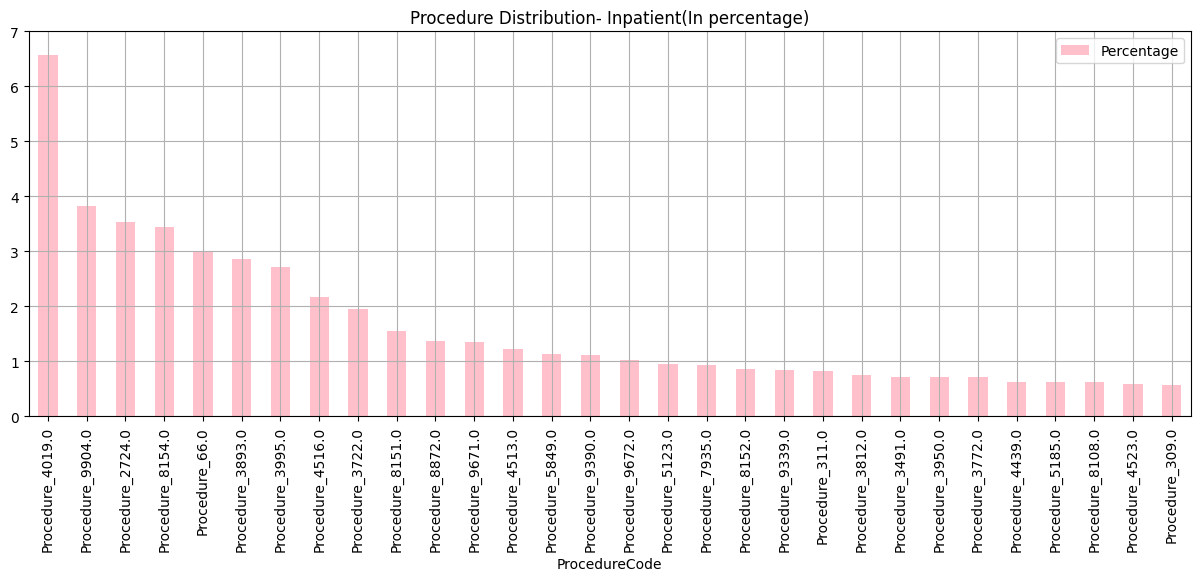

In [ ]:
analyse_cat_columns(inpatient_df,col_to_analyse='ProcedureCode' , prefix = 'Procedure_',title = 'Procedure Distribution- Inpatient(In percentage)',top_val = 30)


<h2>Conclusion</h2>
<h4> # Inpatient - Procedure code</h4>
<ol>
<li><p>Procedure code 4019 is the most common procedure that is followed.</p></li>
<li><p>Around 6.6% patients have undergone procedure code 4019.</p></li>
<li><p>Procedure code 4019,9904,2724,8154 and 66 are top 5 procedure code for inpatient data.</p></li>    
</ol>


###  Inpatient - Diagnosis codes

In [ ]:
#create a dataframe for concatinating all DiagnosisCode Code columns

inpatient_df = pd.DataFrame(columns = ['DiagnosisCode'])
inpatient_df['DiagnosisCode'] = pd.concat([tr_data_inpatient["ClmDiagnosisCode_1"],
                                           tr_data_inpatient["ClmDiagnosisCode_2"],
                                           tr_data_inpatient["ClmDiagnosisCode_3"],
                                           tr_data_inpatient["ClmDiagnosisCode_4"],
                                           tr_data_inpatient["ClmDiagnosisCode_5"],
                                           tr_data_inpatient["ClmDiagnosisCode_6"],
                                           tr_data_inpatient["ClmDiagnosisCode_7"],
                                           tr_data_inpatient["ClmDiagnosisCode_8"],
                                           tr_data_inpatient["ClmDiagnosisCode_9"],
                                           tr_data_inpatient["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

print(inpatient_df.shape)

(327328, 1)


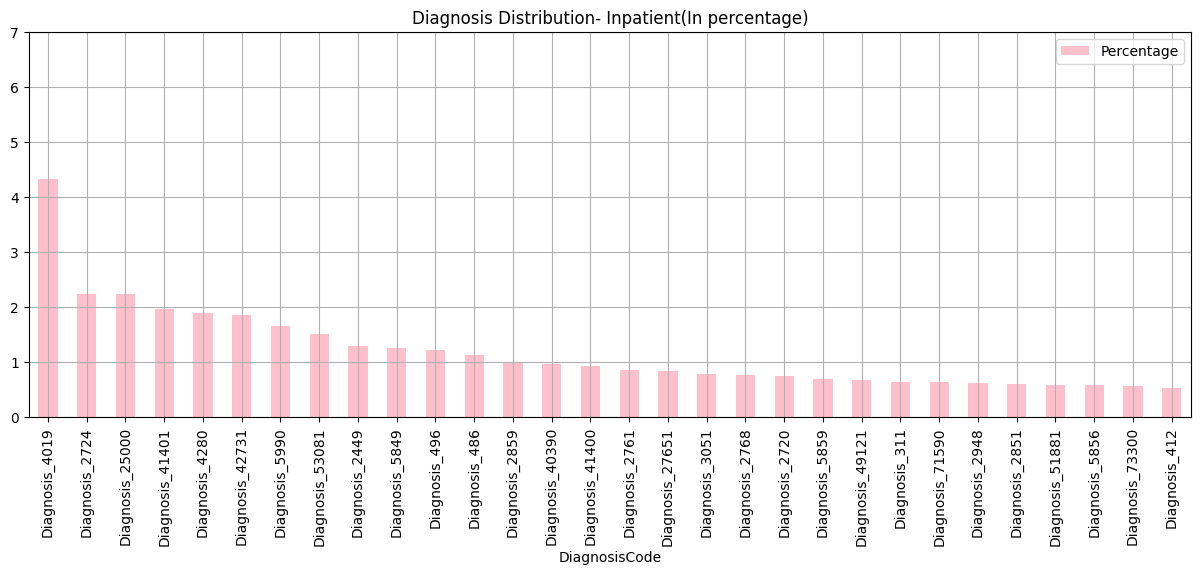

In [ ]:
analyse_cat_columns(inpatient_df,col_to_analyse='DiagnosisCode' ,
                    prefix = 'Diagnosis_',
                    title = 'Diagnosis Distribution- Inpatient(In percentage)',
                    top_val = 30, color ='pink')

<h2>Conclusion</h2>
<h4>  Inpatient - Diagnosis code</h4>
<ol>
<li><p>Diagnosis code 4019 is the most common Diagnosis a patient undergoes.</p></li>
<li><p>Around 4.5% patients have undergone Diagnosis code 4019.</p></li>
<li><p>Diagnosis code 4019,2724,25000,41401 and 4280 are top 5 Diagnosis code for inpatient data.</p></li>    </ol>


# Outpatient

This data provides details about the claims filed for those patients who visit hospitals and not admitted in it.

In [ ]:
#check all the columns of the Outpateint dataset and top 5 data points
print('Columns in this dataset are : ')
print(tr_data_outpatient.columns)

tr_data_outpatient.head(5)

Columns in this dataset are : 
Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')


BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11002  CLM624349   2009-10-11  2009-10-11  PRV56011   
1  BENE11003  CLM189947   2009-02-12  2009-02-12  PRV57610   
2  BENE11003  CLM438021   2009-06-27  2009-06-27  PRV57595   
3  BENE11004  CLM121801   2009-01-06  2009-01-06  PRV56011   
4  BENE11004  CLM150998   2009-01-22  2009-01-22  PRV56011   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      30          PHY326117                NaN   
1                      80          PHY362868                NaN   
2                      10          PHY328821                NaN   
3                      40          PHY334319                NaN   
4                     200          PHY403831                NaN   

  OtherPhysician ClmDiagnosisCode_1  ... ClmDiagnosisCode_9  \
0            NaN              78943  ...                NaN   
1            NaN               6115  ...                NaN   
2            NaN               2723  ...                NaN   
3            NaN              71988  ...                NaN   
4            NaN              82382  ...                NaN   

  ClmDiagnosisCode_10 ClmProcedureCode_1 ClmProcedureCode_2  \
0                 NaN                NaN                NaN   
1                 NaN                NaN                NaN   
2                 NaN                NaN                NaN   
3                 NaN                NaN                NaN   
4                 NaN                NaN                NaN   

  ClmProcedureCode_3 ClmProcedureCode_4 ClmProcedureCode_5 ClmProcedureCode_6  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

  DeductibleAmtPaid  ClmAdmitDiagnosisCode  
0                 0                  56409  
1                 0                  79380  
2                 0                    NaN  
3                 0                    NaN  
4                 0                  71947  

[5 rows x 27 columns]

In [ ]:

duplicateRows = tr_data_outpatient[tr_data_outpatient.duplicated(keep='last')]

print(duplicateRows)

Empty DataFrame
Columns: [BeneID, ClaimID, ClaimStartDt, ClaimEndDt, Provider, InscClaimAmtReimbursed, AttendingPhysician, OperatingPhysician, OtherPhysician, ClmDiagnosisCode_1, ClmDiagnosisCode_2, ClmDiagnosisCode_3, ClmDiagnosisCode_4, ClmDiagnosisCode_5, ClmDiagnosisCode_6, ClmDiagnosisCode_7, ClmDiagnosisCode_8, ClmDiagnosisCode_9, ClmDiagnosisCode_10, ClmProcedureCode_1, ClmProcedureCode_2, ClmProcedureCode_3, ClmProcedureCode_4, ClmProcedureCode_5, ClmProcedureCode_6, DeductibleAmtPaid, ClmAdmitDiagnosisCode]
Index: []

[0 rows x 27 columns]


### Outpatient - Procedure codes

In [ ]:
#create a dataframe for concatinating all Procedure Code columns

outpatient_df = pd.DataFrame(columns = ['ProcedureCode'])
outpatient_df['ProcedureCode'] = pd.concat([tr_data_outpatient["ClmProcedureCode_1"],
                                           tr_data_outpatient["ClmProcedureCode_2"],
                                           tr_data_outpatient["ClmProcedureCode_3"],
                                           tr_data_outpatient["ClmProcedureCode_4"],
                                           tr_data_outpatient["ClmProcedureCode_5"],
                                           tr_data_outpatient["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

print(outpatient_df.shape)

(204, 1)


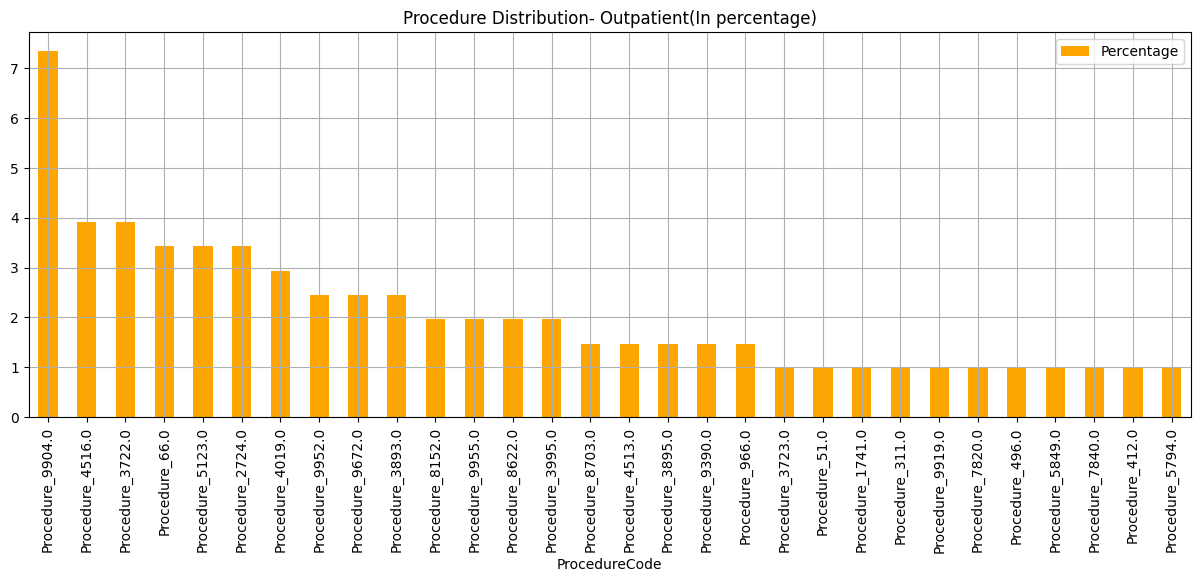

In [ ]:
analyse_cat_columns(outpatient_df,col_to_analyse='ProcedureCode' ,
                    prefix = 'Procedure_',title = 'Procedure Distribution- Outpatient(In percentage)',
                    top_val = 30,color ='orange')


<h2>Conclusion</h2>
<h4> # Outpatient - Procedure code</h4>
<ol>
<li><p>Procedure code 9904 is the most common procedure that is followed.</p></li>
<li><p>Around 7.5% patients have undergone procedure code 9904.</p></li>
<li><p>Procedure code 9904,3722,4516,2724 and 66 are top 5 procedure code for inpatient data.</p></li>    
</ol>


### Outpatient - Diagnosis codes

In [ ]:
#create a dataframe for concatinating all DiagnosisCode Code columns

outpatient_df = pd.DataFrame(columns = ['DiagnosisCode'])
outpatient_df['DiagnosisCode'] = pd.concat([tr_data_outpatient["ClmDiagnosisCode_1"],
                                           tr_data_outpatient["ClmDiagnosisCode_2"],
                                           tr_data_outpatient["ClmDiagnosisCode_3"],
                                           tr_data_outpatient["ClmDiagnosisCode_4"],
                                           tr_data_outpatient["ClmDiagnosisCode_5"],
                                           tr_data_outpatient["ClmDiagnosisCode_6"],
                                           tr_data_outpatient["ClmDiagnosisCode_7"],
                                           tr_data_outpatient["ClmDiagnosisCode_8"],
                                           tr_data_outpatient["ClmDiagnosisCode_9"],
                                           tr_data_outpatient["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()
print(outpatient_df.shape)

(1353388, 1)


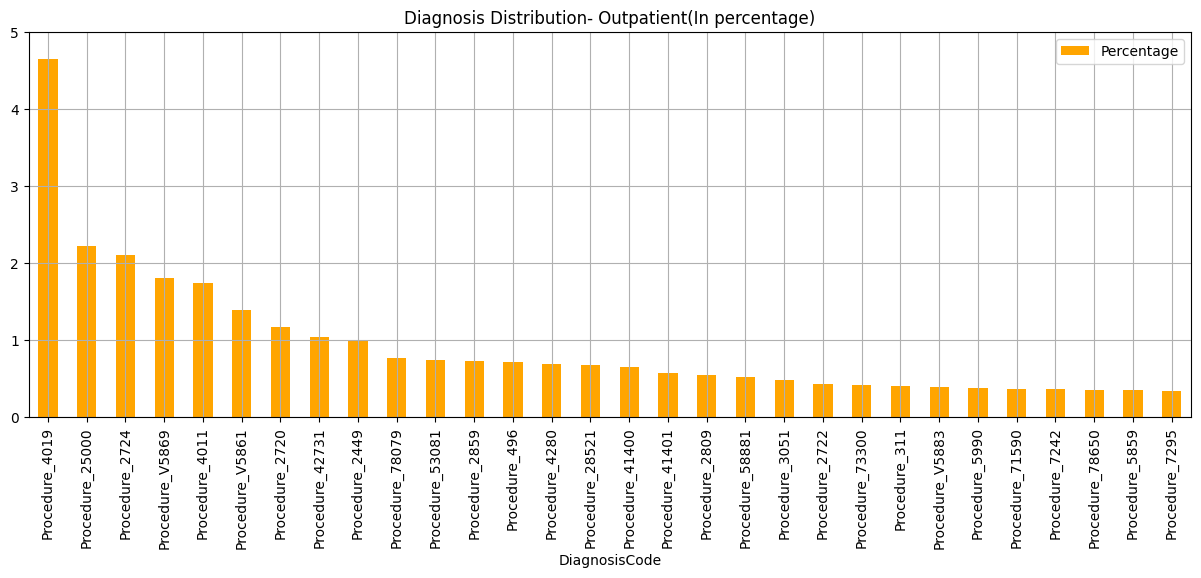

In [ ]:
analyse_cat_columns(outpatient_df,col_to_analyse='DiagnosisCode' ,
                    prefix = 'Procedure_',title = 'Diagnosis Distribution- Outpatient(In percentage)',
                    top_val = 30,color ='orange',
                    y_lim = np.arange(0,6))

<h2>Conclusion</h2>
<h4>  Outpatient - Diagnosis code</h4>
<ol>
<li><p>Diagnosis code 4019 is the most common Diagnosis a patient undergoes.</p></li>
<li><p>Around 4.8% patients have undergone Diagnosis code 4019.</p></li>
<li><p>Diagnosis code 4019,25000,2724,V5869 and 401 are top 5 Diagnosis code for inpatient data.</p></li>    </ol>


# 2. Dates

In [ ]:
def get_year(date):
    """This function returns year from date"""
    date = str(date)
    return(int(date[:4]))

def get_month(date):
    """This function returns month from date"""
    date = str(date)
    return (int(date[5:7]))

def analyse_date_columns(data_frame, start_date_col, end_date_col , palette='coolwarm'):

    date_df = pd.DataFrame(columns = ['start_month','start_year','end_month','end_year' ])

    date_df['start_month'] = data_frame[start_date_col].apply(get_month)
    date_df['start_year'] = data_frame[start_date_col].apply(get_year)
    date_df['end_month'] = data_frame[end_date_col].apply(get_month)
    date_df['end_year'] = data_frame[end_date_col].apply(get_year)


    plt.figure(figsize=(15, 5))

    plt.subplot(121)
    data_frame[start_date_col].apply(get_year).value_counts().plot(kind='bar',title='start date')

    plt.subplot(122)
    data_frame[end_date_col].apply(get_year).value_counts().plot(kind='bar', title='end date')


    fig, axes = plt.subplots(nrows=1, ncols=2 , figsize=(15,5))

    sns.countplot(x='start_month',data=date_df,hue='start_year',palette=palette , ax = axes[0])
    axes[0].set_title("Plot to Analyse behaviour of data point acc to month and year")

    sns.countplot(x='end_month',data=date_df,hue='end_year',palette=palette ,  ax = axes[1])
    axes[1].set_title("Plot to Analyse behaviour of data point acc to month and year ")


    fig, axes = plt.subplots(nrows=1, ncols=2 , figsize=(15,5))

    sns.stripplot(x='start_month',y="start_year", data=date_df, orient = 'h' , ax = axes[0])
    axes[0].set_title("Plot to Analyse behaviour of data point acc to month and year ")

    sns.stripplot(x='end_month',y="end_year", data=date_df, orient = 'h' , ax = axes[1])
    axes[1].set_title("Plot to Analyse behaviour of data point acc to month and year ")

    plt.tight_layout()


# Inpatient

### Inpatient - Claim start and end date

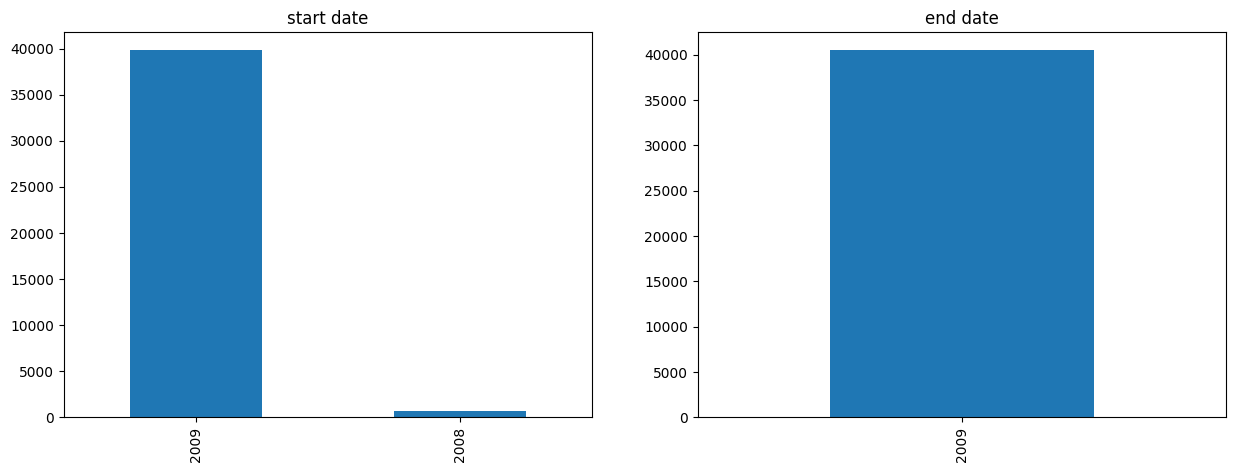

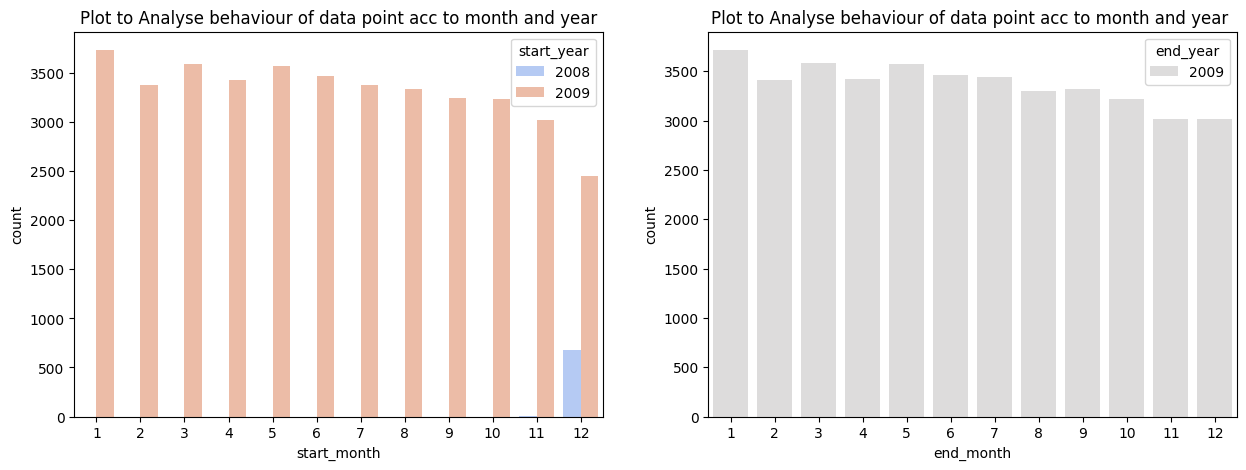

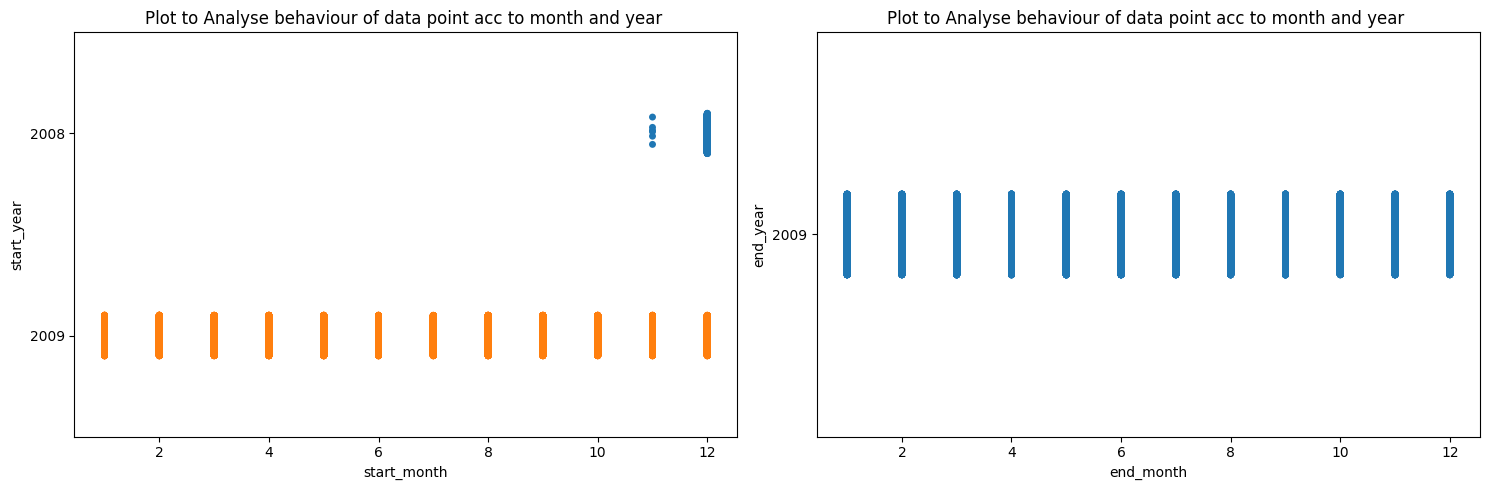

In [ ]:
analyse_date_columns(tr_data_inpatient,'ClaimStartDt', 'ClaimEndDt')

<h2>Conclusion</h2>
<h4> # Inpatient -  Claim start and end date </h4>
<ol>
<li><p>Inpatient datset contains records for the claims that was submitted in the year 2009(mostly) and 2008.</li>
<li><p>All most all the claims were submitted in the year 2009.Very few were submitted in 2008.</p></li>
<li><p>In 2008 all the claims were submitted in the month of November(very few) and December(mostly) only.</p></li>
<li>In 2019 claims are submitted throughout the year,we observe slightly highest number of claims submission in the January 2009</li>
<li>All the claims are settled in 2009 and throughout the year. we observe tlightly highest number of claims settelement in January 2009  </li>


### Inpatient - Patient admit and discharge date

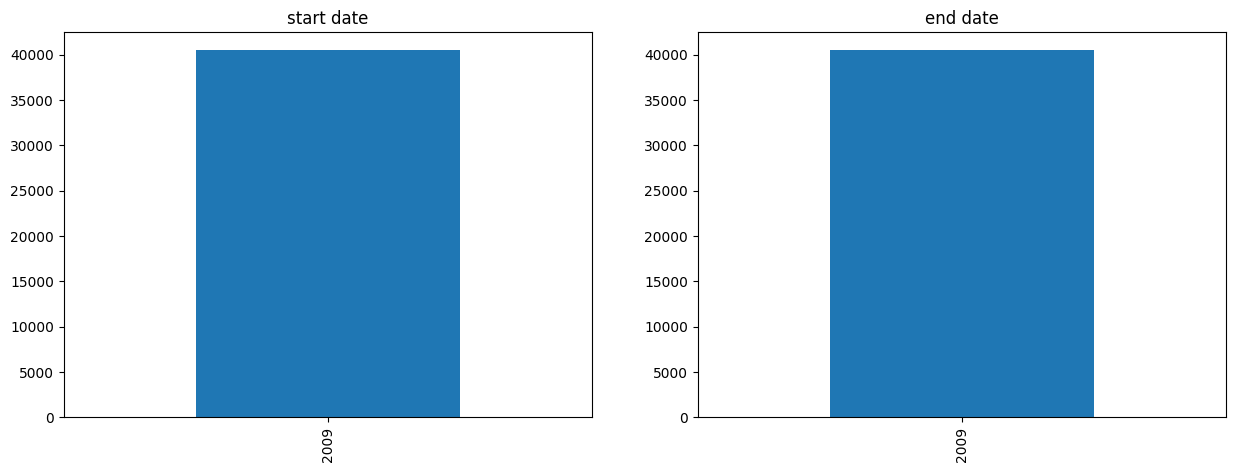

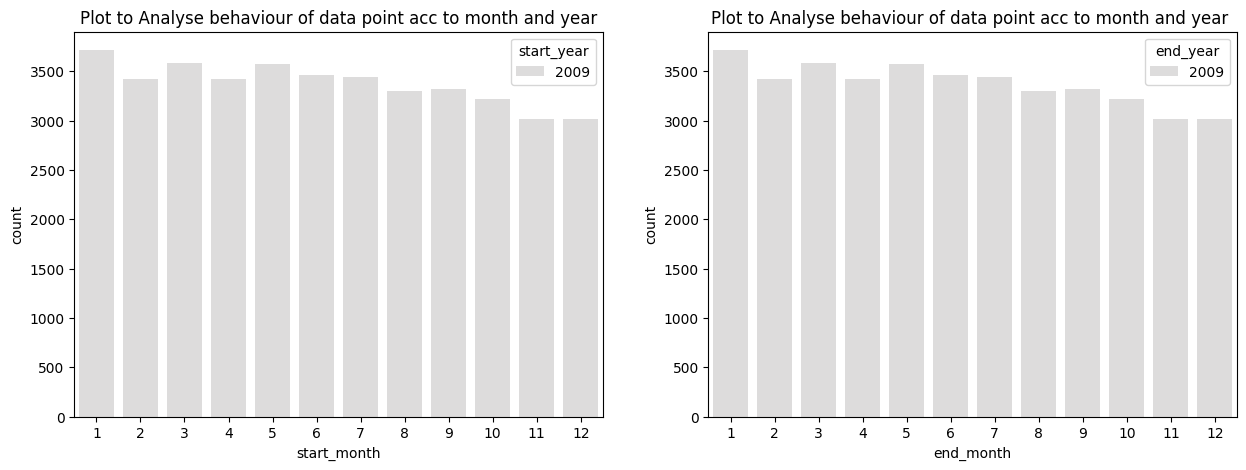

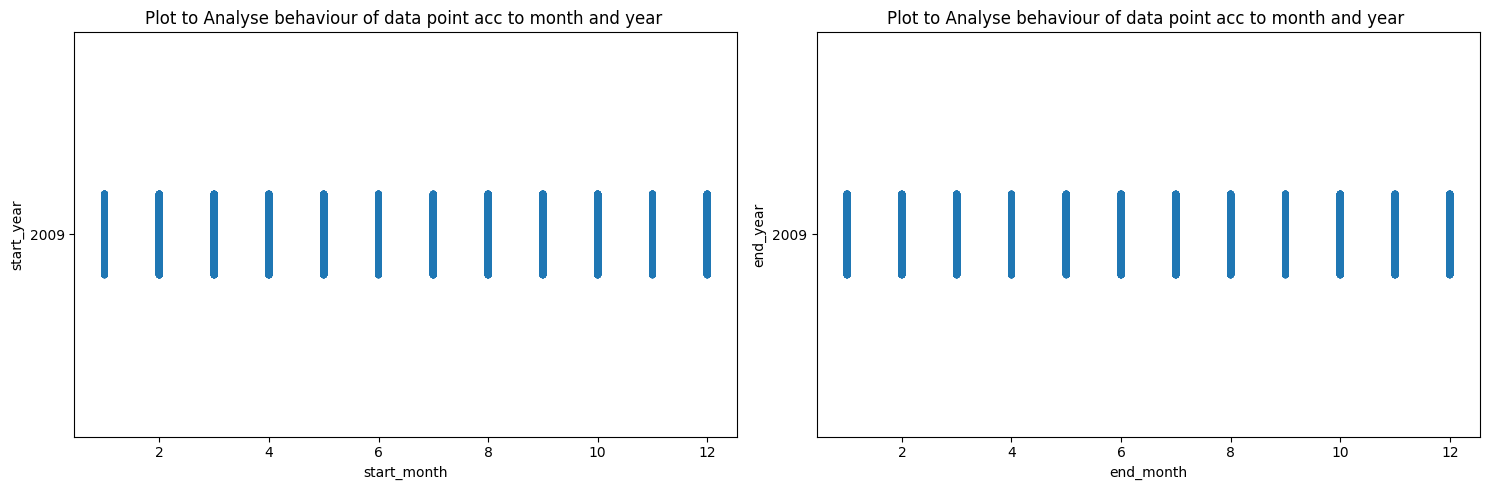

In [ ]:
analyse_date_columns(tr_data_inpatient,'DischargeDt', 'DischargeDt')

<h2>Conclusion</h2>
<h4> # Inpatient - Patient admit and discharge date </h4>
<ol>
<li><p>Inpatient datset contains records for the patients who were admitted and got discharged in the year 2008 and 2009.</li>
<li><p>Patients are getting admited and discharged throughout the month.No major differnece or change in pattern in number of patients getting admitted or discharged in any particular month</p></li>

# Outpatient

### Outpatient - Claim start and end date

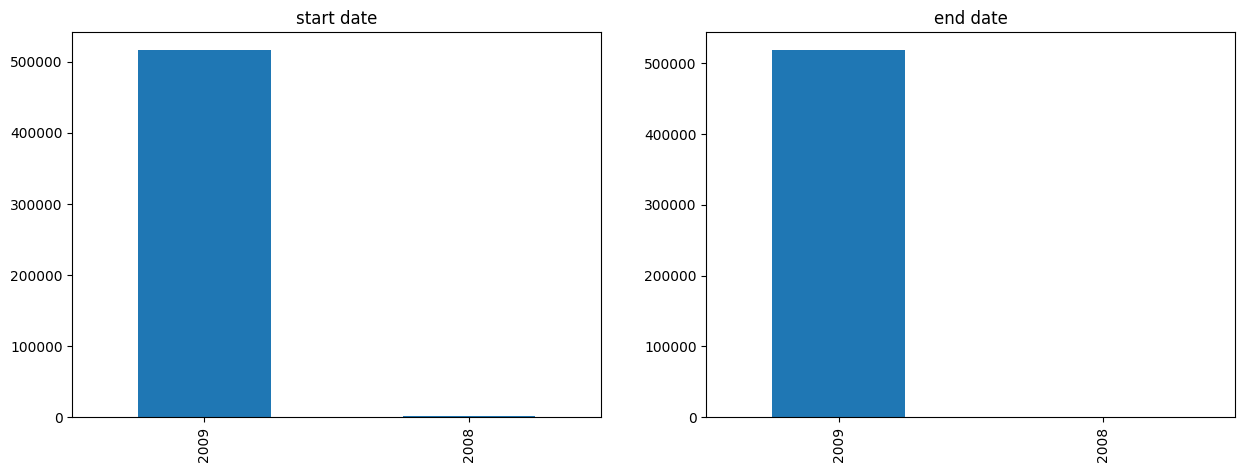

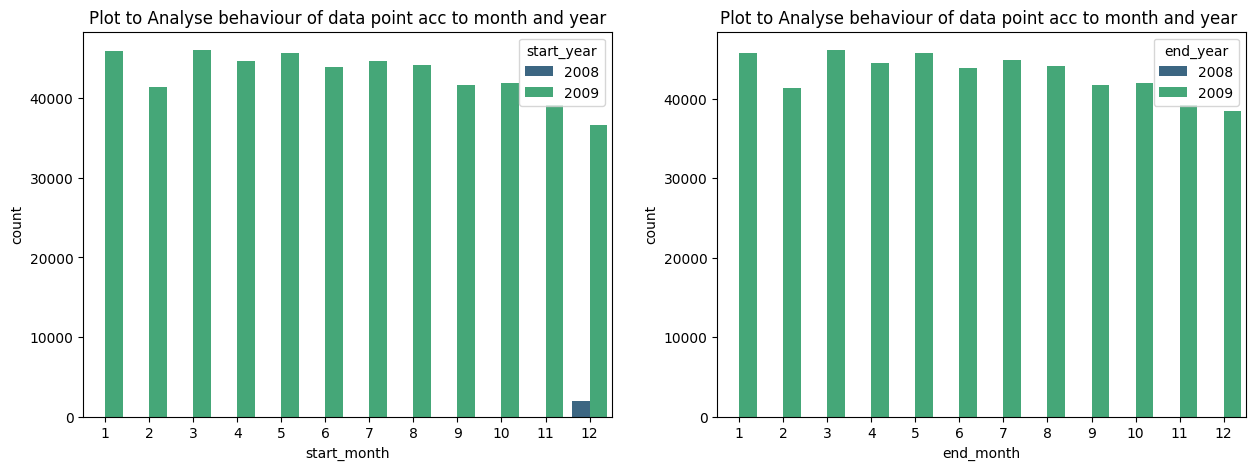

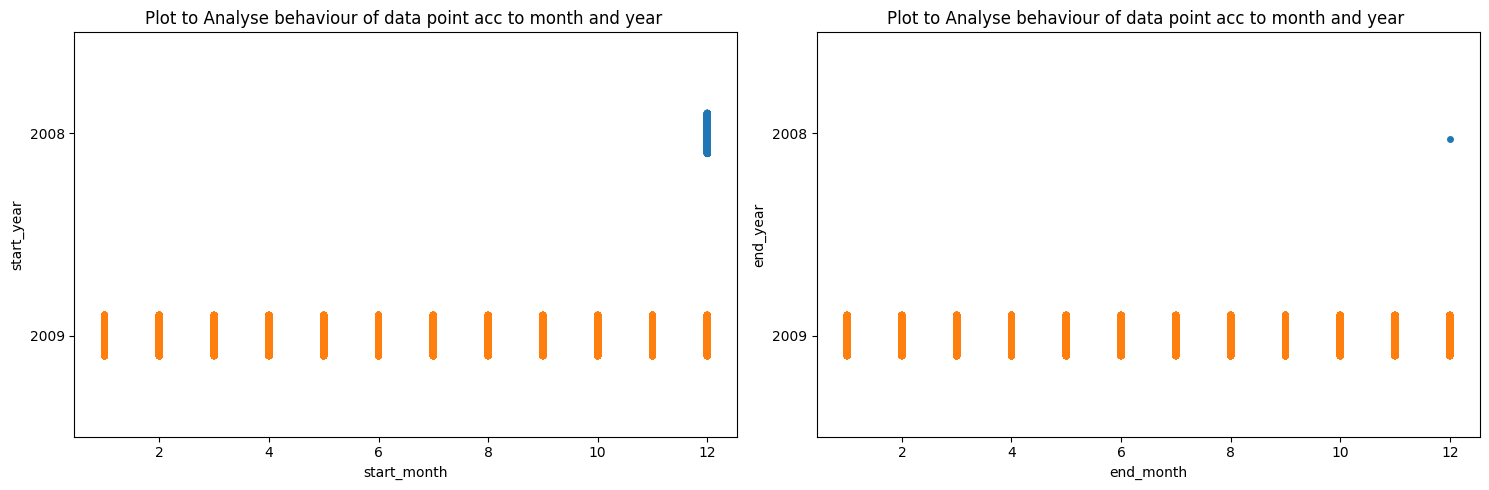

In [ ]:
analyse_date_columns(tr_data_outpatient,'ClaimStartDt', 'ClaimEndDt', palette='viridis')

<h2>Conclusion</h2>
<h4> # Outpatient - Claim start and end date </h4>
<ol>
<li><p>Outpatient datset contains records for the claims that was submitted in the year 2009(mostly) and 2008.</li>
<li><p>All most all claims were submitted in the year 2009.Very few were submitted in 2008.</p></li>
<li><p>In 2008 all the claims were submitted in the month of December only.</p></li>
<li>In 2019 claims are submitted throughout the year,we observe slightly highest number of claims submission in the January,March,May of 2009</li>
<li>All the claims are settled in 2009 and throughout the year. Very Very few claims were settled in the yer 2008 and that too in the month on December.</li>


# 3. Physicians

# Inpatient

### Inpatient - Attending Physician

<AxesSubplot:>

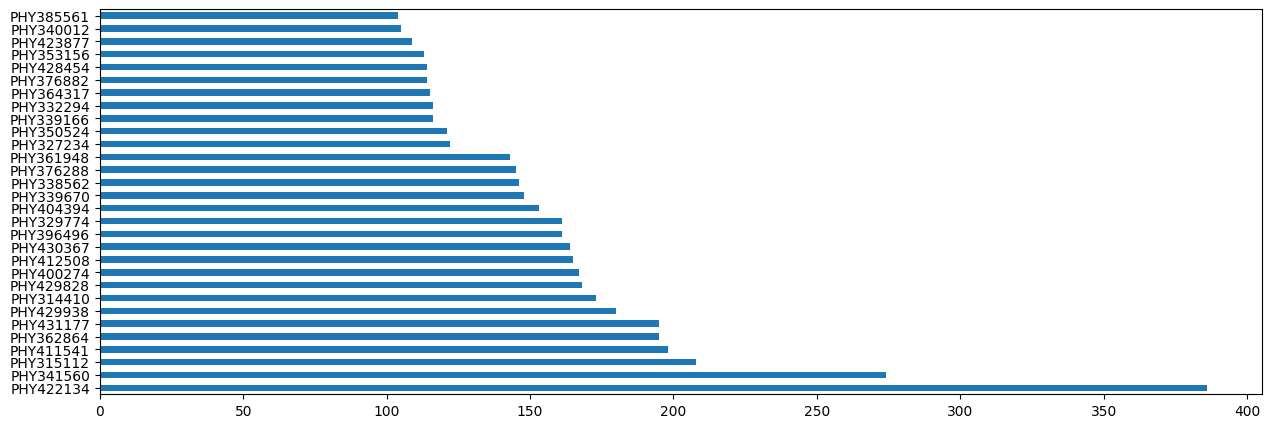

In [ ]:
plt.figure(figsize=(15, 5))
tr_data_inpatient.AttendingPhysician.value_counts().head(30).plot( x=tr_data_inpatient.AttendingPhysician , kind = 'barh')

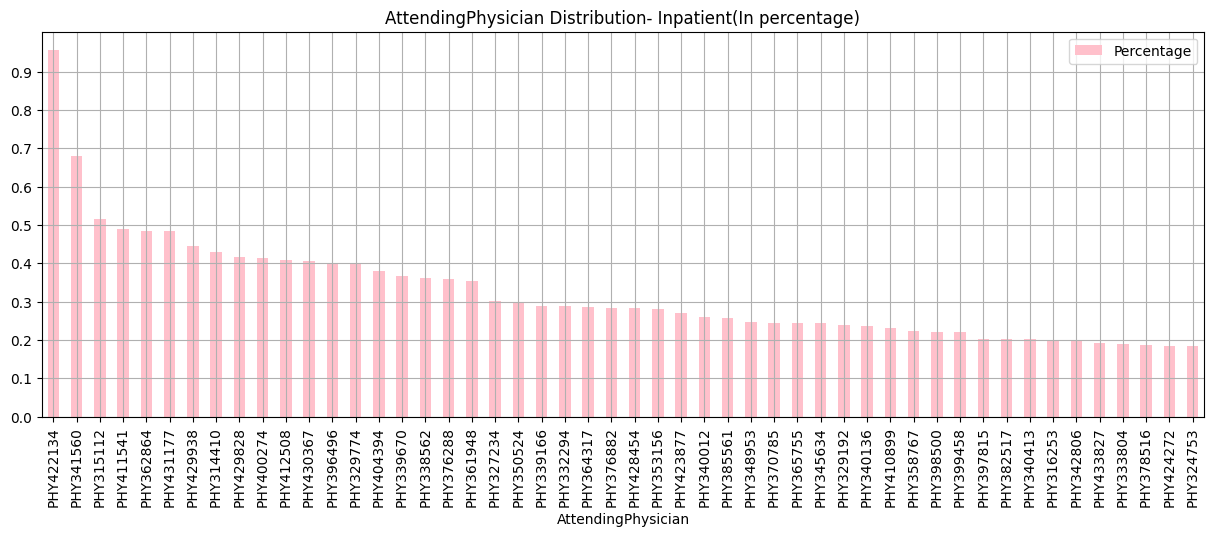

In [ ]:
analyse_cat_columns(tr_data_inpatient,
                    col_to_analyse='AttendingPhysician' ,
                    prefix = '',y_lim = np.arange(0,1,0.1),
                    title = 'AttendingPhysician Distribution- Inpatient(In percentage)',top_val = 50)

<h2>Conclusion</h2>
<h4> # Inpatient - Attending Physician </h4>
<ol>
<li>Most patients are attended by pyhisican PHY422134.</li>
<li><p>Around 1% of the patients are attended by pyhisican PHY422134 </p></li>

### Inpatient - Operating Physician

<AxesSubplot:>

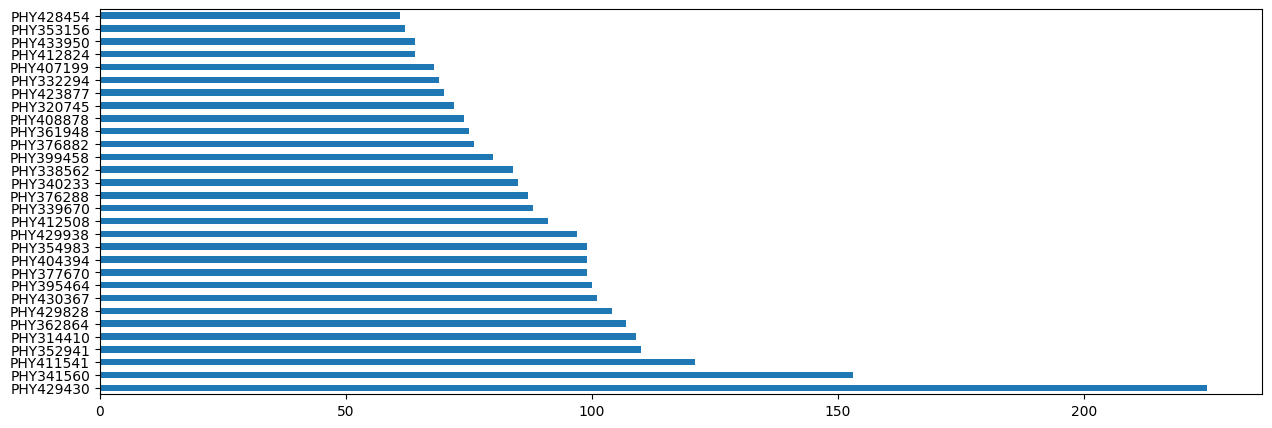

In [ ]:
plt.figure(figsize=(15, 5))
tr_data_inpatient.OperatingPhysician.value_counts().head(30).plot( x=tr_data_inpatient.OperatingPhysician , kind = 'barh')

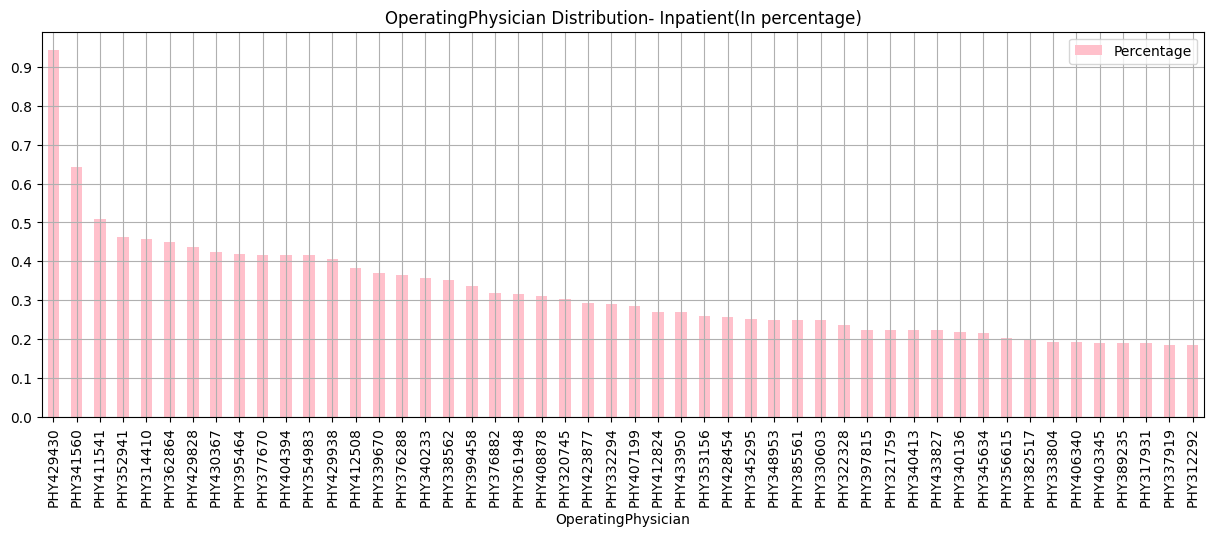

In [ ]:
analyse_cat_columns(tr_data_inpatient,
                    col_to_analyse='OperatingPhysician' ,
                    prefix = '',y_lim = np.arange(0,1,0.1),
                    title = 'OperatingPhysician Distribution- Inpatient(In percentage)',top_val = 50)

<h2>Conclusion</h2>
<h4> # Inpatient  - Oprating Physician </h4>
<ol>
<li>Pyhisican PHY429430 perfoms the most of the operations.</li>
<li>Around 1% of the patients are attended by pyhisican PHY429430</li>

# Outpatient

### Outpatient - Attending Physician

<AxesSubplot:>

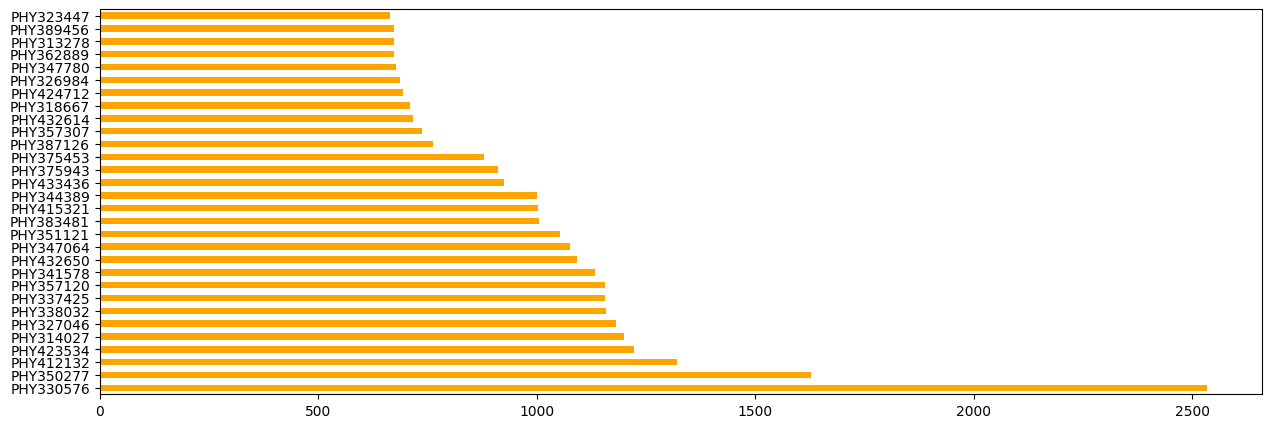

In [ ]:
plt.figure(figsize=(15, 5))
tr_data_outpatient.AttendingPhysician.value_counts().head(30).plot( x=tr_data_outpatient.AttendingPhysician , kind = 'barh' , color = 'orange')

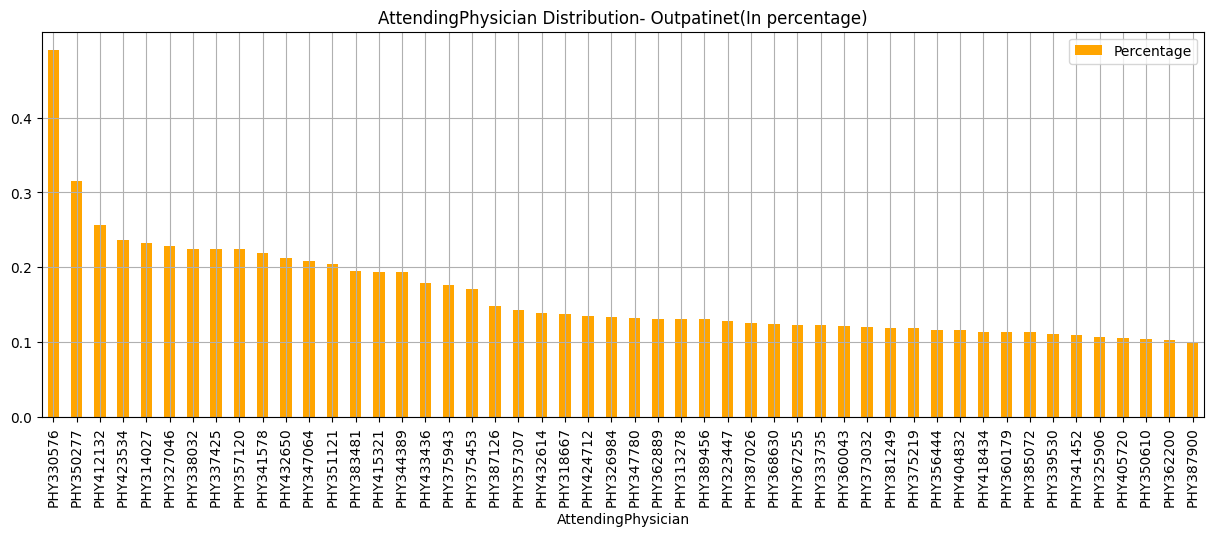

In [ ]:
analyse_cat_columns(tr_data_outpatient,
                    col_to_analyse='AttendingPhysician' ,
                    prefix = '',y_lim = np.arange(0,0.5,0.1),
                    title = 'AttendingPhysician Distribution- Outpatinet(In percentage)',top_val = 50,
                    color='orange')

<h2>Conclusion</h2>
<h4> # Outpatient - Attending Physician </h4>
<ol>
<li>Most patients are attended by pyhisican PHY330576.</li>
<li><p>Around 0.48% of the patients are attended by pyhisican PHY330576 </p></li>

### Outpatient - Operating Physician

<AxesSubplot:>

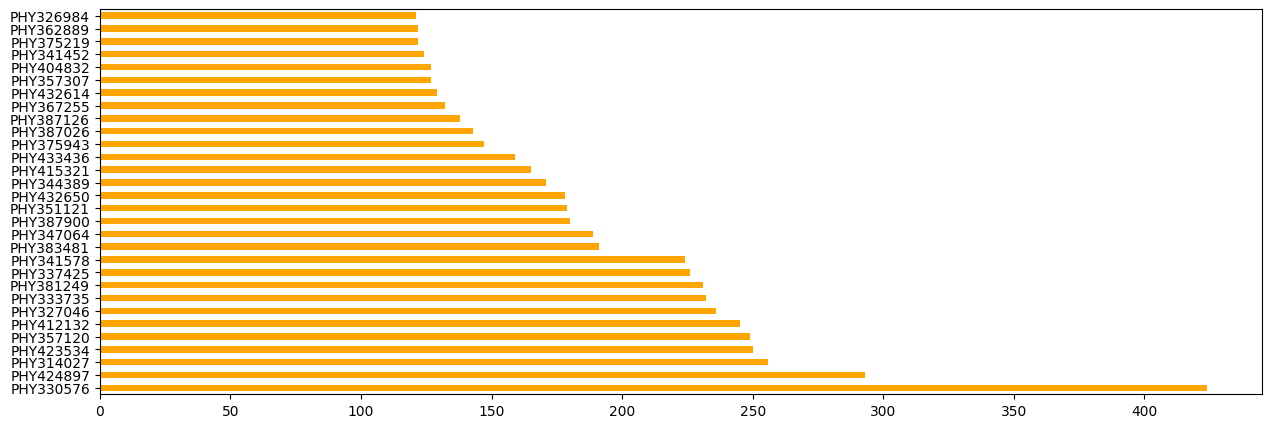

In [ ]:
plt.figure(figsize=(15, 5))
tr_data_outpatient.OperatingPhysician.value_counts().head(30).plot( x=tr_data_outpatient.OperatingPhysician , kind = 'barh' , color = 'orange')

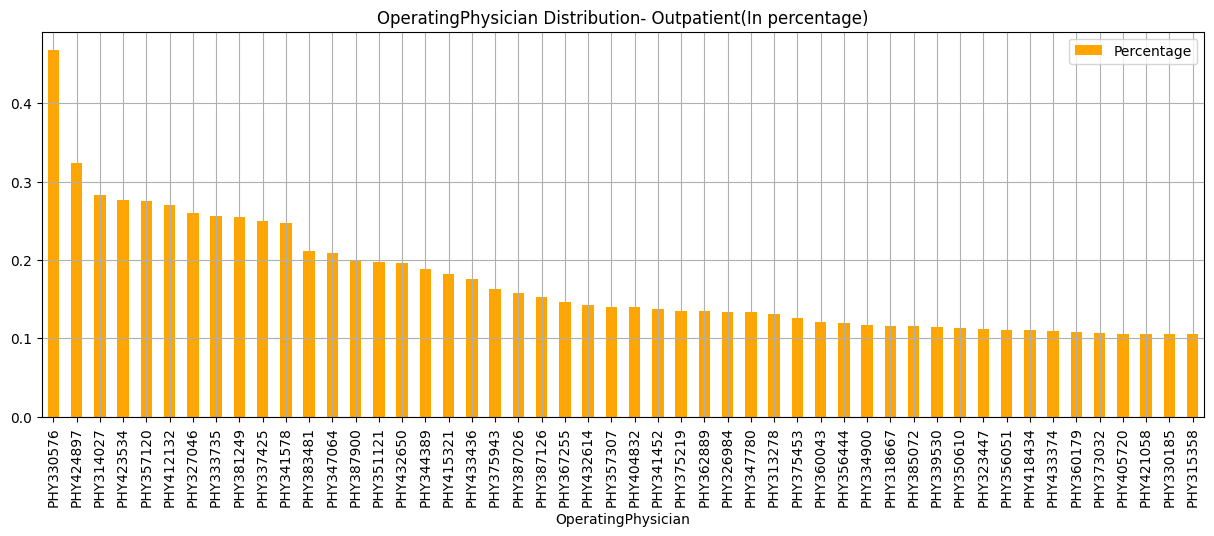

In [ ]:
analyse_cat_columns(tr_data_outpatient,
                    col_to_analyse='OperatingPhysician' ,
                    prefix = '',y_lim = np.arange(0,0.5,0.1),
                    title = 'OperatingPhysician Distribution- Outpatient(In percentage)',top_val = 50,
                    color='orange')

<h2>Conclusion</h2>
<h4> # Outpatient - Operating Physician </h4>
<ol>
<li>Pyhisican PHY330576 perfoms the most of the operations.</li>
<li>Around 0.48% of the patients are attended by pyhisican PHY330576</li>

# 4. ClaimAmtReimbursed

# Inpatient

<AxesSubplot:xlabel='InscClaimAmtReimbursed', ylabel='Density'>

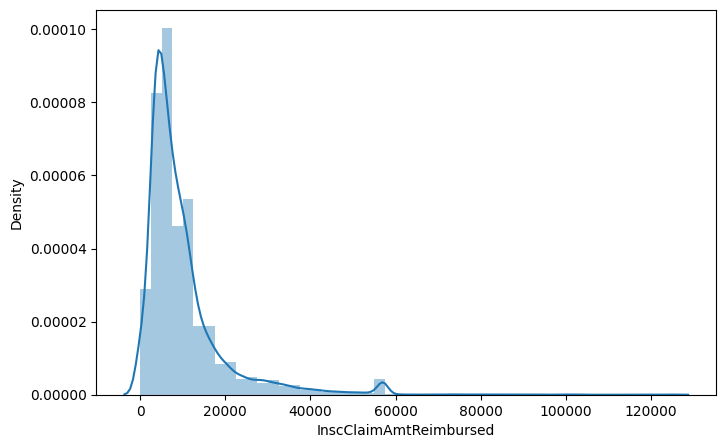

In [ ]:
plt.figure(figsize=(8, 5))
sns.distplot(tr_data_inpatient.InscClaimAmtReimbursed)

<h2>Conclusion</h2>
<h4> # Inpatient - ClaimAmt Reimbursed </h4>
<ol>
<li>Distibution of ammount that is paid as claim reimbursement seems like log normal distribtion</li>
<li>All most all Reimbursed ammount is between 0 and 20000 </li>
<li>In very few cases amount more than 20000 is paid for claim reimbursement </li>

# Outpatient

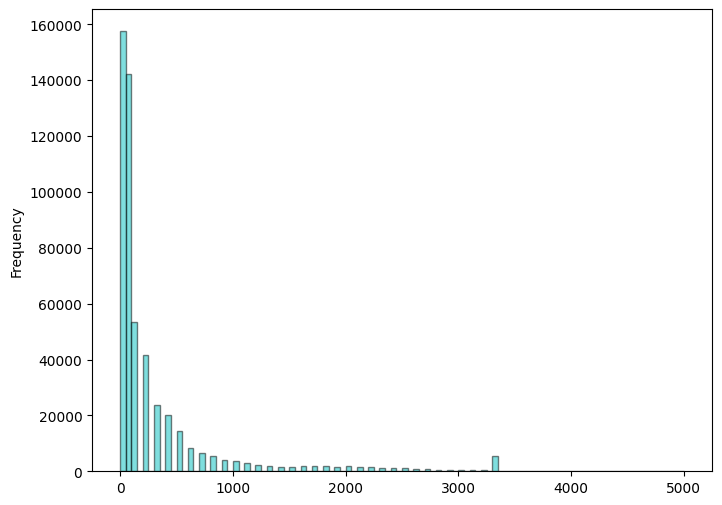

In [ ]:
ax = tr_data_outpatient['InscClaimAmtReimbursed'].plot.hist(bins=100,range=[0,5000], alpha=0.5, figsize=(8, 6), facecolor='c', edgecolor='k')

In [ ]:
val = np.percentile(tr_data_outpatient.InscClaimAmtReimbursed,99.9)
val

3500.0

<h2>Conclusion</h2>
<h4> # Outpatient - ClaimAmt Reimbursed </h4>
<ol>
<li>99.9 percentile value is 3500 </li>
<li>Plot indicates this columns has some outlisers </li>
</ol>

# 5.  Gaining Insights Using labeled Data

In [ ]:
#check all the columns of the  labeled  dataset and top 5 data points
print('Columns in this dataset are : ')
print(target_data.columns)

target_data.head(5)

Columns in this dataset are : 
Index(['Provider', 'PotentialFraud'], dtype='object')


Provider PotentialFraud
0  PRV51001             No
1  PRV51003            Yes
2  PRV51004             No
3  PRV51005            Yes
4  PRV51007             No

In [ ]:

duplicateRows = target_data[target_data.duplicated(keep='last')]

print(duplicateRows)

Empty DataFrame
Columns: [Provider, PotentialFraud]
Index: []


<AxesSubplot:xlabel='PotentialFraud', ylabel='count'>

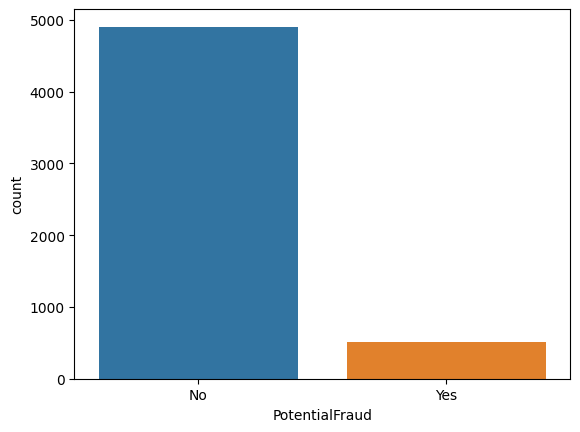

In [ ]:
sns.countplot('PotentialFraud',data=target_data)

<h2>Conclusion</h2>
<ol>
<li>Dataset is imbalanced </li>
</ol>

# 5.a Percentage of fraudulent encounters Inpatient / Outpatient

In [ ]:
only_fraud_provider = target_data.loc[target_data['PotentialFraud']=='Yes']
print("Dataset shape : ", only_fraud_provider.shape)
only_fraud_provider.head(5)

Dataset shape :  (506, 2)


Provider PotentialFraud
1   PRV51003            Yes
3   PRV51005            Yes
13  PRV51021            Yes
25  PRV51037            Yes
37  PRV51052            Yes

In [ ]:
fraud_provider_inpatient_df = pd.merge(tr_data_inpatient, only_fraud_provider, how='inner', on='Provider')
print("Dataset shape : ", fraud_provider_inpatient_df.shape)
fraud_provider_inpatient_df.head(5)

Dataset shape :  (23402, 31)


BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE17521  CLM34721   2009-01-20  2009-02-01  PRV55912   
2  BENE21718  CLM72336   2009-10-17  2009-11-04  PRV55912   
3  BENE22934  CLM73394   2009-10-25  2009-10-29  PRV55912   
4  BENE24402  CLM32911   2009-01-08  2009-01-12  PRV55912   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                   19000          PHY349293          PHY370861   
2                   17000          PHY334706          PHY334706   
3                   13000          PHY390614          PHY323689   
4                    3000          PHY380413          PHY432598   

  OtherPhysician AdmissionDt  ... ClmDiagnosisCode_8  ClmDiagnosisCode_9  \
0            NaN  2009-04-12  ...              19889                5849   
1      PHY363291  2009-01-20  ...               2753               E9305   
2            NaN  2009-10-17  ...              43812                4019   
3      PHY363291  2009-10-25  ...                NaN                 NaN   
4            NaN  2009-01-08  ...                NaN                 NaN   

  ClmDiagnosisCode_10 ClmProcedureCode_1 ClmProcedureCode_2  \
0                 NaN                NaN                NaN   
1                 NaN             7769.0             5849.0   
2                 NaN             9338.0                NaN   
3                 NaN             8154.0                NaN   
4                 NaN             8543.0                NaN   

  ClmProcedureCode_3 ClmProcedureCode_4 ClmProcedureCode_5 ClmProcedureCode_6  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

  PotentialFraud  
0            Yes  
1            Yes  
2            Yes  
3            Yes  
4            Yes  

[5 rows x 31 columns]

In [ ]:
print("Dataset shape : ", fraud_provider_inpatient_df.shape)
print("Percentage of fraud cases related to inpatient data : ",(fraud_provider_inpatient_df.shape[0]/tr_data_inpatient.shape[0])*100)

Dataset shape :  (23402, 31)
Percentage of fraud cases related to inpatient data :  57.81983495577408


<h2>Conclusion</h2>
<li>Around 58 % of the inpatient data for training has fraudulent entries</li>

In [ ]:
fraud_provider_outpatient_df = pd.merge(tr_data_outpatient, only_fraud_provider, how='inner', on='Provider')
print("Dataset shape : ", fraud_provider_outpatient_df.shape)
fraud_provider_outpatient_df.head(5)

Dataset shape :  (189394, 28)


BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11002  CLM624349   2009-10-11  2009-10-11  PRV56011   
1  BENE11004  CLM121801   2009-01-06  2009-01-06  PRV56011   
2  BENE11004  CLM150998   2009-01-22  2009-01-22  PRV56011   
3  BENE11004  CLM173224   2009-02-03  2009-02-03  PRV56011   
4  BENE11004  CLM224741   2009-03-03  2009-03-03  PRV56011   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      30          PHY326117                NaN   
1                      40          PHY334319                NaN   
2                     200          PHY403831                NaN   
3                      20          PHY339887                NaN   
4                      40          PHY345721                NaN   

  OtherPhysician ClmDiagnosisCode_1  ... ClmDiagnosisCode_10  \
0            NaN              78943  ...                 NaN   
1            NaN              71988  ...                 NaN   
2            NaN              82382  ...                 NaN   
3            NaN              20381  ...                 NaN   
4            NaN              V6546  ...                 NaN   

  ClmProcedureCode_1 ClmProcedureCode_2 ClmProcedureCode_3 ClmProcedureCode_4  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

  ClmProcedureCode_5 ClmProcedureCode_6 DeductibleAmtPaid  \
0                NaN                NaN                 0   
1                NaN                NaN                 0   
2                NaN                NaN                 0   
3                NaN                NaN                 0   
4                NaN                NaN                 0   

  ClmAdmitDiagnosisCode  PotentialFraud  
0                 56409             Yes  
1                   NaN             Yes  
2                 71947             Yes  
3                   NaN             Yes  
4                   NaN             Yes  

[5 rows x 28 columns]

In [ ]:
print("Dataset shape : ", fraud_provider_outpatient_df.shape)
print("Percentage of fraud cases related to outpatinet data : ",(fraud_provider_outpatient_df.shape[0]/tr_data_outpatient.shape[0])*100)

Dataset shape :  (189394, 28)
Percentage of fraud cases related to outpatinet data :  36.58112130290089


<h2>Conclusion</h2>
<li>Around 37 % of the outpatient data for training has fraudulent entries</li>

# 5.b 20 Most used procedure codes and diagnosis codes used by the potential fradulent providers

# Inpatient - Procedure

(17325, 1)


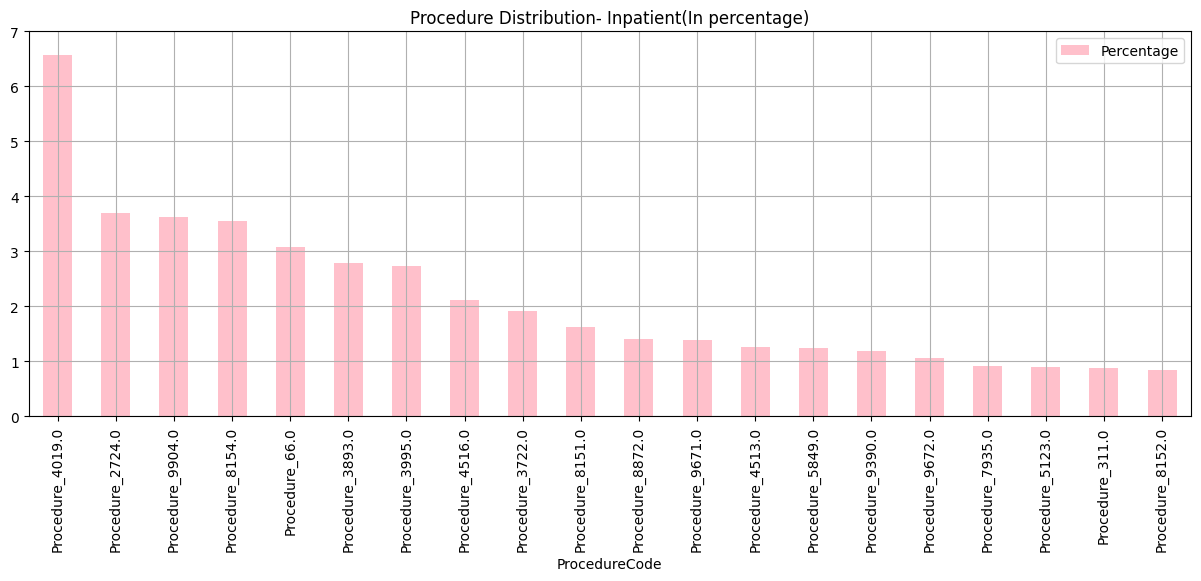

In [ ]:
#create a dataframe for concatinating all Procedure Code columns
inpatient_df = pd.DataFrame(columns = ['ProcedureCode'])
inpatient_df['ProcedureCode'] = pd.concat([fraud_provider_inpatient_df["ClmProcedureCode_1"],
                                           fraud_provider_inpatient_df["ClmProcedureCode_2"],
                                           fraud_provider_inpatient_df["ClmProcedureCode_3"],
                                           fraud_provider_inpatient_df["ClmProcedureCode_4"],
                                           fraud_provider_inpatient_df["ClmProcedureCode_5"],
                                           fraud_provider_inpatient_df["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

print(inpatient_df.shape)

analyse_cat_columns(inpatient_df,col_to_analyse='ProcedureCode' , prefix = 'Procedure_',title = 'Procedure Distribution- Inpatient(In percentage)',top_val = 20)


# Inpatient - Diagnosis

(189329, 1)


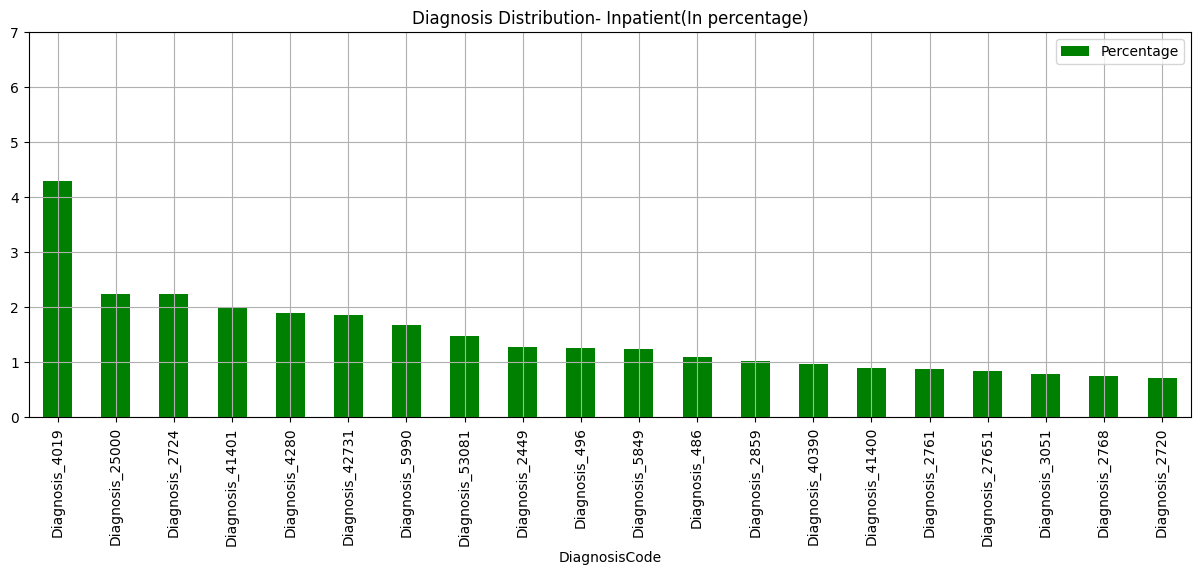

In [ ]:
#create a dataframe for concatinating all DiagnosisCode Code columns

inpatient_df = pd.DataFrame(columns = ['DiagnosisCode'])
inpatient_df['DiagnosisCode'] = pd.concat([fraud_provider_inpatient_df["ClmDiagnosisCode_1"],
                                           fraud_provider_inpatient_df["ClmDiagnosisCode_2"],
                                           fraud_provider_inpatient_df["ClmDiagnosisCode_3"],
                                           fraud_provider_inpatient_df["ClmDiagnosisCode_4"],
                                           fraud_provider_inpatient_df["ClmDiagnosisCode_5"],
                                           fraud_provider_inpatient_df["ClmDiagnosisCode_6"],
                                           fraud_provider_inpatient_df["ClmDiagnosisCode_7"],
                                           fraud_provider_inpatient_df["ClmDiagnosisCode_8"],
                                           fraud_provider_inpatient_df["ClmDiagnosisCode_9"],
                                           fraud_provider_inpatient_df["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

print(inpatient_df.shape)

analyse_cat_columns(inpatient_df,col_to_analyse='DiagnosisCode' , prefix = 'Diagnosis_',title = 'Diagnosis Distribution- Inpatient(In percentage)',top_val = 20 ,color = 'g')

# Outpatient - Procedure

(96, 1)


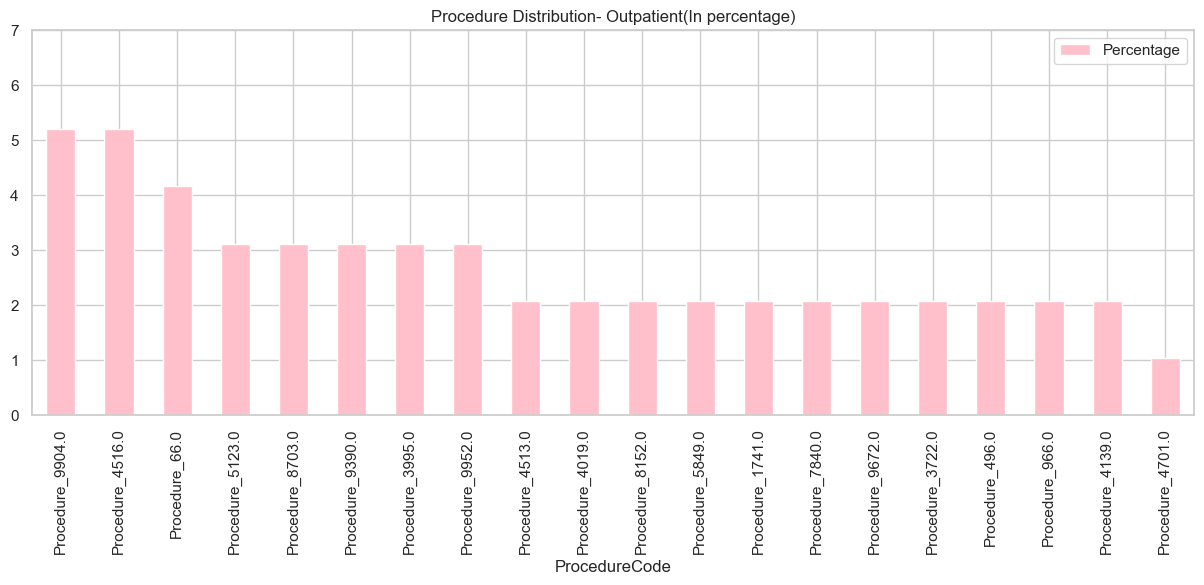

In [ ]:
#create a dataframe for concatinating all Procedure Code columns
inpatient_df = pd.DataFrame(columns = ['ProcedureCode'])
inpatient_df['ProcedureCode'] = pd.concat([fraud_provider_outpatient_df["ClmProcedureCode_1"],
                                           fraud_provider_outpatient_df["ClmProcedureCode_2"],
                                           fraud_provider_outpatient_df["ClmProcedureCode_3"],
                                           fraud_provider_outpatient_df["ClmProcedureCode_4"],
                                           fraud_provider_inpatient_df["ClmProcedureCode_5"],
                                           fraud_provider_outpatient_df["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

print(inpatient_df.shape)

analyse_cat_columns(inpatient_df,col_to_analyse='ProcedureCode' , prefix = 'Procedure_',title = 'Procedure Distribution- Outpatient(In percentage)',top_val = 20)


# Outpatient - Diagnosis

(494869, 1)


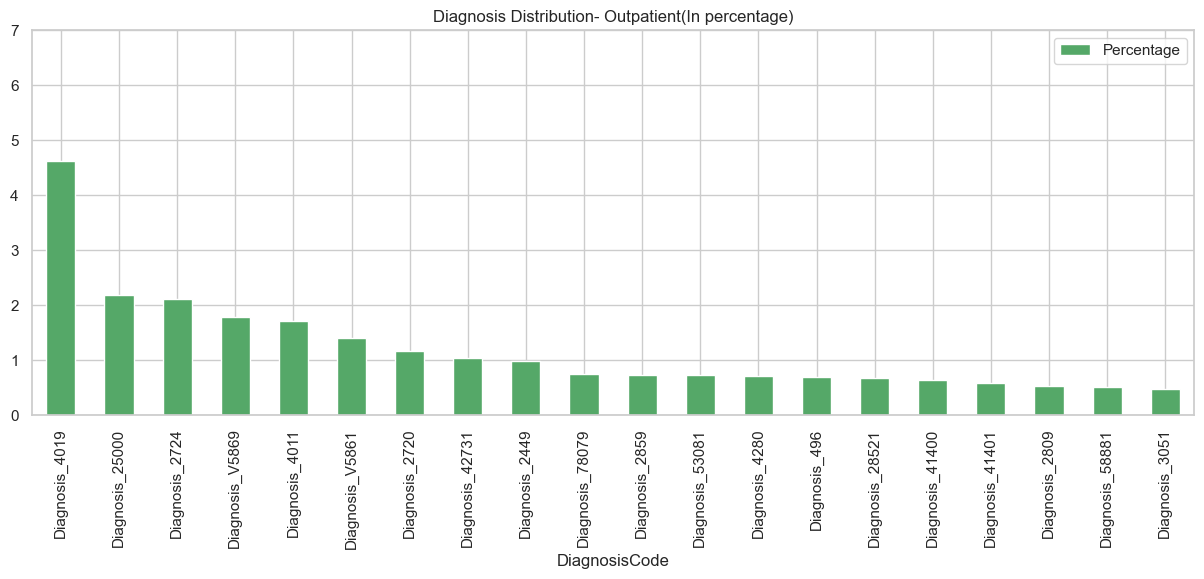

In [ ]:
#create a dataframe for concatinating all DiagnosisCode Code columns

inpatient_df = pd.DataFrame(columns = ['DiagnosisCode'])
inpatient_df['DiagnosisCode'] = pd.concat([fraud_provider_outpatient_df["ClmDiagnosisCode_1"],
                                           fraud_provider_outpatient_df["ClmDiagnosisCode_2"],
                                           fraud_provider_outpatient_df["ClmDiagnosisCode_3"],
                                           fraud_provider_outpatient_df["ClmDiagnosisCode_4"],
                                           fraud_provider_outpatient_df["ClmDiagnosisCode_5"],
                                           fraud_provider_outpatient_df["ClmDiagnosisCode_6"],
                                           fraud_provider_outpatient_df["ClmDiagnosisCode_7"],
                                           fraud_provider_outpatient_df["ClmDiagnosisCode_8"],
                                           fraud_provider_outpatient_df["ClmDiagnosisCode_9"],
                                           fraud_provider_outpatient_df["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

print(inpatient_df.shape)

analyse_cat_columns(inpatient_df,col_to_analyse='DiagnosisCode' , prefix = 'Diagnosis_',title = 'Diagnosis Distribution- Outpatient(In percentage)',top_val = 20 ,color = 'g')

# 6.  Gaining Insights from beneficiary Data

This data contains beneficiary KYC details like health conditions,region they belong to etc.

In [ ]:
#check all the columns of the beneficiary dataset and top 5 data points
print('Columns in this dataset are : ')
print(tr_data_beneficiary.columns)

tr_data_beneficiary.head(2)

Columns in this dataset are : 
Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')


BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001  1943-01-01  NaN       1     1                     0     39   
1  BENE11002  1936-09-01  NaN       2     1                     0     39   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ...  \
0     230                   12                   12  ...   
1     280                   12                   12  ...   

   ChronicCond_Depression  ChronicCond_Diabetes  ChronicCond_IschemicHeart  \
0                       1                     1                          1   
1                       2                     2                          2   

   ChronicCond_Osteoporasis  ChronicCond_rheumatoidarthritis  \
0                         2                                1   
1                         2                                2   

   ChronicCond_stroke  IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  \
0                   1                     36000                   3204   
1                   2                         0                      0   

   OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  
0                        60                     70  
1                        30                     50  

[2 rows x 25 columns]

# 6.a State and County

## Inpatient + fraud -- State

In [ ]:
tr_bene_inpat_df = pd.merge(tr_data_beneficiary, fraud_provider_inpatient_df, how='inner', on='BeneID')
print(tr_bene_inpat_df.shape)
tr_bene_inpat_df.head(2)

(23402, 55)


BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001  1943-01-01  NaN       1     1                     0     39   
1  BENE11017  1940-06-01  NaN       2     1                     0     31   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ...  ClmDiagnosisCode_8  \
0     230                   12                   12  ...               19889   
1     270                   12                   12  ...               25000   

   ClmDiagnosisCode_9  ClmDiagnosisCode_10  ClmProcedureCode_1  \
0                5849                  NaN                 NaN   
1               25002                  NaN               863.0   

   ClmProcedureCode_2  ClmProcedureCode_3  ClmProcedureCode_4  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   

   ClmProcedureCode_5  ClmProcedureCode_6  PotentialFraud  
0                 NaN                 NaN             Yes  
1                 NaN                 NaN             Yes  

[2 rows x 55 columns]

<AxesSubplot:xlabel='State', ylabel='count'>

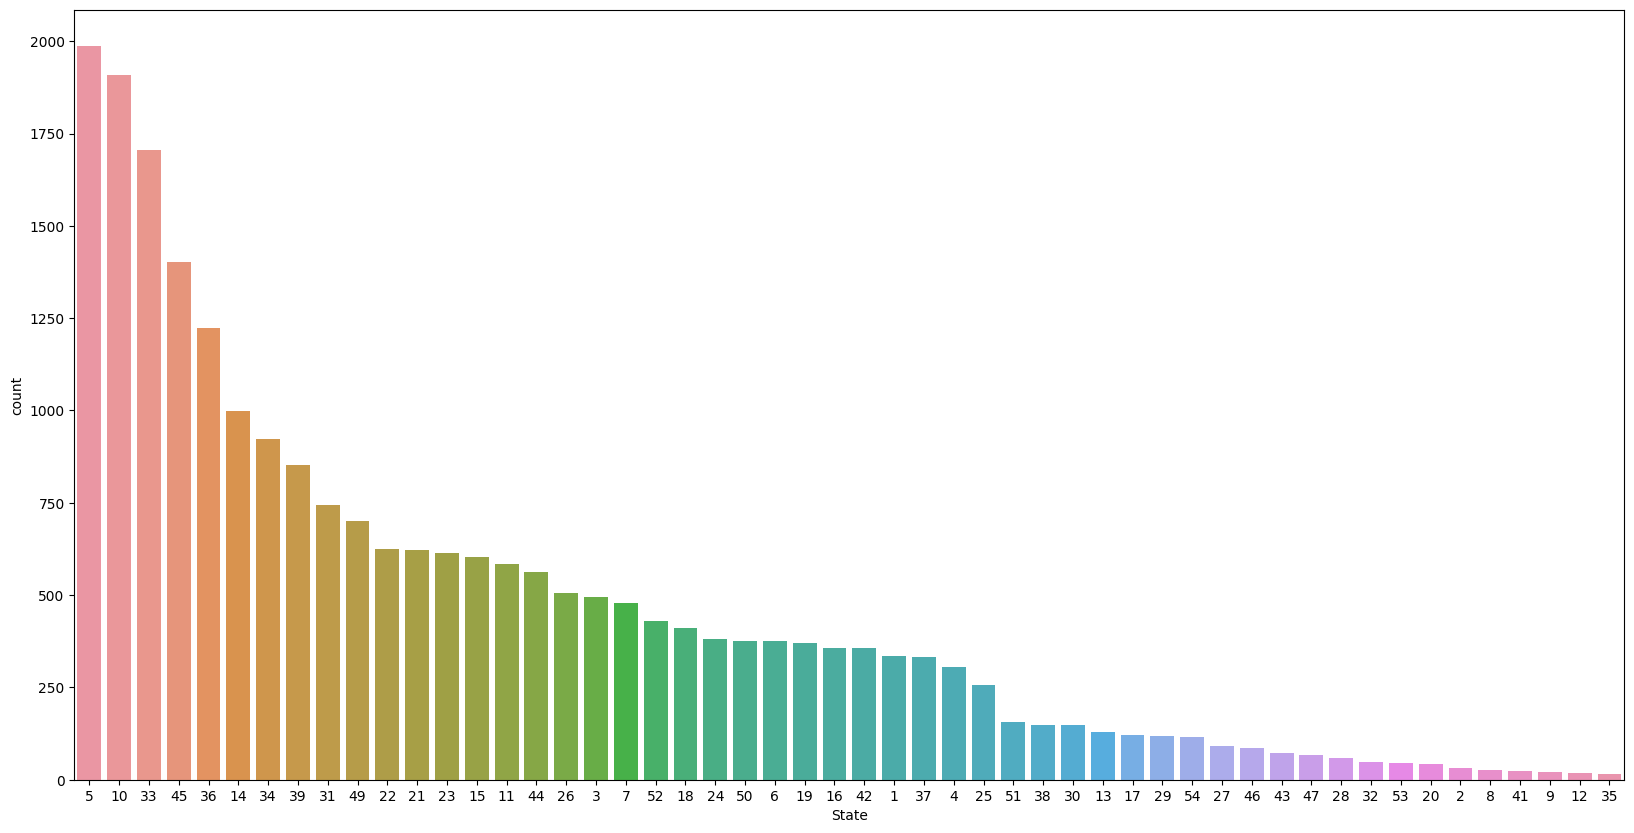

In [ ]:
#tr_data_final.State
plt.figure(figsize=(20, 10))
sns.countplot(x='State',y=None, data=tr_bene_inpat_df, orient ="v", order = tr_bene_inpat_df['State'].value_counts().index)

<AxesSubplot:xlabel='County', ylabel='count'>

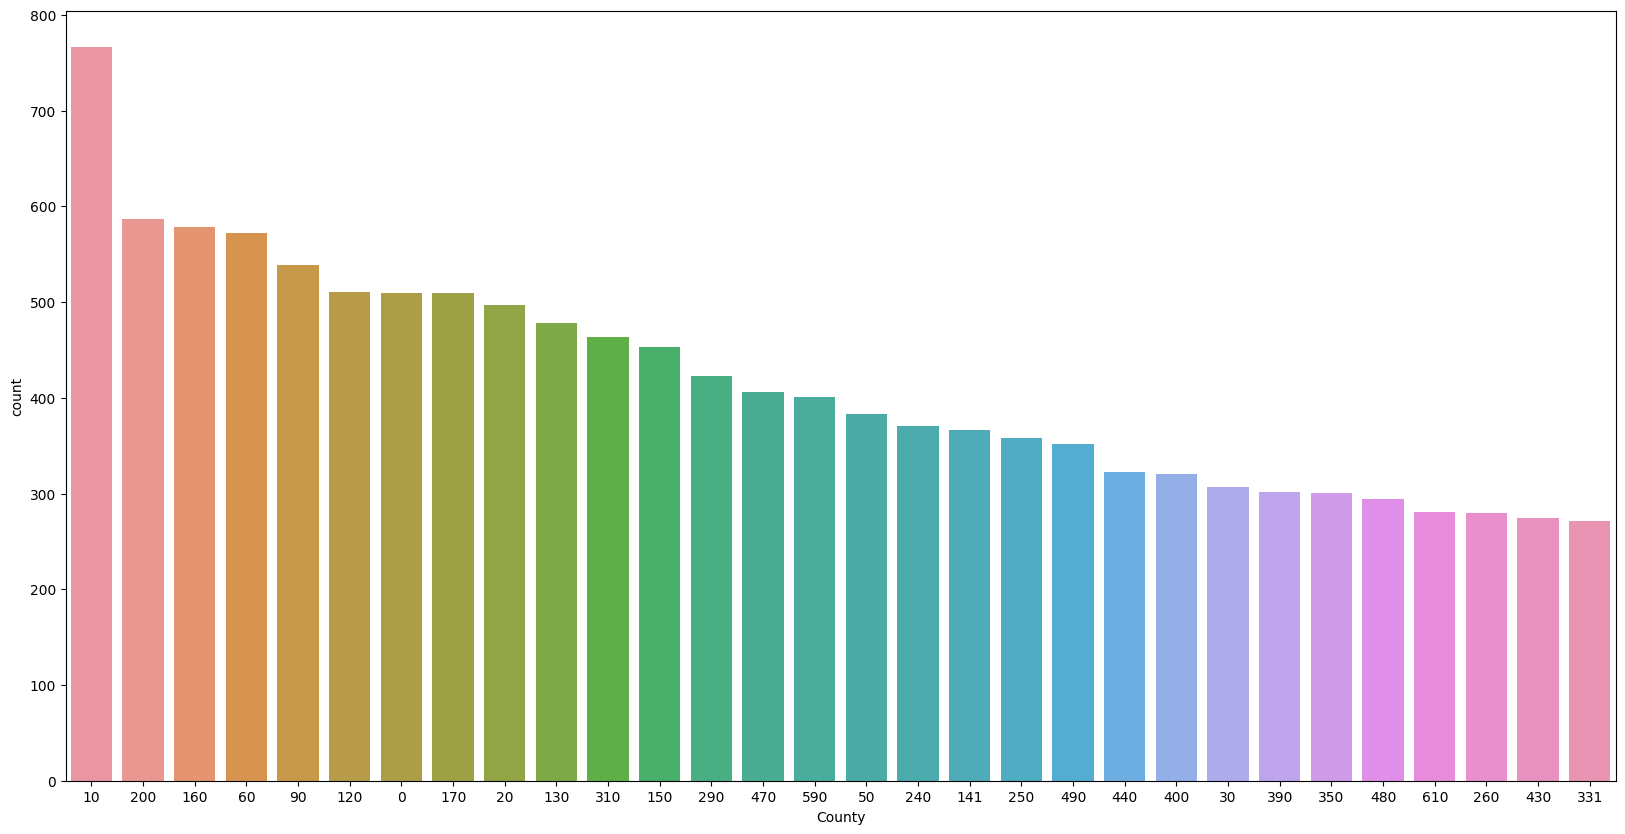

In [ ]:
#tr_data_final.State
plt.figure(figsize=(20, 10))
sns.countplot(x='County',y=None, data=tr_bene_inpat_df, orient ="v", order = tr_bene_inpat_df['County'].value_counts().head(30).index)

<h2>Conclusion</h2>
<h4> #Inpatient + fraud -- State </h4>
<ol>
<li>State coded as 5,10,33 and 45 have most fradulent encounters for Inpatient data .</li>
<li>County coded as 10,200,160 and 60 have most fradulent encounters for Inpatient data .</li>


## Outpatient +Fraud  -- State

In [ ]:
tr_bene_outpat_df = pd.merge(tr_data_beneficiary, fraud_provider_outpatient_df, how='inner', on='BeneID')
print(tr_bene_outpat_df.shape)
tr_bene_outpat_df.head(2)

(189394, 52)


BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11002  1936-09-01  NaN       2     1                     0     39   
1  BENE11004  1922-07-01  NaN       1     1                     0     39   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ...  ClmDiagnosisCode_10  \
0     280                   12                   12  ...                  NaN   
1     270                   12                   12  ...                  NaN   

   ClmProcedureCode_1  ClmProcedureCode_2  ClmProcedureCode_3  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   

   ClmProcedureCode_4  ClmProcedureCode_5  ClmProcedureCode_6  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   

   DeductibleAmtPaid  ClmAdmitDiagnosisCode  PotentialFraud  
0                  0                  56409             Yes  
1                  0                    NaN             Yes  

[2 rows x 52 columns]

<AxesSubplot:xlabel='State', ylabel='count'>

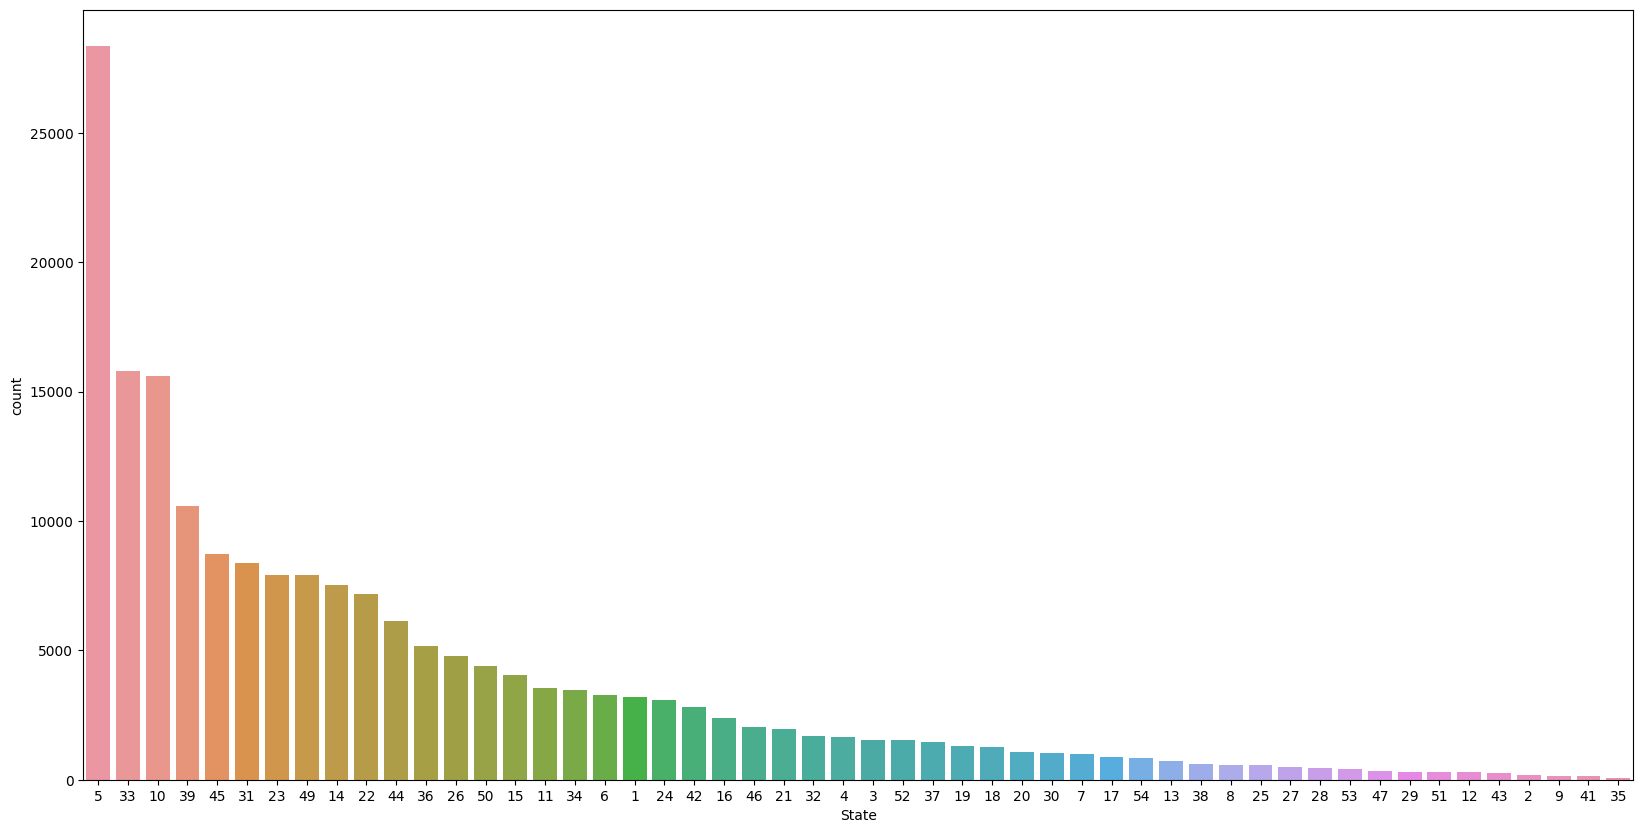

In [ ]:
#tr_data_final.State
plt.figure(figsize=(20, 10))
sns.countplot(x='State',y=None, data=tr_bene_outpat_df, orient ="v", order = tr_bene_outpat_df['State'].value_counts().index)

<AxesSubplot:xlabel='County', ylabel='count'>

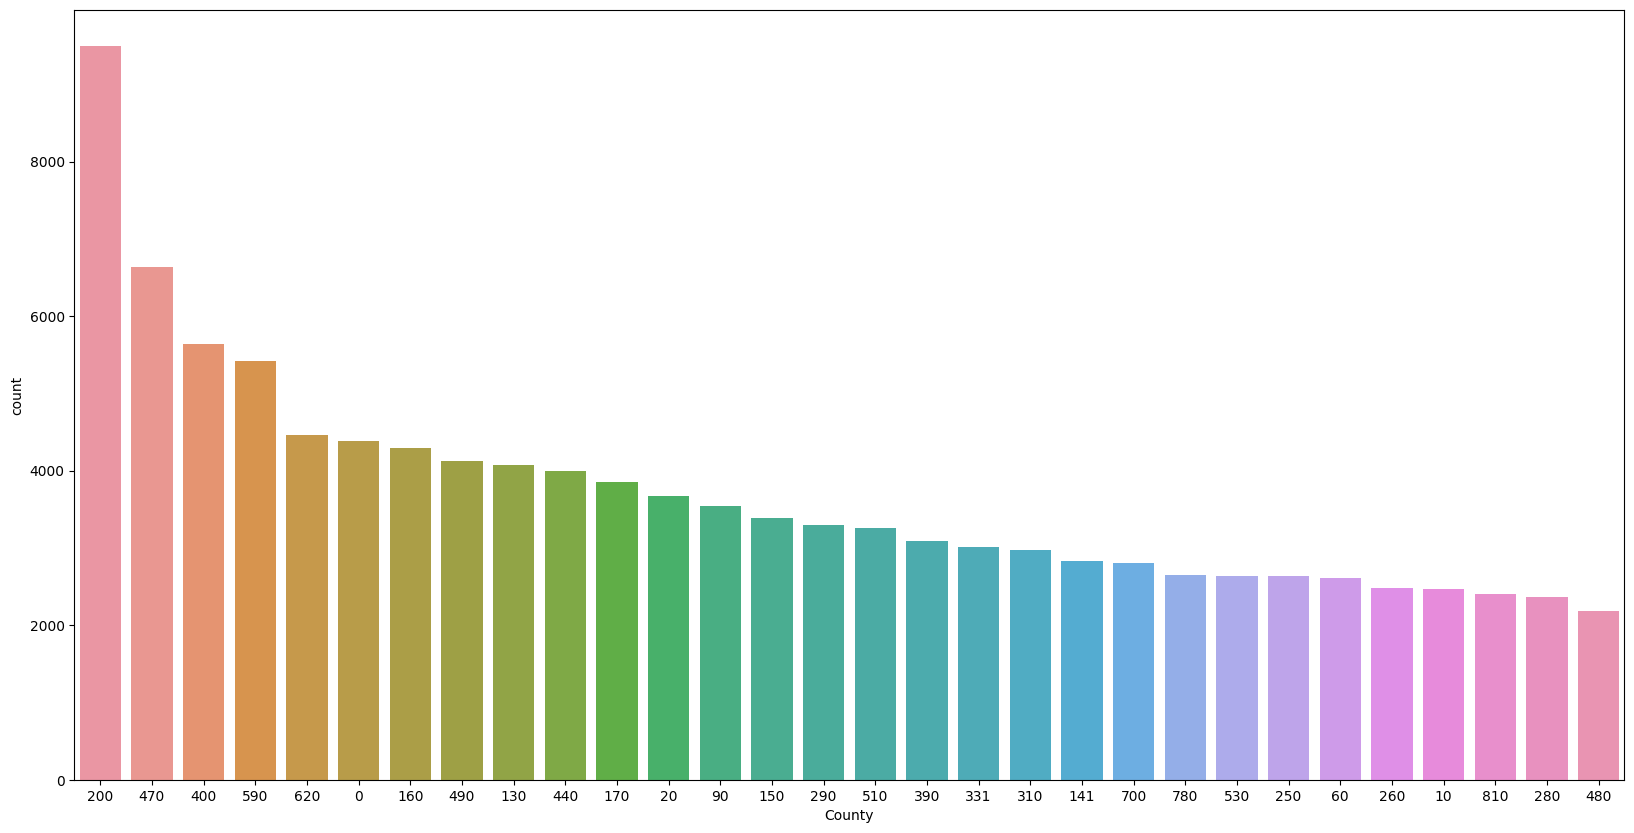

In [ ]:
#tr_data_final.State
plt.figure(figsize=(20, 10))
sns.countplot(x='County',y=None, data=tr_bene_outpat_df, orient ="v", order = tr_bene_outpat_df['County'].value_counts().head(30).index)

<h2>Conclusion</h2>
<h4> #Outpatient + fraud -- State </h4>
<ol>
<li>State coded as 5,33,10 and 39 have most fradulent encounters for Inpatient data .</li>
<li>County coded as 200,470,400 and 590 have most fradulent encounters for Outpatient data .</li>

# 6.b DOB

## Inpatient + Fraud - DOB

<AxesSubplot:xlabel='DOB', ylabel='Density'>

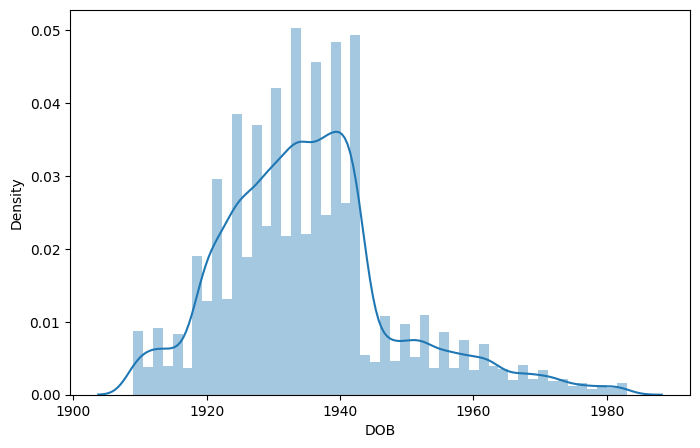

In [ ]:
plt.figure(figsize=(8, 5))
sns.distplot(tr_bene_inpat_df.DOB.apply(get_year))

<h2>Conclusion</h2>
<h4> #Inpatient + Fraud - DOB </h4>
<ol>
<li>Most Fraudulent ecounters in Inpatient Data is observed for the patients born between 1920 and 1945 </li>

## Outpatient + Fraud - DOB

<AxesSubplot:xlabel='DOB', ylabel='Density'>

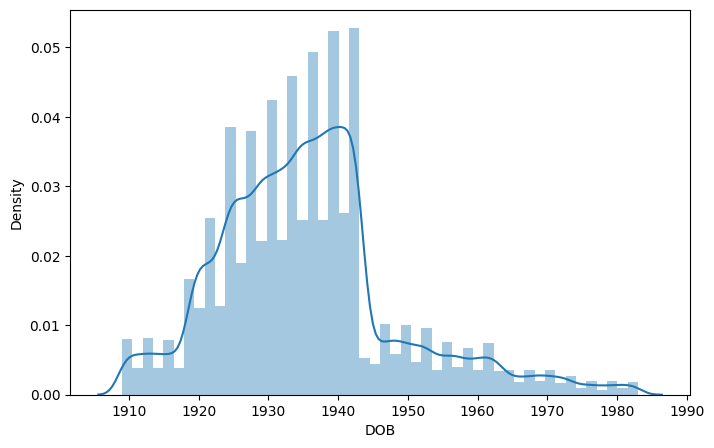

In [ ]:
plt.figure(figsize=(8, 5))
sns.distplot(tr_bene_outpat_df.DOB.apply(get_year))

<h2>Conclusion</h2>
<h4> #Outpatient + Fraud - DOB </h4>
<ol>
<li>Most Fradulent ecounters in outpatient Data is observed for the patients born between 1920 and 1945 </li>

# 7.  Calculating Money lost in Fraud for both Inpatient and outpatient data

In [ ]:
#merging Inpatient and labeled fradulent providers
inpat_labeled_provider_df = pd.merge(tr_data_inpatient , target_data , how='inner', on='Provider')
print(inpat_labeled_provider_df.shape)

(40474, 31)


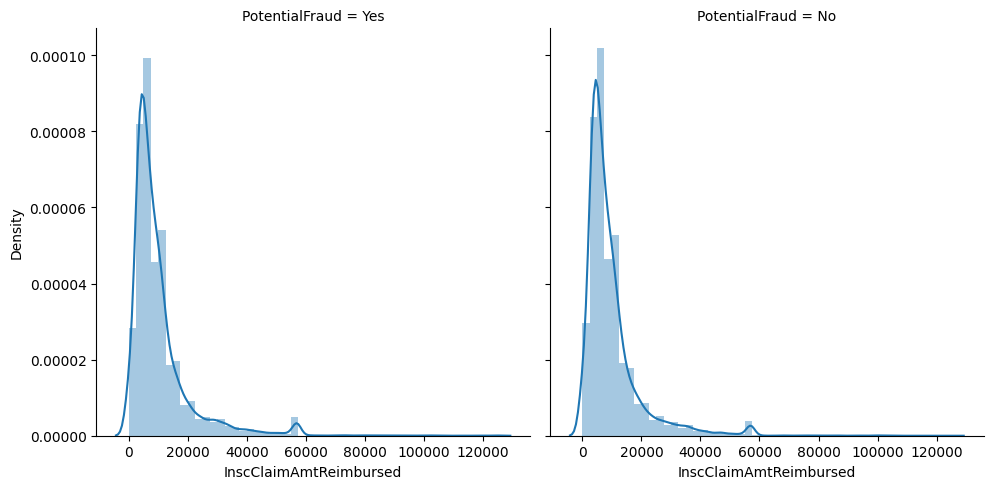

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.FacetGrid(inpat_labeled_provider_df, col='PotentialFraud',height=5).map(sns.distplot, "InscClaimAmtReimbursed",).add_legend()
plt.show()
plt.tight_layout()

In [ ]:
#calculating total money lost in fraudulent encounters
Total_money_lost = inpat_labeled_provider_df.loc[inpat_labeled_provider_df['PotentialFraud']== 'Yes'].InscClaimAmtReimbursed.sum()

print("Total money lost : ",Total_money_lost)

Total money lost :  241288510


In [ ]:
#merging Outpatient and labeled fradulent providers
outpat_labeled_provider_df = pd.merge(tr_data_outpatient , target_data , how='inner', on='Provider')
print(outpat_labeled_provider_df.shape)

(517737, 28)


In [ ]:
#calculatinng total money lost in fraudulent encounters
Total_money_lost = outpat_labeled_provider_df.loc[outpat_labeled_provider_df['PotentialFraud']== 'Yes'].InscClaimAmtReimbursed.sum()

print("Total money lost : ",Total_money_lost)

Total money lost :  54392610


In [ ]:
 print('Total money lost as per the data for 2019 = ','241288510+54392610, which is approximately 290 Million' )

Total money lost as per the data for 2019 =  241288510+54392610, which is approximately 290 Million


<h3><b>Upto this point we have done thorough EDA on columns of each of the data files. NOw we will merge them all and then perform EDA to establish a trend in data and the  target </b></h3>

# Data preprocessing and Feature Engineering

## Merging all datasets together

In [ ]:
tr_data_inpatient['is_admitted'] = 1
tr_data_outpatient['is_admitted'] = 0

In [ ]:
# Merge in_pt, out_pt and ben df into a single patient dataset
tr_data1 = pd.merge(tr_data_inpatient, tr_data_outpatient,
                    left_on = [ idx for idx in tr_data_outpatient.columns if idx in tr_data_inpatient.columns],
                    right_on = [ idx for idx in tr_data_outpatient.columns if idx in tr_data_inpatient.columns],
                    how = 'outer').\
          merge(tr_data_beneficiary,left_on='BeneID',right_on='BeneID',how='inner')

In [ ]:
# Replace values with a binary annotation
tr_data1 = tr_data1.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                   'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2,
                   'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2,
                   'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2, 'Gender': 2 },
                  0)

In [ ]:
tr_data1['RenalDiseaseIndicator'].value_counts()

0    448363
Y    109848
Name: RenalDiseaseIndicator, dtype: int64

In [ ]:
#tr_data1.RenalDiseaseIndicator.unique() #array(['0', 'Y'], dtype=object)
# Replace values with a binary annotation
tr_data1 = tr_data1.replace({'RenalDiseaseIndicator': 'Y'}, 1).astype({'RenalDiseaseIndicator': 'int64'})#array([0, 1], dtype=int64)

In [ ]:
#merging the dataset created in above step with target_data
tr_data_final = pd.merge(tr_data1, target_data , how = 'outer', on = 'Provider' )

In [ ]:
# adding extra column target, having binary annotation
tr_data_final['target'] = tr_data_final['PotentialFraud']

# 1 representing potential fraud and 0 representing non potential fraud
tr_data_final['target'] = tr_data_final['target'].map({"Yes":1,"No":0})
tr_data_final['target'] = tr_data_final['target'].astype('category',copy=False)


No     345415
Yes    212796
Name: PotentialFraud, dtype: int64


<AxesSubplot:xlabel='PotentialFraud', ylabel='count'>

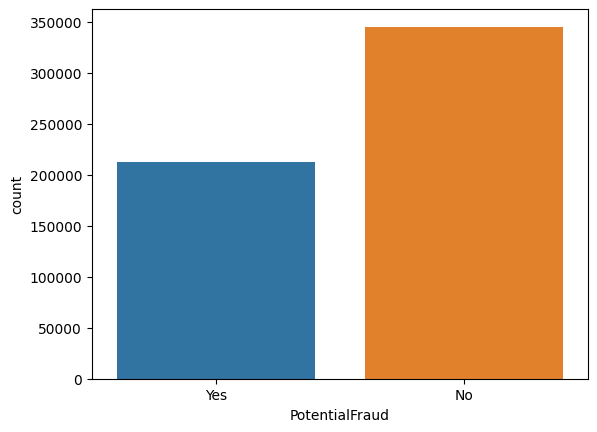

In [ ]:
print(tr_data_final.PotentialFraud.value_counts())
sns.countplot(x='PotentialFraud', data=tr_data_final)

In [ ]:
print(tr_data_final.shape)
tr_data_final.head(5)

(558211, 57)


BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001   CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE16973  CLM565430   2009-09-06  2009-09-06  PRV55912   
2  BENE17521   CLM34721   2009-01-20  2009-02-01  PRV55912   
3  BENE21718   CLM72336   2009-10-17  2009-11-04  PRV55912   
4  BENE22934   CLM73394   2009-10-25  2009-10-29  PRV55912   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                      50          PHY365867          PHY327147   
2                   19000          PHY349293          PHY370861   
3                   17000          PHY334706          PHY334706   
4                   13000          PHY390614          PHY323689   

  OtherPhysician AdmissionDt  ... ChronicCond_IschemicHeart  \
0            NaN  2009-04-12  ...                         1   
1            NaN         NaN  ...                         1   
2      PHY363291  2009-01-20  ...                         1   
3            NaN  2009-10-17  ...                         1   
4      PHY363291  2009-10-25  ...                         1   

   ChronicCond_Osteoporasis ChronicCond_rheumatoidarthritis  \
0                         0                               1   
1                         0                               0   
2                         0                               0   
3                         1                               0   
4                         1                               1   

  ChronicCond_stroke IPAnnualReimbursementAmt IPAnnualDeductibleAmt  \
0                  1                    36000                  3204   
1                  0                    24000                  2136   
2                  0                    19000                  1068   
3                  0                    17000                  1068   
4                  0                    27000                  2136   

  OPAnnualReimbursementAmt OPAnnualDeductibleAmt PotentialFraud target  
0                       60                    70            Yes      1  
1                      450                   200            Yes      1  
2                      100                    20            Yes      1  
3                     1050                   540            Yes      1  
4                      450                   160            Yes      1  

[5 rows x 57 columns]

In [ ]:
#check colums for NaN values
tr_data_final.isna().sum()

BeneID                                  0
ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
AdmissionDt                        517737
ClmAdmitDiagnosisCode              412312
DeductibleAmtPaid                     899
DischargeDt                        517737
DiagnosisGroupCode                 517737
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_4                 393675
ClmDiagnosisCode_5                 446287
ClmDiagnosisCode_6                 473819
ClmDiagnosisCode_7                 492034
ClmDiagnosisCode_8                 504767
ClmDiagnosisCode_9                 516396
ClmDiagnosisCode_10               

In [ ]:
#Adding a column is_dead  = 1  DOD is given else is_dead = 0
tr_data_final.loc[tr_data_final['DOD'].isnull(), 'Is_Dead'] = '0'
tr_data_final.loc[(tr_data_final['DOD'].notnull()), 'Is_Dead'] = '1'

As we have DOD for only few BeneID,so we can only determine the exact age of the patients who has died. we cannot get the age of the patients who might be alive. So its better that we calculate the age of the patient when they submitted their claim as we have record for ClaimStartDt

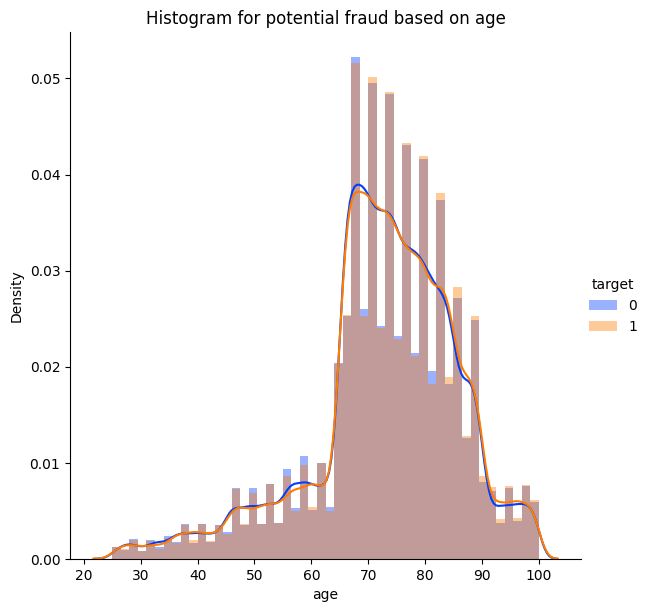

<Figure size 640x480 with 0 Axes>

In [ ]:
tr_data_final['DOB'] =  pd.to_datetime(tr_data_final['DOB'], format='%Y-%m-%d')
tr_data_final['ClaimStartDt'] = pd.to_datetime(tr_data_final['ClaimStartDt'], format='%Y-%m-%d')

#now = pd.to_datetime('2020-09-01' , format = '%Y-%m-%d')
tr_data_final['DOB'] = tr_data_final['DOB'].where(tr_data_final['DOB'] < tr_data_final['ClaimStartDt'])
tr_data_final['age'] = (tr_data_final['ClaimStartDt'] - tr_data_final['DOB']).astype('<m8[Y]')


#plotting age
sns.FacetGrid(tr_data_final, hue="target" , size=6, palette='bright').map(sns.distplot, "age",).add_legend()
plt.title('Histogram for potential fraud based on age')
plt.show()
plt.tight_layout()

<h2>Conclusion</h2>
<h4> # Age </h4>
<ol>
<li>We dont see any differnce in distribution of age that may enable us to flag potential fraud.</li>
<li>But we see increasing trend in the potential fraud cases for patients age > 65 Also most of the patient who applied for claim fall in this age range only</li>

Text(0.5, 1.0, 'Plot to Analyze relation between Race and fraud/not fraud')

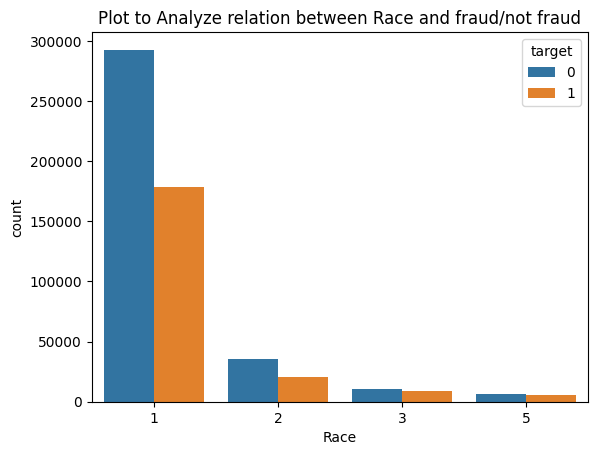

In [ ]:
ax = sns.countplot(x='Race',data=tr_data_final,hue='target')
ax.set_title("Plot to Analyze relation between Race and fraud/not fraud")

<h2>Conclusion</h2>
<ol>
<li>It is very important to see that most fraudulent cases is with patients belonging to a particular Race and that is labeled as 1</li>
</o>

In [ ]:
tr_data_final = tr_data_final.drop(['DOD'], axis = 1)
tr_data_final = tr_data_final.drop(['DOB'], axis = 1)

In [ ]:
#calculating number of days a patinet was admitted in the hospital and then removing admit and discharge date
#outpatients don't get admitted so we keep 0 for them


tr_data_final['AdmissionDt'] = pd.to_datetime(tr_data_final['AdmissionDt'] , format = '%Y-%m-%d')
tr_data_final['DischargeDt'] = pd.to_datetime(tr_data_final['DischargeDt'],format = '%Y-%m-%d')
tr_data_final['Num_admit_days'] = ((tr_data_final['DischargeDt'] - tr_data_final['AdmissionDt']).dt.days)+1
tr_data_final.loc[tr_data_final['is_admitted'] == 0, 'Num_admit_days'] = '0'

tr_data_final = tr_data_final.drop(['DischargeDt'], axis = 1)
tr_data_final = tr_data_final.drop(['AdmissionDt'], axis = 1)

In [ ]:
#check colums for NaN values
tr_data_final.isna().sum()

BeneID                                  0
ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
ClmAdmitDiagnosisCode              412312
DeductibleAmtPaid                     899
DiagnosisGroupCode                 517737
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_4                 393675
ClmDiagnosisCode_5                 446287
ClmDiagnosisCode_6                 473819
ClmDiagnosisCode_7                 492034
ClmDiagnosisCode_8                 504767
ClmDiagnosisCode_9                 516396
ClmDiagnosisCode_10                553201
ClmProcedureCode_1                 534901
ClmProcedureCode_2                

In [ ]:
#repalcing NaN value with 0
tr_data_final.loc[tr_data_final['DeductibleAmtPaid'].isnull(),'DeductibleAmtPaid'] = 0

<AxesSubplot:title={'center':'Top 5 sucpicious Diagnosis'}>

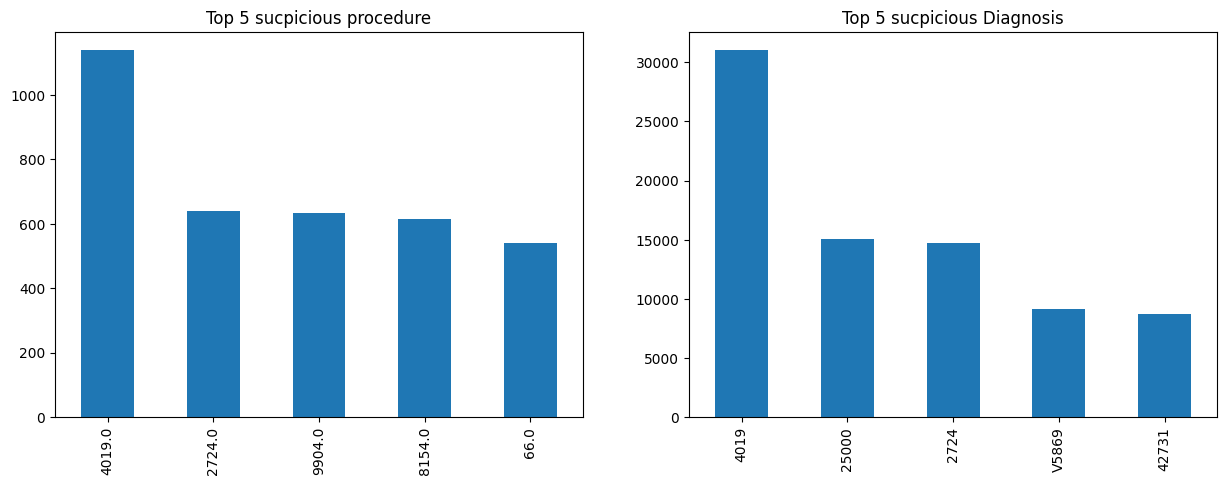

In [ ]:
potential_fraud_df =tr_data_final.loc[tr_data_final['PotentialFraud'] == 'Yes']

df1 = pd.DataFrame(columns = ['ProcedureCode'])
df1['ProcedureCode'] = pd.concat([potential_fraud_df["ClmProcedureCode_1"],
                                           potential_fraud_df["ClmProcedureCode_2"],
                                           potential_fraud_df["ClmProcedureCode_3"],
                                           potential_fraud_df["ClmProcedureCode_4"],
                                           potential_fraud_df["ClmProcedureCode_5"],
                                           potential_fraud_df["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

df2 = pd.DataFrame(columns = ['DiagnosisCode'])
df2['DiagnosisCode'] = pd.concat([potential_fraud_df["ClmDiagnosisCode_1"],
                                           potential_fraud_df["ClmDiagnosisCode_2"],
                                           potential_fraud_df["ClmDiagnosisCode_3"],
                                           potential_fraud_df["ClmDiagnosisCode_4"],
                                           potential_fraud_df["ClmDiagnosisCode_5"],
                                           potential_fraud_df["ClmDiagnosisCode_6"],
                                           potential_fraud_df["ClmDiagnosisCode_7"],
                                           potential_fraud_df["ClmDiagnosisCode_8"],
                                           potential_fraud_df["ClmDiagnosisCode_9"],
                                           potential_fraud_df["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

plt.figure(figsize=(15, 5))
plt.subplot(121)
df1.ProcedureCode.value_counts().head(5).plot(kind = 'bar' , title ='Top 5 sucpicious procedure')

plt.subplot(122)
df2.DiagnosisCode.value_counts().head(5).plot(kind = 'bar' , title ='Top 5 sucpicious Diagnosis')

In [ ]:
Diag_proce_col = ['ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_10',
                  'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
                  'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
                  'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmProcedureCode_1',
                  'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
                  'ClmProcedureCode_5', 'ClmProcedureCode_6']

tr_data_final[Diag_proce_col]= tr_data_final[Diag_proce_col].replace({np.nan:0})
tr_data_final.head(5)

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001   CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE16973  CLM565430   2009-09-06  2009-09-06  PRV55912   
2  BENE17521   CLM34721   2009-01-20  2009-02-01  PRV55912   
3  BENE21718   CLM72336   2009-10-17  2009-11-04  PRV55912   
4  BENE22934   CLM73394   2009-10-25  2009-10-29  PRV55912   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                      50          PHY365867          PHY327147   
2                   19000          PHY349293          PHY370861   
3                   17000          PHY334706          PHY334706   
4                   13000          PHY390614          PHY323689   

  OtherPhysician ClmAdmitDiagnosisCode  ...  ChronicCond_stroke  \
0            NaN                  7866  ...                   1   
1            NaN                     0  ...                   0   
2      PHY363291                 45340  ...                   0   
3            NaN                 V5789  ...                   0   
4      PHY363291                 71946  ...                   0   

  IPAnnualReimbursementAmt IPAnnualDeductibleAmt OPAnnualReimbursementAmt  \
0                    36000                  3204                       60   
1                    24000                  2136                      450   
2                    19000                  1068                      100   
3                    17000                  1068                     1050   
4                    27000                  2136                      450   

  OPAnnualDeductibleAmt PotentialFraud target Is_Dead   age Num_admit_days  
0                    70            Yes      1       0  66.0            7.0  
1                   200            Yes      1       0  77.0              0  
2                    20            Yes      1       0  95.0           13.0  
3                   540            Yes      1       0  87.0           19.0  
4                   160            Yes      1       0  79.0            5.0  

[5 rows x 56 columns]

In [ ]:
def encoded_cat(dataset, feature_to_encode='',col_list=[]):
    """This function returns top 5 cat column useful in determining potential fraud"""
    outer_list =[]
    for col in col_list:
        list_1 = list()

        for item in list(dataset[col]):
            if str(item) == str(feature_to_encode):
                list_1.append(1)
            else:
                list_1.append(0)

        outer_list.append(list_1)

    li_sum = np.array([0]*558211)

    for i in range(0,len(outer_list)):
        li1 = np.array(outer_list[i])
        li_sum = li_sum + li1

    return li_sum


procedure_col = ['ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6']

diagnosis_col = ['ClmDiagnosisCode_1','ClmDiagnosisCode_2','ClmDiagnosisCode_3','ClmDiagnosisCode_4','ClmDiagnosisCode_5','ClmDiagnosisCode_6','ClmDiagnosisCode_7','ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10']


#top 5 procedure
# 4019.0, 2724.0, 9904.0, 8154.0, 66.0
tr_data_final['pr_4019'] = encoded_cat(tr_data_final,'4019.0',procedure_col)
tr_data_final['pr_2724'] = encoded_cat(tr_data_final,'2724.0',procedure_col)
tr_data_final['pr_9904'] = encoded_cat(tr_data_final,'9904.0',procedure_col)
tr_data_final['pr_8154'] = encoded_cat(tr_data_final,'8154.0',procedure_col)
tr_data_final['pr_66'] =   encoded_cat(tr_data_final,'66.0',procedure_col)

#top 5 diagnosis
#4019,25000,2724,V5869,42731
tr_data_final['di_4019'] = encoded_cat(tr_data_final,'4019',diagnosis_col)
tr_data_final['di_25000'] = encoded_cat(tr_data_final,'25000',diagnosis_col)
tr_data_final['di_2724'] = encoded_cat(tr_data_final,'2724',diagnosis_col)
tr_data_final['di_V5869'] = encoded_cat(tr_data_final,'V5869',diagnosis_col)
tr_data_final['di_42731'] =   encoded_cat(tr_data_final,'42731',diagnosis_col)

In [ ]:
for i in Diag_proce_col:
    tr_data_final[i][tr_data_final[i]!=0]= 1

tr_data_final[Diag_proce_col].head(5)

ClmAdmitDiagnosisCode ClmDiagnosisCode_1 ClmDiagnosisCode_10  \
0                     1                  1                   0   
1                     0                  1                   0   
2                     1                  1                   0   
3                     1                  1                   0   
4                     1                  1                   0   

  ClmDiagnosisCode_2 ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5  \
0                  1                  1                  1                  1   
1                  1                  1                  1                  1   
2                  1                  1                  1                  1   
3                  1                  1                  1                  1   
4                  1                  1                  1                  1   

  ClmDiagnosisCode_6 ClmDiagnosisCode_7 ClmDiagnosisCode_8 ClmDiagnosisCode_9  \
0                  1                  1                  1                  1   
1                  1                  1                  1                  1   
2                  1                  1                  1                  1   
3                  1                  1                  1                  1   
4                  1                  1                  0                  0   

   ClmProcedureCode_1  ClmProcedureCode_2  ClmProcedureCode_3  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 1.0                 1.0                 0.0   
3                 1.0                 0.0                 0.0   
4                 1.0                 0.0                 0.0   

   ClmProcedureCode_4  ClmProcedureCode_5  ClmProcedureCode_6  
0                 0.0                 0.0                 0.0  
1                 0.0                 0.0                 0.0  
2                 0.0                 0.0                 0.0  
3                 0.0                 0.0                 0.0  
4                 0.0                 0.0                 0.0

In [ ]:
tr_data_final[Diag_proce_col]= tr_data_final[Diag_proce_col].astype(float)

In [ ]:
#adding column total_num_diag
tr_data_final['total_num_diag'] = 0
for col in diagnosis_col :
    tr_data_final['total_num_diag']  = tr_data_final['total_num_diag'] + tr_data_final[col]

In [ ]:
#adding column total_num_proce
tr_data_final['total_num_proce'] = 0
for col in procedure_col :
    tr_data_final['total_num_proce']  = tr_data_final['total_num_proce'] + tr_data_final[col]

In [ ]:
tr_data_final['total_num_diag'] =  tr_data_final['total_num_diag'].astype(float)
tr_data_final['total_num_proce'] =  tr_data_final['total_num_proce'].astype(float)

### Checking if we have duplicate rows

In [ ]:
#Checking we how many distinct BeneID we have in our data
#len(list(tr_data_final.BeneID.value_counts()==1))
len(list(tr_data_final['BeneID'].unique()))

138556

In [ ]:
#Checking we how many distinct ClaimID we have in our data
len(list(tr_data_final['ClaimID'].unique()))

558211

<h2>Conclusion</h2>
<ol>
<li>We have data for 138556 BeneID which means one beneficiary has applied  for claim multiple times</li>
<li>Also we have 558211 distinct claimsID, which means we have separate record for each benefiacry every time he applied for claims </li>
<li>No duplicate rows are present in our dataset </li>

In [ ]:
val_counts_ = tr_data_final['BeneID'].value_counts()
tr_data_final_beneid_df = val_counts_.to_frame() #store this information in dataframe

tr_data_final_beneid_df.columns = ['count']
tr_data_final_beneid_df['BeneID'] = tr_data_final_beneid_df.index
tr_data_final_beneid_df

count      BeneID
BENE42721      29   BENE42721
BENE59303      29   BENE59303
BENE118316     29  BENE118316
BENE80977      28   BENE80977
BENE36330      28   BENE36330
...           ...         ...
BENE71134       1   BENE71134
BENE118154      1  BENE118154
BENE100290      1  BENE100290
BENE137665      1  BENE137665
BENE153476      1  BENE153476

[138556 rows x 2 columns]

In [ ]:
total_amt_list = []
mean_amt_list = []

for benid in tqdm(tr_data_final_beneid_df['BeneID']):

    total_amt = tr_data_final.loc[tr_data_final['BeneID'] == benid,'InscClaimAmtReimbursed'].sum()
    mean_amt = total_amt / (tr_data_final_beneid_df.loc[tr_data_final_beneid_df['BeneID'] == benid,'count'])

    total_amt_list.append(total_amt)
    mean_amt_list.append(mean_amt)


100%|███████████████████████████████████| 138556/138556 [43:28<00:00, 53.13it/s]


In [ ]:
mean_list = []
for item in tqdm(mean_amt_list):
    mean_list.append(item[0])

100%|███████████████████████████████| 138556/138556 [00:00<00:00, 243988.61it/s]


In [ ]:
tr_data_final_beneid_df['mean_InscClaimAmtReimbursed']=mean_list
tr_data_final_beneid_df['total_InscClaimAmtReimbursed']= total_amt_list
tr_data_final_beneid_df

count      BeneID  mean_InscClaimAmtReimbursed  \
BENE42721      29   BENE42721                  1217.586207   
BENE59303      29   BENE59303                  1175.862069   
BENE118316     29  BENE118316                  1481.034483   
BENE80977      28   BENE80977                  2242.142857   
BENE36330      28   BENE36330                  2181.785714   
...           ...         ...                          ...   
BENE71134       1   BENE71134                    10.000000   
BENE118154      1  BENE118154                  8000.000000   
BENE100290      1  BENE100290                 19000.000000   
BENE137665      1  BENE137665                    50.000000   
BENE153476      1  BENE153476                    30.000000   

            total_InscClaimAmtReimbursed  
BENE42721                          35310  
BENE59303                          34100  
BENE118316                         42950  
BENE80977                          62780  
BENE36330                          61090  
...                                  ...  
BENE71134                             10  
BENE118154                          8000  
BENE100290                         19000  
BENE137665                            50  
BENE153476                            30  

[138556 rows x 4 columns]

In [ ]:
tr_data_final_beneid_df.to_csv('tr_data_final_beneid_df.csv',index= False)

In [ ]:
import pickle

with open('total_amt_list.pkl', 'wb') as f:
    pickle.dump(total_amt_list, f)

with open('mean_amt_list.pkl', 'wb') as f:
    pickle.dump(mean_amt_list, f)

In [ ]:
tr_data_final = pd.merge(tr_data_final, tr_data_final_beneid_df, how='outer', on='BeneID')
print("Dataset shape : ", tr_data_final.shape)
tr_data_final.head(5)

Dataset shape :  (558211, 71)


BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001   CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE11001   CLM66048   2009-08-31  2009-09-02  PRV55907   
2  BENE11001   CLM68358   2009-09-17  2009-09-20  PRV56046   
3  BENE16973  CLM565430   2009-09-06  2009-09-06  PRV55912   
4  BENE16973   CLM65335   2009-08-25  2009-08-30  PRV55905   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                    5000          PHY318495          PHY318495   
2                    5000          PHY372395                NaN   
3                      50          PHY365867          PHY327147   
4                    9000          PHY340413          PHY340413   

  OtherPhysician  ClmAdmitDiagnosisCode  ...  di_4019 di_25000  di_2724  \
0            NaN                    1.0  ...        1        0        1   
1            NaN                    1.0  ...        0        0        0   
2      PHY324689                    1.0  ...        0        0        0   
3            NaN                    0.0  ...        0        0        0   
4            NaN                    1.0  ...        0        0        0   

   di_V5869  di_42731  total_num_diag  total_num_proce  count  \
0         0         0             9.0              0.0      3   
1         0         0             3.0              1.0      3   
2         0         0             6.0              0.0      3   
3         0         0             9.0              0.0      3   
4         0         0             3.0              1.0      3   

   mean_InscClaimAmtReimbursed  total_InscClaimAmtReimbursed  
0                      12000.0                         36000  
1                      12000.0                         36000  
2                      12000.0                         36000  
3                       3150.0                          9450  
4                       3150.0                          9450  

[5 rows x 71 columns]

In [ ]:
tr_data_final[['mean_InscClaimAmtReimbursed','total_InscClaimAmtReimbursed']]= tr_data_final[['mean_InscClaimAmtReimbursed','total_InscClaimAmtReimbursed']].astype(float)

In [ ]:
def N_unique_values(df):
    """This function finds the unique values in a df row"""
    return np.array([len(set([i for i in x[~pd.isnull(x)]])) for x in df.values])

In [ ]:
#number of unique physicians for each patient
tr_data_final['N_unique_Physicians'] = N_unique_values(tr_data_final[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']])

#encoding types of physicians into numeric values
tr_data_final[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']] = np.where(tr_data_final[['AttendingPhysician','OperatingPhysician',
                                                                                      'OtherPhysician']].isnull(), 0, 1)

# number of different physicians who attend a patient
tr_data_final['N_Types_Physicians'] = tr_data_final['AttendingPhysician'] +  tr_data_final['OperatingPhysician'] + tr_data_final['OtherPhysician']

# patients who was attended by only 1 physicians
tr_data_final['Same_Physician'] = tr_data_final.apply(lambda x: 1 if (x['N_unique_Physicians'] == 1 and x['N_Types_Physicians'] > 1) else 0,axis=1)

#determine if 1 physician has multi[le role to attend a patient
tr_data_final['Same_Physician2'] = tr_data_final.apply(lambda x: 1 if (x['N_unique_Physicians'] == 2 and x['N_Types_Physicians'] > 2) else 0,axis=1)

tr_data_final[['N_unique_Physicians','N_Types_Physicians','Same_Physician','Same_Physician2']].head()

N_unique_Physicians  N_Types_Physicians  Same_Physician  Same_Physician2
0                    1                   1               0                0
1                    1                   2               1                0
2                    2                   2               0                0
3                    2                   2               0                0
4                    1                   2               1                0

<AxesSubplot:>

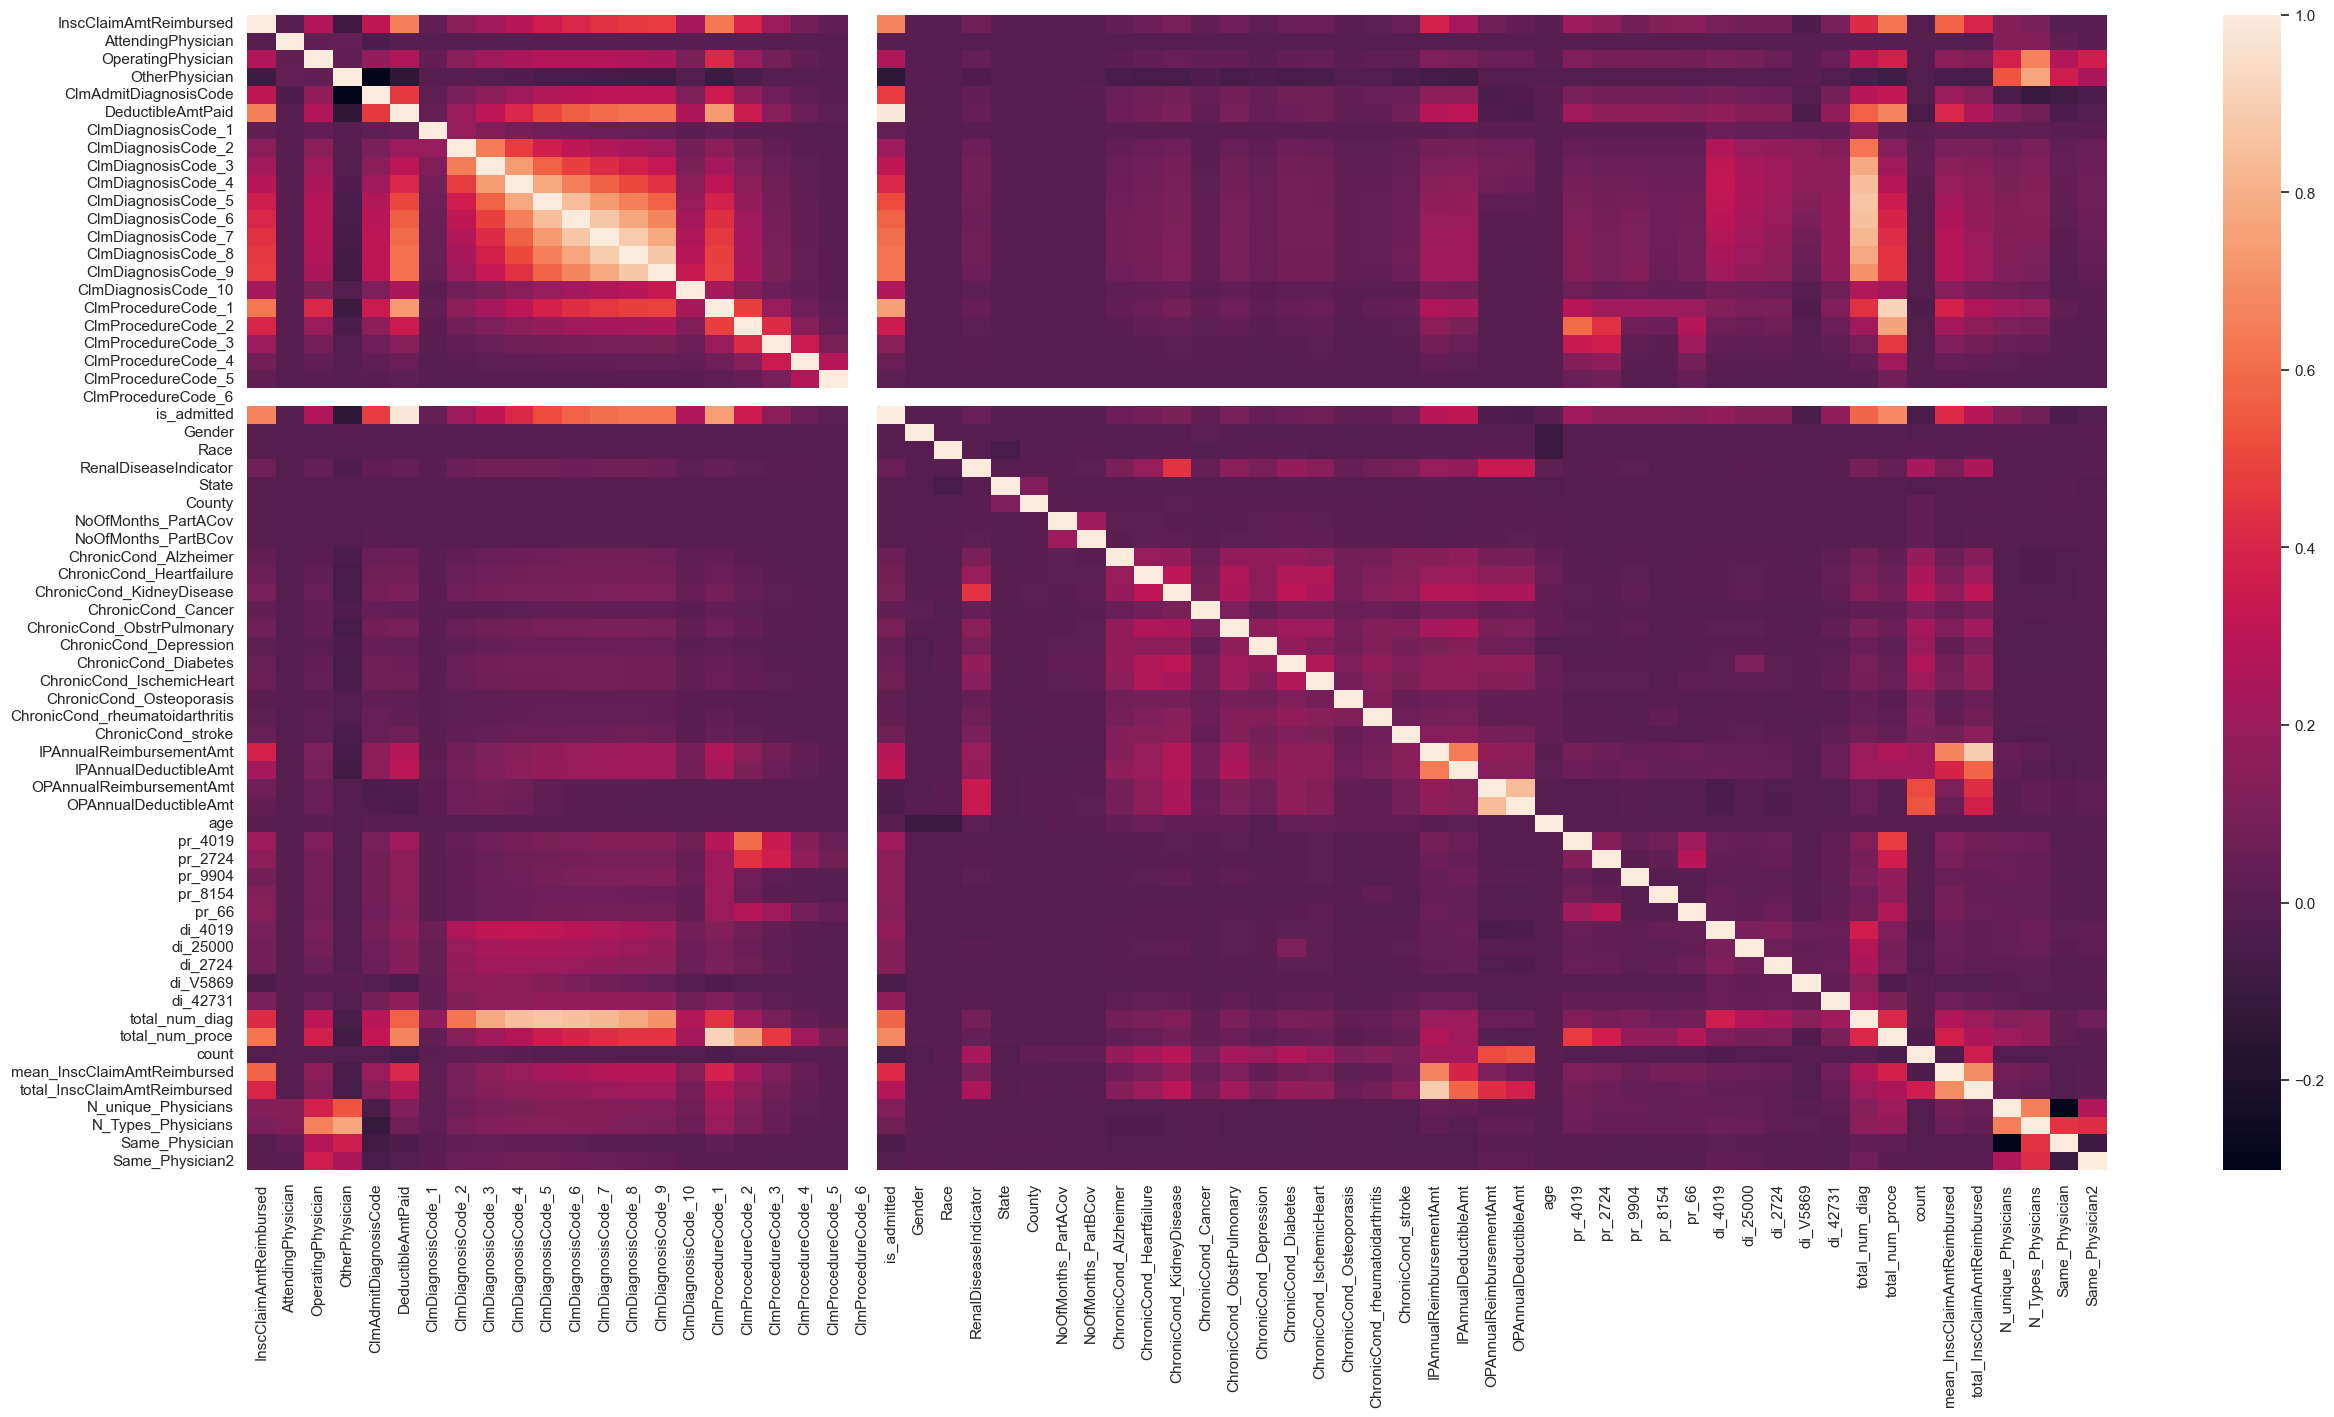

In [ ]:
#plot correlation heat map between features
sns.set(context='notebook', style='whitegrid')
plt.figure(figsize=(30, 15))
corr = tr_data_final.corr()
sns.heatmap(corr, annot=False)

In [ ]:
#replace NaN val with 0
#tr_data_final.DiagnosisGroupCode
tr_data_final['DiagnosisGroupCode']= tr_data_final['DiagnosisGroupCode'].replace({np.nan:0})

In [ ]:
#final check to see if a col val is NaN
col_inf_df=pd.DataFrame()
val = tr_data_final.isnull().sum()
col_inf_df['null_col_count']  = val
col_inf_df['column'] = val.index
col_inf_df.loc[col_inf_df['null_col_count'] !=0]

Empty DataFrame
Columns: [null_col_count, column]
Index: []

In [ ]:
col_inf_df.null_col_count.value_counts()

0    75
Name: null_col_count, dtype: int64

In [ ]:
for col in tr_data_final.columns:
    print(col)

BeneID
ClaimID
ClaimStartDt
ClaimEndDt
Provider
InscClaimAmtReimbursed
AttendingPhysician
OperatingPhysician
OtherPhysician
ClmAdmitDiagnosisCode
DeductibleAmtPaid
DiagnosisGroupCode
ClmDiagnosisCode_1
ClmDiagnosisCode_2
ClmDiagnosisCode_3
ClmDiagnosisCode_4
ClmDiagnosisCode_5
ClmDiagnosisCode_6
ClmDiagnosisCode_7
ClmDiagnosisCode_8
ClmDiagnosisCode_9
ClmDiagnosisCode_10
ClmProcedureCode_1
ClmProcedureCode_2
ClmProcedureCode_3
ClmProcedureCode_4
ClmProcedureCode_5
ClmProcedureCode_6
is_admitted
Gender
Race
RenalDiseaseIndicator
State
County
NoOfMonths_PartACov
NoOfMonths_PartBCov
ChronicCond_Alzheimer
ChronicCond_Heartfailure
ChronicCond_KidneyDisease
ChronicCond_Cancer
ChronicCond_ObstrPulmonary
ChronicCond_Depression
ChronicCond_Diabetes
ChronicCond_IschemicHeart
ChronicCond_Osteoporasis
ChronicCond_rheumatoidarthritis
ChronicCond_stroke
IPAnnualReimbursementAmt
IPAnnualDeductibleAmt
OPAnnualReimbursementAmt
OPAnnualDeductibleAmt
PotentialFraud
target
Is_Dead
age
Num_admit_days
pr_40

In [ ]:
#saving dataframe to csv file to avoid rework
tr_data_final.to_csv("tr_data_final.csv",index= False)

In [ ]:
tr_data_final = pd.read_csv("tr_data_final.csv")

print(tr_data_final.shape)
tr_data_final.head(2)

(558211, 75)


BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE11001  CLM66048   2009-08-31  2009-09-02  PRV55907   

   InscClaimAmtReimbursed  AttendingPhysician  OperatingPhysician  \
0                   26000                   1                   0   
1                    5000                   1                   1   

   OtherPhysician  ClmAdmitDiagnosisCode  ...  di_42731 total_num_diag  \
0               0                    1.0  ...         0            9.0   
1               0                    1.0  ...         0            3.0   

   total_num_proce  count  mean_InscClaimAmtReimbursed  \
0              0.0      3                      12000.0   
1              1.0      3                      12000.0   

   total_InscClaimAmtReimbursed  N_unique_Physicians  N_Types_Physicians  \
0                       36000.0                    1                   1   
1                       36000.0                    1                   2   

   Same_Physician  Same_Physician2  
0               0                0  
1               1                0  

[2 rows x 75 columns]

In [ ]:
col_to_remove = ['Provider','BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt','AttendingPhysician',\
                 'OperatingPhysician', 'OtherPhysician','ClmAdmitDiagnosisCode','NoOfMonths_PartACov',\
                 'NoOfMonths_PartBCov','DiagnosisGroupCode','PotentialFraud']

tr_data_final.drop(columns=col_to_remove, axis=1, inplace=True)
tr_data_final['target']=tr_data_final['target'].astype(int)

In [ ]:
tr_data_final.head()

InscClaimAmtReimbursed  DeductibleAmtPaid  ClmDiagnosisCode_1  \
0                   26000             1068.0                 1.0   
1                    5000             1068.0                 1.0   
2                    5000             1068.0                 1.0   
3                      50                0.0                 1.0   
4                    9000             1068.0                 1.0   

   ClmDiagnosisCode_2  ClmDiagnosisCode_3  ClmDiagnosisCode_4  \
0                 1.0                 1.0                 1.0   
1                 1.0                 1.0                 0.0   
2                 1.0                 1.0                 1.0   
3                 1.0                 1.0                 1.0   
4                 1.0                 1.0                 0.0   

   ClmDiagnosisCode_5  ClmDiagnosisCode_6  ClmDiagnosisCode_7  \
0                 1.0                 1.0                 1.0   
1                 0.0                 0.0                 0.0   
2                 1.0                 1.0                 0.0   
3                 1.0                 1.0                 1.0   
4                 0.0                 0.0                 0.0   

   ClmDiagnosisCode_8  ...  di_42731  total_num_diag  total_num_proce  count  \
0                 1.0  ...         0             9.0              0.0      3   
1                 0.0  ...         0             3.0              1.0      3   
2                 0.0  ...         0             6.0              0.0      3   
3                 1.0  ...         0             9.0              0.0      3   
4                 0.0  ...         0             3.0              1.0      3   

   mean_InscClaimAmtReimbursed  total_InscClaimAmtReimbursed  \
0                      12000.0                       36000.0   
1                      12000.0                       36000.0   
2                      12000.0                       36000.0   
3                       3150.0                        9450.0   
4                       3150.0                        9450.0   

   N_unique_Physicians  N_Types_Physicians  Same_Physician  Same_Physician2  
0                    1                   1               0                0  
1                    1                   2               1                0  
2                    2                   2               0                0  
3                    2                   2               0                0  
4                    1                   2               1                0  

[5 rows x 62 columns]

In [ ]:
tr_data_final['target'].value_counts()

0    345415
1    212796
Name: target, dtype: int64

In [ ]:
y = tr_data_final['target']
X = tr_data_final.drop('target', axis=1)

In [ ]:
X.columns

Index(['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
       'is_admitted', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State',
       'County', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'Is_Dead', 'ag

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)


print("Shapes data into train,test,CV splitting..")
print("Training X : ",X_train.shape," | Training Y : ",y_train.shape)
print("Test X : ",X_test.shape," | Test Y : ",y_test.shape)

Shapes data into train,test,CV splitting..
Training X :  (374001, 61)  | Training Y :  (374001,)
Test X :  (184210, 61)  | Test Y :  (184210,)


In [ ]:
print(X_train.shape)
print(X_test.shape)

(374001, 61)
(184210, 61)


# Handling Numerical Column

In [ ]:
'''from sklearn.preprocessing import Normalizer , StandardScaler

def num_col_normalizer(X_tr,X_te,col=''):
    """This function returns normalised column for train and test data"""
    normalizer = Normalizer()

    normalizer.fit(X_tr[col].values.reshape(-1, 1))

    tr = normalizer.transform(X_tr[col].values.reshape(-1, 1))
    te = normalizer.transform(X_te[col].values.reshape(-1, 1))

    return tr,te

#InscClaimAmtReimbursed
tr,te = num_col_normalizer(X_train, X_test,col='InscClaimAmtReimbursed')
X_train['InscClaimAmtReimbursed'] = tr
X_test ['InscClaimAmtReimbursed'] = te

tr,te = num_col_normalizer(X_train, X_test,col='DeductibleAmtPaid')
X_train['DeductibleAmtPaid'] = tr
X_test ['DeductibleAmtPaid'] = te

tr,te = num_col_normalizer(X_train, X_test,col='IPAnnualReimbursementAmt')
X_train['IPAnnualReimbursementAmt'] = tr
X_test ['IPAnnualReimbursementAmt'] = te

tr,te = num_col_normalizer(X_train, X_test,col='IPAnnualDeductibleAmt')
X_train['IPAnnualDeductibleAmt'] = tr
X_test ['IPAnnualDeductibleAmt'] = te

tr,te = num_col_normalizer(X_train, X_test,col='OPAnnualReimbursementAmt')
X_train['OPAnnualReimbursementAmt'] = tr
X_test ['OPAnnualReimbursementAmt'] = te

tr,te = num_col_normalizer(X_train, X_test,col='OPAnnualDeductibleAmt')
X_train['OPAnnualDeductibleAmt'] = tr
X_test ['OPAnnualDeductibleAmt'] = te

tr,te = num_col_normalizer(X_train, X_test,col='mean_InscClaimAmtReimbursed')
X_train['mean_InscClaimAmtReimbursed'] = tr
X_test ['mean_InscClaimAmtReimbursed'] = te

tr,te = num_col_normalizer(X_train, X_test,col='total_InscClaimAmtReimbursed')
X_train['total_InscClaimAmtReimbursed'] = tr
X_test ['total_InscClaimAmtReimbursed'] = te


tr,te = num_col_normalizer(X_train, X_test,col='age')
X_train['age'] = tr
X_test ['age'] = te

tr,te = num_col_normalizer(X_train, X_test,col='Num_admit_days')
X_train['Num_admit_days'] = tr
X_test ['Num_admit_days'] = te

tr,te = num_col_normalizer(X_train, X_test,col='N_unique_Physicians')
X_train['N_unique_Physicians'] = tr
X_test ['N_unique_Physicians'] = te


tr,te = num_col_normalizer(X_train, X_test,col='N_Types_Physicians')
X_train['N_Types_Physicians'] = tr
X_test ['N_Types_Physicians'] = te'''

'from sklearn.preprocessing import Normalizer , StandardScaler\n\ndef num_col_normalizer(X_tr,X_te,col=\'\'):\n    """This function returns normalised column for train and test data"""\n    normalizer = Normalizer()\n    \n    normalizer.fit(X_tr[col].values.reshape(-1, 1))\n    \n    tr = normalizer.transform(X_tr[col].values.reshape(-1, 1))\n    te = normalizer.transform(X_te[col].values.reshape(-1, 1))\n    \n    return tr,te\n\n#InscClaimAmtReimbursed\ntr,te = num_col_normalizer(X_train, X_test,col=\'InscClaimAmtReimbursed\')\nX_train[\'InscClaimAmtReimbursed\'] = tr\nX_test [\'InscClaimAmtReimbursed\'] = te\n\ntr,te = num_col_normalizer(X_train, X_test,col=\'DeductibleAmtPaid\')\nX_train[\'DeductibleAmtPaid\'] = tr\nX_test [\'DeductibleAmtPaid\'] = te\n\ntr,te = num_col_normalizer(X_train, X_test,col=\'IPAnnualReimbursementAmt\')\nX_train[\'IPAnnualReimbursementAmt\'] = tr\nX_test [\'IPAnnualReimbursementAmt\'] = te\n\ntr,te = num_col_normalizer(X_train, X_test,col=\'IPAnnualDeduc

In [ ]:
from sklearn.preprocessing import Normalizer

def num_col_normalizer(X_tr, X_te, cols=None):
    """This function returns normalized columns for train and test data"""
    normalizer = Normalizer()

    normalizer.fit(X_tr[cols])

    tr = normalizer.transform(X_tr[cols])
    te = normalizer.transform(X_te[cols])

    return tr, te

# List of columns to normalize
cols_to_normalize = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'mean_InscClaimAmtReimbursed', 'total_InscClaimAmtReimbursed', 'age', 'Num_admit_days', 'N_unique_Physicians', 'N_Types_Physicians']

# Normalize the columns in the train and test sets
tr, te = num_col_normalizer(X_train, X_test, cols=cols_to_normalize)

# Update the train and test sets with the normalized columns
X_train[cols_to_normalize] = tr
X_test[cols_to_normalize] = te

In [ ]:
X_train.head(5)

InscClaimAmtReimbursed  DeductibleAmtPaid  ClmDiagnosisCode_1  \
291034                0.325952                0.0                 1.0   
469483                0.224700                0.0                 1.0   
58448                 0.016855                0.0                 1.0   
403368                0.031048                0.0                 1.0   
138503                0.049009                0.0                 1.0   

        ClmDiagnosisCode_2  ClmDiagnosisCode_3  ClmDiagnosisCode_4  \
291034                 0.0                 0.0                 0.0   
469483                 1.0                 1.0                 0.0   
58448                  0.0                 0.0                 0.0   
403368                 0.0                 0.0                 0.0   
138503                 1.0                 1.0                 1.0   

        ClmDiagnosisCode_5  ClmDiagnosisCode_6  ClmDiagnosisCode_7  \
291034                 0.0                 0.0                 0.0   
469483                 0.0                 0.0                 0.0   
58448                  0.0                 0.0                 0.0   
403368                 0.0                 0.0                 0.0   
138503                 1.0                 1.0                 1.0   

        ClmDiagnosisCode_8  ...  di_42731  total_num_diag  total_num_proce  \
291034                 0.0  ...         0             1.0              0.0   
469483                 0.0  ...         0             3.0              0.0   
58448                  0.0  ...         0             1.0              0.0   
403368                 0.0  ...         0             1.0              0.0   
138503                 1.0  ...         0             9.0              2.0   

        count  mean_InscClaimAmtReimbursed  total_InscClaimAmtReimbursed  \
291034      5                     0.128751                      0.643755   
469483      5                     0.133697                      0.668483   
58448       6                     0.115174                      0.691045   
403368      3                     0.068997                      0.206990   
138503     17                     0.041033                      0.697563   

        N_unique_Physicians  N_Types_Physicians  Same_Physician  \
291034             0.001630            0.001630               0   
469483             0.000562            0.000562               0   
58448              0.000211            0.000421               1   
403368             0.002070            0.002070               0   
138503             0.000327            0.000327               0   

        Same_Physician2  
291034                0  
469483                0  
58448                 0  
403368                0  
138503                0  

[5 rows x 61 columns]

In [ ]:
X_test.head(5)

InscClaimAmtReimbursed  DeductibleAmtPaid  ClmDiagnosisCode_1  \
146519                0.351696           0.000000                 1.0   
11321                 0.001035           0.000000                 1.0   
46577                 0.311793           0.069287                 1.0   
85539                 0.123355           0.000000                 1.0   
170928                0.000000           0.000000                 1.0   

        ClmDiagnosisCode_2  ClmDiagnosisCode_3  ClmDiagnosisCode_4  \
146519                 1.0                 1.0                 0.0   
11321                  1.0                 1.0                 1.0   
46577                  1.0                 0.0                 0.0   
85539                  1.0                 1.0                 0.0   
170928                 1.0                 1.0                 0.0   

        ClmDiagnosisCode_5  ClmDiagnosisCode_6  ClmDiagnosisCode_7  \
146519                 0.0                 0.0                 0.0   
11321                  1.0                 1.0                 0.0   
46577                  0.0                 0.0                 0.0   
85539                  0.0                 0.0                 0.0   
170928                 0.0                 0.0                 0.0   

        ClmDiagnosisCode_8  ...  di_42731  total_num_diag  total_num_proce  \
146519                 0.0  ...         0             3.0              0.0   
11321                  0.0  ...         0             6.0              0.0   
46577                  0.0  ...         0             2.0              0.0   
85539                  0.0  ...         0             3.0              0.0   
170928                 0.0  ...         0             3.0              0.0   

        count  mean_InscClaimAmtReimbursed  total_InscClaimAmtReimbursed  \
146519      2                     0.293080                      0.586161   
11321       7                     0.014343                      0.100399   
46577       9                     0.061204                      0.550834   
85539       7                     0.099272                      0.694902   
170928      3                     0.222638                      0.667913   

        N_unique_Physicians  N_Types_Physicians  Same_Physician  \
146519             0.001172            0.001172               0   
11321              0.000104            0.000104               0   
46577              0.000346            0.000346               0   
85539              0.000206            0.000411               1   
170928             0.003515            0.003515               0   

        Same_Physician2  
146519                0  
11321                 0  
46577                 0  
85539                 0  
170928                0  

[5 rows x 61 columns]

## Utility Functions

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve, auc , f1_score
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

In [ ]:
def get_threshould_fpr_tpr(y, y_pred_prob):
    fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
    return fpr, tpr, thresholds

def draw_Roc_Auc_plot(train_fpr, train_tpr,test_fpr, test_tpr):
    plt.plot(train_fpr, train_tpr, label="train AUC = "+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC = "+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.xlabel("K: hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS")
    plt.grid()
    plt.show()

#determining best threshold
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

#pridicting Yq for given Xq with best threshold:
def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

def get_confusion_matrix(y, y_pred,axis, best_t):
    cm = pd.DataFrame(confusion_matrix(y, predict_with_best_t(y_pred, best_t)))
    sns.heatmap(cm, annot = True, fmt= 'd',annot_kws={"size": 15}, xticklabels= ['Predicted No', 'Predicted Yes'], yticklabels= ['Actaual No','Actual Yes'],ax=axis)

In [ ]:
def model_performence_check(model,X_train,X_test,y_train,y_test):

    y_train_pred = model.predict_proba(X_train)[:,1]
    y_test_pred = model.predict_proba(X_test)[:,1]

    train_fpr, train_tpr, tr_thresholds = get_threshould_fpr_tpr(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = get_threshould_fpr_tpr(y_test, y_test_pred)

    #plot Roc_AUC_curve
    draw_Roc_Auc_plot(train_fpr, train_tpr,test_fpr, test_tpr)

    best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

    #draw confusion matrix
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,3))

    #training confusion matrix heatmap
    get_confusion_matrix(y_train, y_train_pred,ax[0], best_t)
    ax[0].set_title("confusion matrix for traning data")

    #test confusion matrix heatmap
    get_confusion_matrix(y_test, y_test_pred,ax[1], best_t)
    ax[1].set_title("confusion matrix for test data")

    actual_output = y_test
    pred_output = predict_with_best_t(y_test_pred, best_t)

    model_f1_score = metrics.f1_score(actual_output,pred_output)
    print("Model test F1 score is : ",model_f1_score)

    model_AUC_score = metrics.auc(test_fpr, test_tpr)
    print("Model test AUC score is : ",model_AUC_score)

    return (model_f1_score, model_AUC_score)

# Model : using all features

### Model 1 : LR

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10,  n_jobs=-1, return_train_score=True)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'penalty': 'l2'}
accuracy : 0.6280972476786131


In [ ]:
logreg2=LogisticRegression(C=0.01,penalty="l2")
logreg2.fit(X_train,y_train)
print("score",logreg2.score(X_test,y_test))

score 0.6298843710982032


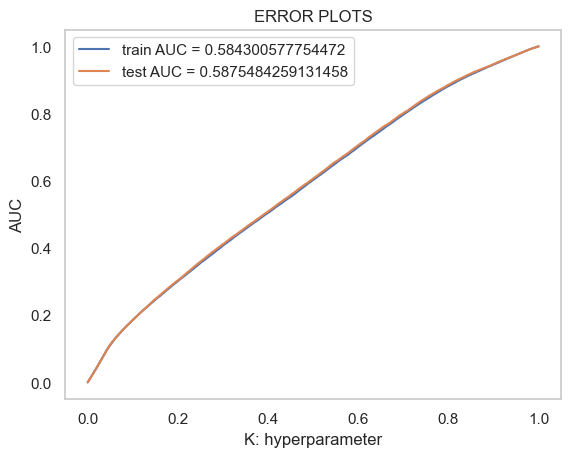

the maximum value of tpr*(1-fpr) 0.3041719446508653 for threshold 0.384
Model test F1 score is :  0.48298824527310585
Model test AUC score is :  0.5875484259131458


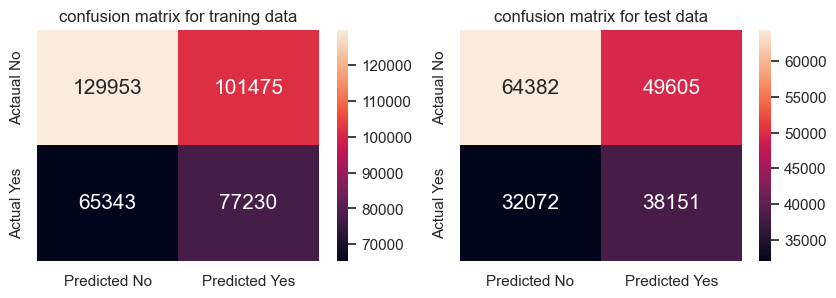

In [ ]:
model_f1_score, model_AUC_score = model_performence_check(logreg2,X_train,X_test,y_train,y_test)

### Model 2: Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(class_weight = 'balanced')

parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10,20, 45, 75, 100, 135, 270, 500]}

DT_model_CV = GridSearchCV(DT_model, parameters, cv=5, scoring='roc_auc', n_jobs=-1, return_train_score=True, verbose=10)
DT_model_CV = DT_model_CV.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",DT_model_CV.best_params_)
print("roc_auc :",DT_model_CV.best_score_)

Fitting 5 folds for each of 63 candidates, totalling 315 fits
tuned hpyerparameters :(best parameters)  {'max_depth': 500, 'min_samples_split': 500}
roc_auc : 0.8186610906156238


In [ ]:
# model with best hyperparameters:
DT_model2 = DecisionTreeClassifier(class_weight = 'balanced', max_depth = 50, min_samples_split = 270)
DT_model2=DT_model2.fit(X_train,y_train)

print("score",DT_model2.score(X_test,y_test))

score 0.7522718636338961


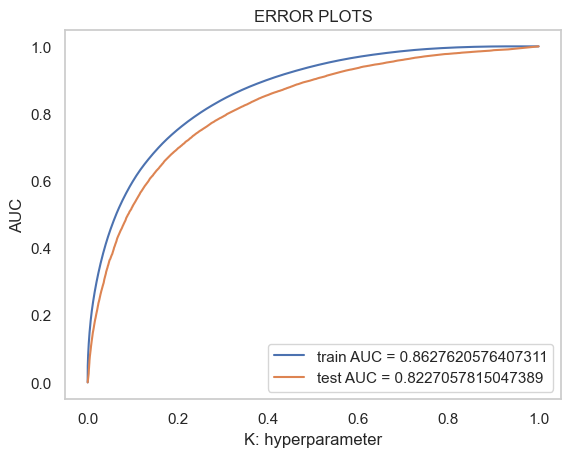

the maximum value of tpr*(1-fpr) 0.6038573981335933 for threshold 0.502
Model test F1 score is :  0.695179950303257
Model test AUC score is :  0.8227057815047389


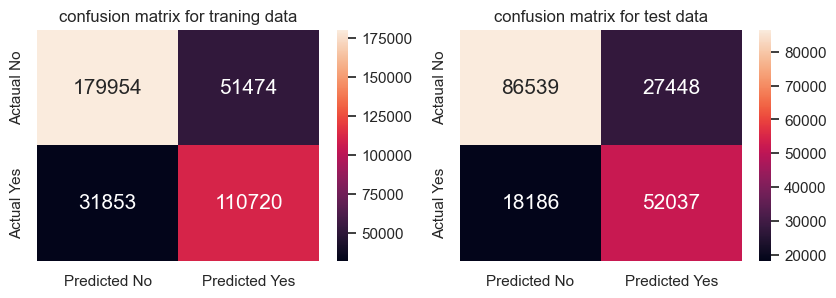

In [ ]:
model_f1_score, model_AUC_score = model_performence_check(DT_model2,X_train,X_test,y_train,y_test)

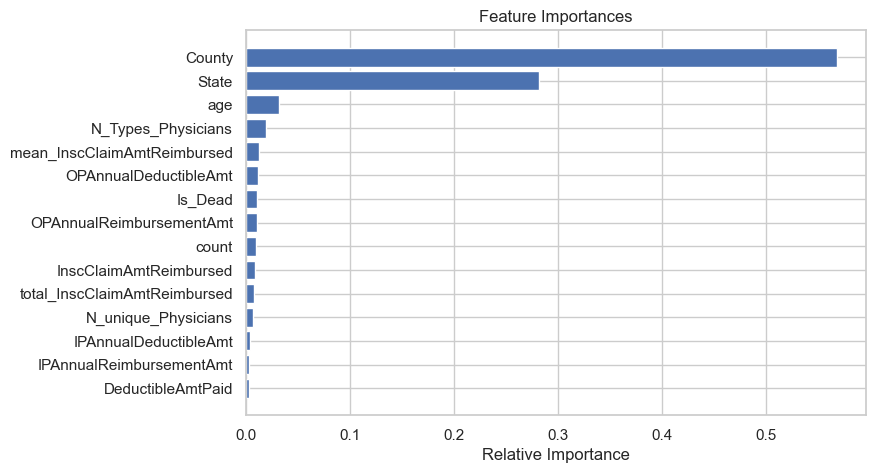

In [ ]:
features = tr_data_final.columns
importances = DT_model2.feature_importances_
indices = (np.argsort(importances))[-15:]
plt.figure(figsize=(8,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Model 3: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(class_weight = 'balanced', random_state=42)

param_grid = {
    'n_estimators': [300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


RF_CV = GridSearchCV(estimator=RF, param_grid=param_grid, cv= 5,scoring='roc_auc', n_jobs=-1, return_train_score=True, verbose=10)
RF_CV.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ",RF_CV.best_params_)
print("roc_auc :",RF_CV.best_score_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}
roc_auc : 0.6549988923266287


In [ ]:
RF2 = RandomForestClassifier(n_estimators = 300,max_features='auto',max_depth=8,criterion='gini',
                             class_weight = 'balanced',n_jobs=-1,verbose=10, random_state=42)

RF2=RF2.fit(X_train,y_train)

print("score",RF2.score(X_test,y_test))

building tree 1 of 300building tree 2 of 300

building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.4s


building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.8s


building tree 23 of 300
building tree 24 of 300
building tree 25 of 300


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.1s


building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.7s


building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300
building tree 44 of 300
building tree 45 of 300
building tree 46 of 300


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s


building tree 47 of 300
building tree 48 of 300
building tree 49 of 300
building tree 50 of 300
building tree 51 of 300
building tree 52 of 300
building tree 53 of 300
building tree 54 of 300
building tree 55 of 300


[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    2.9s


building tree 56 of 300
building tree 57 of 300
building tree 58 of 300
building tree 59 of 300
building tree 60 of 300
building tree 61 of 300
building tree 62 of 300
building tree 63 of 300
building tree 64 of 300
building tree 65 of 300
building tree 66 of 300


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.6s


building tree 67 of 300
building tree 68 of 300
building tree 69 of 300
building tree 70 of 300
building tree 71 of 300
building tree 72 of 300
building tree 73 of 300
building tree 74 of 300
building tree 75 of 300
building tree 76 of 300
building tree 77 of 300
building tree 78 of 300
building tree 79 of 300
building tree 80 of 300
building tree 81 of 300


[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    4.4s


building tree 82 of 300
building tree 83 of 300
building tree 84 of 300
building tree 85 of 300
building tree 86 of 300
building tree 87 of 300
building tree 88 of 300
building tree 89 of 300
building tree 90 of 300


[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    5.1s


building tree 91 of 300
building tree 92 of 300
building tree 93 of 300
building tree 94 of 300
building tree 95 of 300
building tree 96 of 300
building tree 97 of 300
building tree 98 of 300
building tree 99 of 300
building tree 100 of 300
building tree 101 of 300
building tree 102 of 300
building tree 103 of 300
building tree 104 of 300
building tree 105 of 300
building tree 106 of 300


[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    6.0s


building tree 107 of 300
building tree 108 of 300
building tree 109 of 300
building tree 110 of 300
building tree 111 of 300
building tree 112 of 300
building tree 113 of 300
building tree 114 of 300
building tree 115 of 300
building tree 116 of 300
building tree 117 of 300
building tree 118 of 300
building tree 119 of 300
building tree 120 of 300
building tree 121 of 300


[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    6.9s


building tree 122 of 300
building tree 123 of 300
building tree 124 of 300
building tree 125 of 300
building tree 126 of 300
building tree 127 of 300
building tree 128 of 300
building tree 129 of 300
building tree 130 of 300
building tree 131 of 300
building tree 132 of 300
building tree 133 of 300
building tree 134 of 300
building tree 135 of 300
building tree 136 of 300
building tree 137 of 300
building tree 138 of 300


[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:    7.9s


building tree 139 of 300
building tree 140 of 300
building tree 141 of 300
building tree 142 of 300
building tree 143 of 300
building tree 144 of 300
building tree 145 of 300
building tree 146 of 300
building tree 147 of 300
building tree 148 of 300
building tree 149 of 300
building tree 150 of 300
building tree 151 of 300
building tree 152 of 300
building tree 153 of 300
building tree 154 of 300


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.9s


building tree 155 of 300
building tree 156 of 300
building tree 157 of 300
building tree 158 of 300
building tree 159 of 300
building tree 160 of 300
building tree 161 of 300
building tree 162 of 300
building tree 163 of 300
building tree 164 of 300
building tree 165 of 300
building tree 166 of 300
building tree 167 of 300
building tree 168 of 300
building tree 169 of 300
building tree 170 of 300
building tree 171 of 300
building tree 172 of 300
building tree 173 of 300


[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   10.3s


building tree 174 of 300
building tree 175 of 300
building tree 176 of 300
building tree 177 of 300
building tree 178 of 300
building tree 179 of 300
building tree 180 of 300
building tree 181 of 300
building tree 182 of 300
building tree 183 of 300
building tree 184 of 300
building tree 185 of 300
building tree 186 of 300
building tree 187 of 300
building tree 188 of 300
building tree 189 of 300
building tree 190 of 300
building tree 191 of 300
building tree 192 of 300
building tree 193 of 300
building tree 194 of 300
building tree 195 of 300
building tree 196 of 300


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   11.3s


building tree 197 of 300
building tree 198 of 300
building tree 199 of 300
building tree 200 of 300
building tree 201 of 300
building tree 202 of 300
building tree 203 of 300
building tree 204 of 300
building tree 205 of 300
building tree 206 of 300
building tree 207 of 300
building tree 208 of 300
building tree 209 of 300
building tree 210 of 300
building tree 211 of 300
building tree 212 of 300
building tree 213 of 300
building tree 214 of 300
building tree 215 of 300


[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:   12.7s


building tree 216 of 300
building tree 217 of 300
building tree 218 of 300
building tree 219 of 300
building tree 220 of 300
building tree 221 of 300
building tree 222 of 300
building tree 223 of 300
building tree 224 of 300
building tree 225 of 300
building tree 226 of 300
building tree 227 of 300
building tree 228 of 300
building tree 229 of 300
building tree 230 of 300
building tree 231 of 300
building tree 232 of 300
building tree 233 of 300
building tree 234 of 300
building tree 235 of 300
building tree 236 of 300
building tree 237 of 300


[Parallel(n_jobs=-1)]: Done 226 tasks      | elapsed:   13.9s


building tree 238 of 300
building tree 239 of 300
building tree 240 of 300
building tree 241 of 300
building tree 242 of 300
building tree 243 of 300
building tree 244 of 300
building tree 245 of 300
building tree 246 of 300
building tree 247 of 300
building tree 248 of 300
building tree 249 of 300
building tree 250 of 300
building tree 251 of 300
building tree 252 of 300
building tree 253 of 300
building tree 254 of 300
building tree 255 of 300
building tree 256 of 300
building tree 257 of 300
building tree 258 of 300


[Parallel(n_jobs=-1)]: Done 249 tasks      | elapsed:   15.2s


building tree 259 of 300
building tree 260 of 300
building tree 261 of 300
building tree 262 of 300
building tree 263 of 300
building tree 264 of 300
building tree 265 of 300
building tree 266 of 300
building tree 267 of 300
building tree 268 of 300
building tree 269 of 300
building tree 270 of 300
building tree 271 of 300
building tree 272 of 300
building tree 273 of 300
building tree 274 of 300
building tree 275 of 300
building tree 276 of 300
building tree 277 of 300
building tree 278 of 300
building tree 279 of 300
building tree 280 of 300
building tree 281 of 300
building tree 282 of 300


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   16.7s


building tree 283 of 300
building tree 284 of 300
building tree 285 of 300
building tree 286 of 300
building tree 287 of 300
building tree 288 of 300
building tree 289 of 300
building tree 290 of 300
building tree 291 of 300
building tree 292 of 300
building tree 293 of 300
building tree 294 of 300
building tree 295 of 300
building tree 296 of 300
building tree 297 of 300
building tree 298 of 300
building tree 299 of 300
building tree 300 of 300


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   18.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    

score 0.6387275392215407


[Parallel(n_jobs=8)]: Done 249 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.5s finished


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.6s
[Para

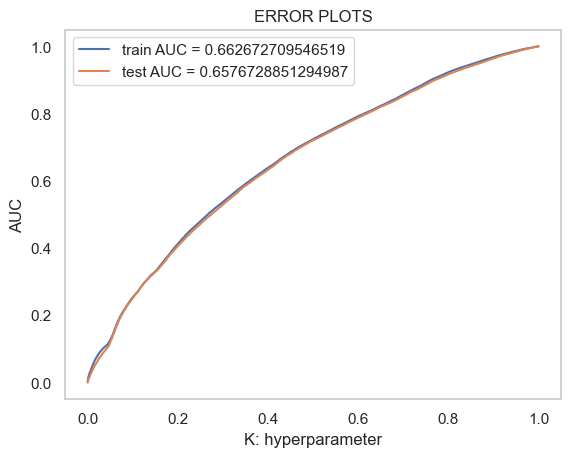

the maximum value of tpr*(1-fpr) 0.3846497174012422 for threshold 0.493
Model test F1 score is :  0.5495176456221761
Model test AUC score is :  0.6576728851294987


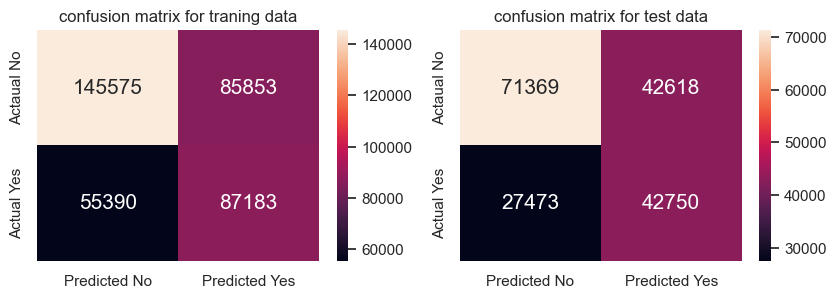

In [ ]:
model_f1_score, model_AUC_score = model_performence_check(RF2,X_train,X_test,y_train,y_test)

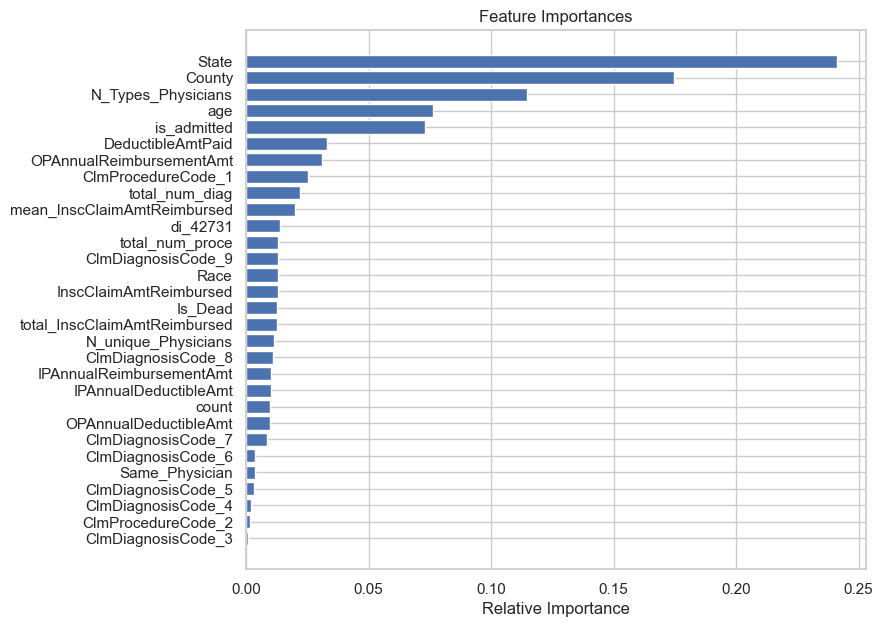

In [ ]:
features = tr_data_final.columns
importances = RF2.feature_importances_
indices = (np.argsort(importances))[-30:]
plt.figure(figsize=(8,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.0 MB/s eta 0:00:00m eta 0:00:010:00:01


### Model 4: Xg_Boost

In [ ]:
import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV

XGB = xgb.XGBClassifier()

parameters = {"eta" : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3] , "n_estimators" : [5,10,50, 75, 100]}

XGB_CV = RandomizedSearchCV(XGB, parameters , cv=5, scoring='roc_auc', n_jobs=-1,return_train_score=True, verbose=10)
XGB_CV.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",XGB_CV.best_params_)
print("roc_auc :",XGB_CV.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
tuned hpyerparameters :(best parameters)  {'n_estimators': 100, 'eta': 0.3}
roc_auc : 0.8139031463016577


In [ ]:
XGB2 = xgb.XGBClassifier(eta=0.3,n_estimators=100,n_jobs=-1)

XGB2=XGB2.fit(X_train,y_train)

print("score",XGB2.score(X_test,y_test))

score 0.7623527495792846


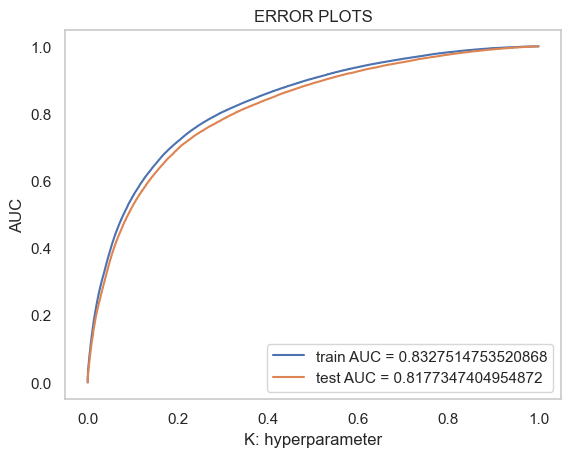

the maximum value of tpr*(1-fpr) 0.5774507672679916 for threshold 0.38
Model test F1 score is :  0.6929138089704232
Model test AUC score is :  0.8177347404954872


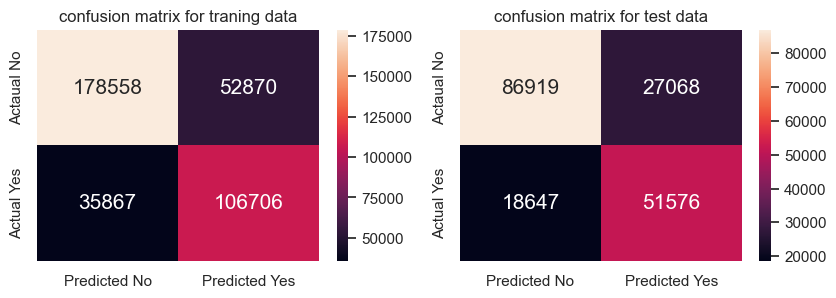

In [ ]:
model_f1_score, model_AUC_score = model_performence_check(XGB2,X_train,X_test,y_train,y_test)

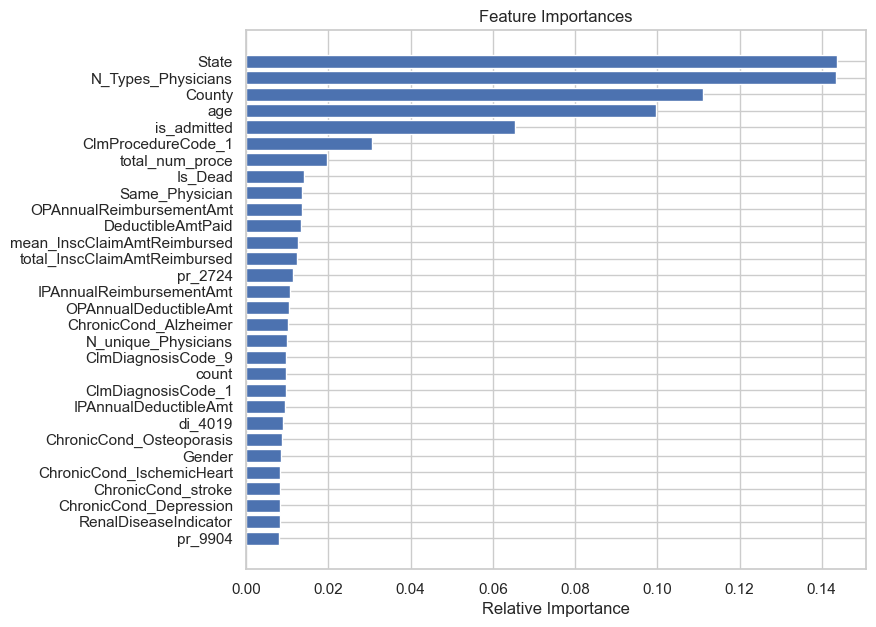

In [ ]:
features = tr_data_final.columns
importances = XGB2.feature_importances_
indices = (np.argsort(importances))[-30:]
plt.figure(figsize=(8,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### plot model performence summary graph

In [ ]:
def model_comp(label=[],metric1=[],metric2=[],set_ylabel='',set_title='',metric1_label='',metric2_label=''):

    x = np.arange(len(model))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(12,5))
    rects1 = ax.bar(x - width/2, metric1, width, label=metric1_label,color = 'teal')
    rects2 = ax.bar(x + width/2, metric2, width, label=metric2_label)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(set_ylabel)
    ax.set_title(set_title)
    ax.set_xticks(x)
    ax.set_xticklabels(model)
    ax.legend()

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()

    plt.show()

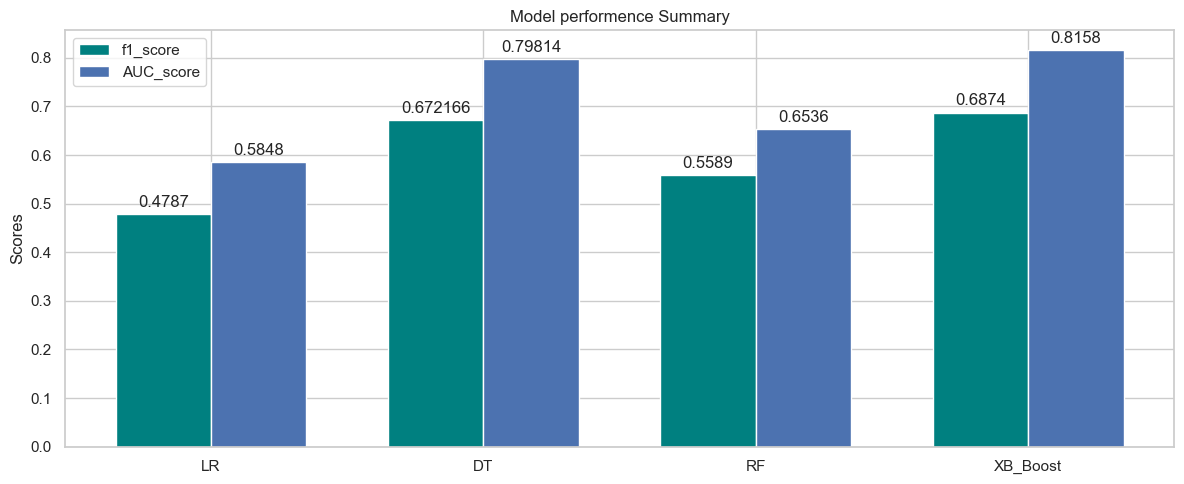

In [ ]:
model = ['LR','DT','RF','XB_Boost']
f1_score = [0.4787,0.672166,0.5589,0.6874]
AUC_score = [0.5848,0.79814,0.6536,0.8158]

model_comp(model,f1_score,AUC_score,'Scores','Model performence Summary','f1_score','AUC_score')

In [ ]:
model_performence_df = pd.DataFrame()
model = ['LR','DT','RF','XB_Boost']
f1_score = [0.4787,0.672166,0.5589,0.6874]
AUC_score = [0.5848,0.79814,0.6536,0.8158]

model_performence_df['Model']=model
model_performence_df['f1_score']=f1_score
model_performence_df['AUC_score']=AUC_score
model_performence_df

Model  f1_score  AUC_score
0        LR  0.478700    0.58480
1        DT  0.672166    0.79814
2        RF  0.558900    0.65360
3  XB_Boost  0.687400    0.81580

# Model : using Important features

In [ ]:
Important_col = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid',
       'is_admitted', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State',
       'County', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'Is_Dead', 'age', 'Num_admit_days',
       'total_num_diag', 'total_num_proce','mean_InscClaimAmtReimbursed', 'total_InscClaimAmtReimbursed',
       'N_unique_Physicians', 'N_Types_Physicians', 'Same_Physician',
       'Same_Physician2']

print(len(Important_col))

34


In [ ]:
X_train1 = X_train[Important_col]
X_train1.head(5)

InscClaimAmtReimbursed  DeductibleAmtPaid  is_admitted  Gender  Race  \
291034                0.325952                0.0            0       0     1   
469483                0.224700                0.0            0       0     1   
58448                 0.016855                0.0            0       0     1   
403368                0.031048                0.0            0       1     2   
138503                0.049009                0.0            0       0     1   

        RenalDiseaseIndicator  State  County  ChronicCond_Alzheimer  \
291034                      0     31     310                      0   
469483                      0     37     250                      0   
58448                       0     45     390                      1   
403368                      0     37     540                      1   
138503                      0     33     590                      1   

        ChronicCond_Heartfailure  ...       age  Num_admit_days  \
291034                         1  ...  0.058671             0.0   
469483                         0  ...  0.037637             0.0   
58448                          0  ...  0.013905             0.0   
403368                         0  ...  0.044503             0.0   
138503                         1  ...  0.011762             0.0   

        total_num_diag  total_num_proce  mean_InscClaimAmtReimbursed  \
291034             1.0              0.0                     0.128751   
469483             3.0              0.0                     0.133697   
58448              1.0              0.0                     0.115174   
403368             1.0              0.0                     0.068997   
138503             9.0              2.0                     0.041033   

        total_InscClaimAmtReimbursed  N_unique_Physicians  N_Types_Physicians  \
291034                      0.643755             0.001630            0.001630   
469483                      0.668483             0.000562            0.000562   
58448                       0.691045             0.000211            0.000421   
403368                      0.206990             0.002070            0.002070   
138503                      0.697563             0.000327            0.000327   

        Same_Physician  Same_Physician2  
291034               0                0  
469483               0                0  
58448                1                0  
403368               0                0  
138503               0                0  

[5 rows x 34 columns]

In [ ]:
X_test1 = X_test[Important_col]
X_test1.head(5)

InscClaimAmtReimbursed  DeductibleAmtPaid  is_admitted  Gender  Race  \
146519                0.351696           0.000000            0       0     1   
11321                 0.001035           0.000000            0       0     1   
46577                 0.311793           0.069287            0       1     2   
85539                 0.123355           0.000000            0       1     2   
170928                0.000000           0.000000            0       1     2   

        RenalDiseaseIndicator  State  County  ChronicCond_Alzheimer  \
146519                      0     47     110                      0   
11321                       0     31     270                      1   
46577                       0     34     910                      0   
85539                       0     23     620                      1   
170928                      0     42     220                      0   

        ChronicCond_Heartfailure  ...       age  Num_admit_days  \
146519                         0  ...  0.104337             0.0   
11321                          1  ...  0.009315             0.0   
46577                          0  ...  0.022865             0.0   
85539                          0  ...  0.014391             0.0   
170928                         1  ...  0.165221             0.0   

        total_num_diag  total_num_proce  mean_InscClaimAmtReimbursed  \
146519             3.0              0.0                     0.293080   
11321              6.0              0.0                     0.014343   
46577              2.0              0.0                     0.061204   
85539              3.0              0.0                     0.099272   
170928             3.0              0.0                     0.222638   

        total_InscClaimAmtReimbursed  N_unique_Physicians  N_Types_Physicians  \
146519                      0.586161             0.001172            0.001172   
11321                       0.100399             0.000104            0.000104   
46577                       0.550834             0.000346            0.000346   
85539                       0.694902             0.000206            0.000411   
170928                      0.667913             0.003515            0.003515   

        Same_Physician  Same_Physician2  
146519               0                0  
11321                0                0  
46577                0                0  
85539                1                0  
170928               0                0  

[5 rows x 34 columns]

### Model 1: LR

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10,  n_jobs=-1, return_train_score=True)
logreg_cv.fit(X_train1,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'penalty': 'l2'}
accuracy : 0.6289795976887003


In [ ]:
logreg2=LogisticRegression(C=1,penalty="l2")
logreg2.fit(X_train1,y_train)
print("score",logreg2.score(X_test1,y_test))

score 0.6287715107757451


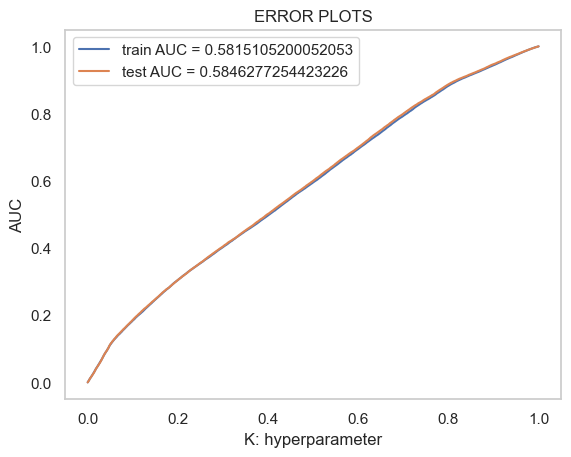

the maximum value of tpr*(1-fpr) 0.30106517586035964 for threshold 0.385
Model test F1 score is :  0.4840670038005312
Model test AUC score is :  0.5846277254423226


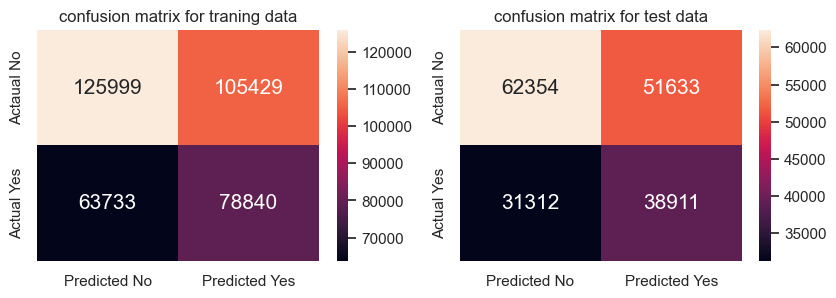

In [ ]:
model_f1_score, model_AUC_score = model_performence_check(logreg2,X_train1,X_test1,y_train,y_test)

### Model 2: Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(class_weight = 'balanced')

parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10,20, 45, 75, 100, 135, 270, 500]}

DT_model_CV = GridSearchCV(DT_model, parameters, cv=5, scoring='roc_auc', n_jobs=-1, return_train_score=True, verbose=10)
DT_model_CV = DT_model_CV.fit(X_train1,y_train)

print("tuned hpyerparameters :(best parameters) ",DT_model_CV.best_params_)
print("roc_auc :",DT_model_CV.best_score_)

Fitting 5 folds for each of 63 candidates, totalling 315 fits
[CV 2/5; 2/63] START max_depth=1, min_samples_split=10..........................
[CV 2/5; 2/63] END max_depth=1, min_samples_split=10;, score=(train=0.530, test=0.531) total time=   0.8s
[CV 1/5; 3/63] START max_depth=1, min_samples_split=20..........................
[CV 1/5; 3/63] END max_depth=1, min_samples_split=20;, score=(train=0.530, test=0.531) total time=   0.7s
[CV 3/5; 4/63] START max_depth=1, min_samples_split=45..........................
[CV 3/5; 4/63] END max_depth=1, min_samples_split=45;, score=(train=0.530, test=0.530) total time=   0.8s
[CV 2/5; 6/63] START max_depth=1, min_samples_split=100.........................
[CV 2/5; 6/63] END max_depth=1, min_samples_split=100;, score=(train=0.530, test=0.531) total time=   0.7s
[CV 4/5; 7/63] START max_depth=1, min_samples_split=135.........................
[CV 4/5; 7/63] END max_depth=1, min_samples_split=135;, score=(train=0.530, test=0.531) total time=   0.8s
[

[CV 5/5; 1/63] START max_depth=1, min_samples_split=5...........................
[CV 5/5; 1/63] END max_depth=1, min_samples_split=5;, score=(train=0.531, test=0.529) total time=   0.9s
[CV 2/5; 3/63] START max_depth=1, min_samples_split=20..........................
[CV 2/5; 3/63] END max_depth=1, min_samples_split=20;, score=(train=0.530, test=0.531) total time=   0.8s
[CV 5/5; 4/63] START max_depth=1, min_samples_split=45..........................
[CV 5/5; 4/63] END max_depth=1, min_samples_split=45;, score=(train=0.531, test=0.529) total time=   0.8s
[CV 3/5; 6/63] START max_depth=1, min_samples_split=100.........................
[CV 3/5; 6/63] END max_depth=1, min_samples_split=100;, score=(train=0.530, test=0.530) total time=   0.7s
[CV 1/5; 8/63] START max_depth=1, min_samples_split=270.........................
[CV 1/5; 8/63] END max_depth=1, min_samples_split=270;, score=(train=0.530, test=0.531) total time=   0.7s
[CV 4/5; 9/63] START max_depth=1, min_samples_split=500.........

[CV 1/5; 1/63] START max_depth=1, min_samples_split=5...........................
[CV 1/5; 1/63] END max_depth=1, min_samples_split=5;, score=(train=0.530, test=0.531) total time=   1.0s
[CV 4/5; 3/63] START max_depth=1, min_samples_split=20..........................
[CV 4/5; 3/63] END max_depth=1, min_samples_split=20;, score=(train=0.530, test=0.531) total time=   0.7s
[CV 1/5; 5/63] START max_depth=1, min_samples_split=75..........................
[CV 1/5; 5/63] END max_depth=1, min_samples_split=75;, score=(train=0.530, test=0.531) total time=   0.7s
[CV 4/5; 6/63] START max_depth=1, min_samples_split=100.........................
[CV 4/5; 6/63] END max_depth=1, min_samples_split=100;, score=(train=0.530, test=0.531) total time=   0.7s
[CV 3/5; 8/63] START max_depth=1, min_samples_split=270.........................
[CV 3/5; 8/63] END max_depth=1, min_samples_split=270;, score=(train=0.530, test=0.530) total time=   0.7s
[CV 1/5; 10/63] START max_depth=5, min_samples_split=5..........

[CV 4/5; 31/60] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=300;, score=(train=0.638, test=0.635) total time= 1.1min
[CV 2/5; 33/60] START criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=300
[CV 2/5; 33/60] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=300;, score=(train=0.637, test=0.640) total time= 1.1min
[CV 5/5; 33/60] START criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=300
[CV 5/5; 33/60] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=300;, score=(train=0.638, test=0.635) total time= 1.1min
[CV 3/5; 35/60] START criterion=entropy, max_depth=4, max_features=log2, n_estimators=300
[CV 3/5; 35/60] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=300;, score=(train=0.630, test=0.629) total time=  52.4s
[CV 1/5; 36/60] START criterion=entropy, max_depth=4, max_features=log2, n_estimators=500
[CV 1/5; 36/60] END criterion=entropy, max_depth=4, max_features=log2, n_est

In [ ]:
# model with best hyperparameters:
DT_model2 = DecisionTreeClassifier(class_weight = 'balanced', max_depth = 50, min_samples_split = 270)
DT_model2=DT_model2.fit(X_train1,y_train)

print("score",DT_model2.score(X_test1,y_test))

score 0.7525432929808371


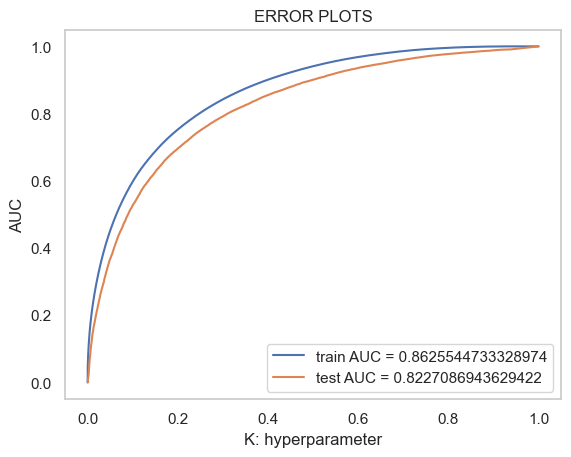

the maximum value of tpr*(1-fpr) 0.6036673788886701 for threshold 0.5
Model test F1 score is :  0.6954879188359365
Model test AUC score is :  0.8227086943629422


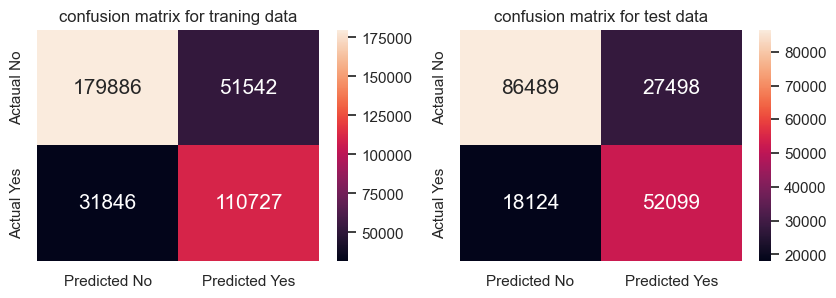

In [ ]:
model_f1_score, model_AUC_score = model_performence_check(DT_model2,X_train1,X_test1,y_train,y_test)

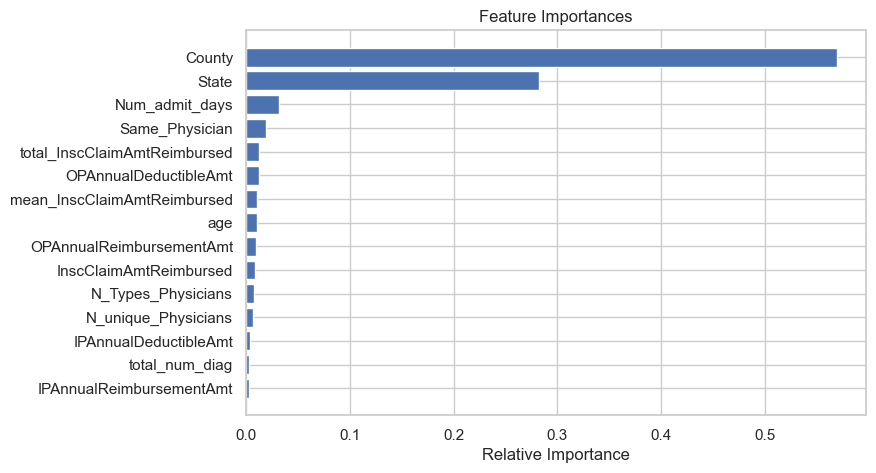

In [ ]:
features = X_train1.columns
importances = DT_model2.feature_importances_
indices = (np.argsort(importances))[-15:]
plt.figure(figsize=(8,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Model 3: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(class_weight = 'balanced', random_state=42)

param_grid = {
    'n_estimators': [300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


RF_CV = GridSearchCV(estimator=RF, param_grid=param_grid, cv= 5,scoring='roc_auc', n_jobs=-1, return_train_score=True, verbose=10)
RF_CV.fit(X_train1, y_train)

print("tuned hpyerparameters :(best parameters) ",RF_CV.best_params_)
print("roc_auc :",RF_CV.best_score_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

[CV 4/5; 1/63] START max_depth=1, min_samples_split=5...........................
[CV 4/5; 1/63] END max_depth=1, min_samples_split=5;, score=(train=0.530, test=0.531) total time=   0.9s
[CV 3/5; 3/63] START max_depth=1, min_samples_split=20..........................
[CV 3/5; 3/63] END max_depth=1, min_samples_split=20;, score=(train=0.530, test=0.530) total time=   0.8s
[CV 2/5; 5/63] START max_depth=1, min_samples_split=75..........................
[CV 2/5; 5/63] END max_depth=1, min_samples_split=75;, score=(train=0.530, test=0.531) total time=   0.7s
[CV 5/5; 6/63] START max_depth=1, min_samples_split=100.........................
[CV 5/5; 6/63] END max_depth=1, min_samples_split=100;, score=(train=0.531, test=0.529) total time=   0.7s
[CV 2/5; 8/63] START max_depth=1, min_samples_split=270.........................
[CV 2/5; 8/63] END max_depth=1, min_samples_split=270;, score=(train=0.530, test=0.531) total time=   0.7s
[CV 5/5; 9/63] START max_depth=1, min_samples_split=500.........

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 2/63] START max_depth=1, min_samples_split=10..........................
[CV 1/5; 2/63] END max_depth=1, min_samples_split=10;, score=(train=0.530, test=0.531) total time=   1.0s
[CV 1/5; 4/63] START max_depth=1, min_samples_split=45..........................
[CV 1/5; 4/63] END max_depth=1, min_samples_split=45;, score=(train=0.530, test=0.531) total time=   0.8s
[CV 3/5; 5/63] START max_depth=1, min_samples_split=75..........................
[CV 3/5; 5/63] END max_depth=1, min_samples_split=75;, score=(train=0.530, test=0.530) total time=   0.8s
[CV 2/5; 7/63] START max_depth=1, min_samples_split=135.........................
[CV 2/5; 7/63] END max_depth=1, min_samples_split=135;, score=(train=0.530, test=0.531) total time=   0.7s
[CV 4/5; 8/63] START max_depth=1, min_samples_split=270.........................
[CV 4/5; 8/63] END max_depth=1, min_samples_split=270;, score=(train=0.530, test=0.531) total time=   0.8s
[CV 3/5; 10/63] START max_depth=5, min_samples_split=5.........

[CV 3/5; 1/63] START max_depth=1, min_samples_split=5...........................
[CV 3/5; 1/63] END max_depth=1, min_samples_split=5;, score=(train=0.530, test=0.530) total time=   0.8s
[CV 5/5; 2/63] START max_depth=1, min_samples_split=10..........................
[CV 5/5; 2/63] END max_depth=1, min_samples_split=10;, score=(train=0.531, test=0.529) total time=   0.7s
[CV 2/5; 4/63] START max_depth=1, min_samples_split=45..........................
[CV 2/5; 4/63] END max_depth=1, min_samples_split=45;, score=(train=0.530, test=0.531) total time=   0.8s
[CV 1/5; 6/63] START max_depth=1, min_samples_split=100.........................
[CV 1/5; 6/63] END max_depth=1, min_samples_split=100;, score=(train=0.530, test=0.531) total time=   0.8s
[CV 5/5; 7/63] START max_depth=1, min_samples_split=135.........................
[CV 5/5; 7/63] END max_depth=1, min_samples_split=135;, score=(train=0.531, test=0.529) total time=   0.8s
[CV 3/5; 9/63] START max_depth=1, min_samples_split=500.........

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

[CV 2/5; 1/63] START max_depth=1, min_samples_split=5...........................
[CV 2/5; 1/63] END max_depth=1, min_samples_split=5;, score=(train=0.530, test=0.531) total time=   0.8s
[CV 4/5; 2/63] START max_depth=1, min_samples_split=10..........................
[CV 4/5; 2/63] END max_depth=1, min_samples_split=10;, score=(train=0.530, test=0.531) total time=   0.8s
[CV 4/5; 4/63] START max_depth=1, min_samples_split=45..........................
[CV 4/5; 4/63] END max_depth=1, min_samples_split=45;, score=(train=0.530, test=0.531) total time=   0.7s
[CV 5/5; 5/63] START max_depth=1, min_samples_split=75..........................
[CV 5/5; 5/63] END max_depth=1, min_samples_split=75;, score=(train=0.531, test=0.529) total time=   0.8s
[CV 3/5; 7/63] START max_depth=1, min_samples_split=135.........................
[CV 3/5; 7/63] END max_depth=1, min_samples_split=135;, score=(train=0.530, test=0.530) total time=   0.8s
[CV 1/5; 9/63] START max_depth=1, min_samples_split=500..........

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 300}
roc_auc : 0.6623416721406983


In [ ]:
RF2 = RandomForestClassifier(n_estimators = 500,max_features='auto',max_depth=8,criterion='entropy',
                             class_weight = 'balanced',n_jobs=-1,verbose=1, random_state=42)

RF2=RF2.fit(X_train1,y_train)

print("score",RF2.score(X_test1,y_test))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   34.0s


[CV 2/5; 6/10] START eta=0.01, n_estimators=100.................................
[CV 2/5; 6/10] END eta=0.01, n_estimators=100;, score=(train=0.701, test=0.703) total time= 1.8min
[CV 3/5; 9/10] START eta=0.3, n_estimators=100..................................
[CV 3/5; 9/10] END eta=0.3, n_estimators=100;, score=(train=0.833, test=0.814) total time= 1.8min
[CV 1/5; 1/63] START max_depth=1, min_samples_split=5...........................
[CV 1/5; 1/63] END max_depth=1, min_samples_split=5;, score=(train=0.530, test=0.531) total time=   1.1s
[CV 4/5; 2/63] START max_depth=1, min_samples_split=10..........................
[CV 4/5; 2/63] END max_depth=1, min_samples_split=10;, score=(train=0.530, test=0.531) total time=   0.7s
[CV 2/5; 4/63] START max_depth=1, min_samples_split=45..........................
[CV 2/5; 4/63] END max_depth=1, min_samples_split=45;, score=(train=0.530, test=0.531) total time=   0.7s
[CV 5/5; 5/63] START max_depth=1, min_samples_split=75..........................


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   39.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.3s


score 0.6352261006460018


[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.8s finished


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.8s finished


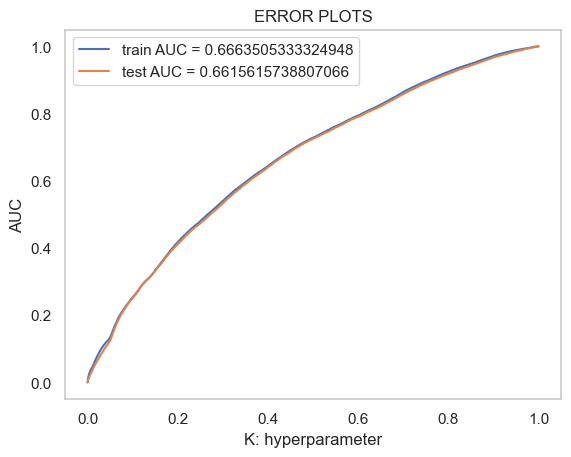

the maximum value of tpr*(1-fpr) 0.38845099409111156 for threshold 0.495
Model test F1 score is :  0.5529751306460633
Model test AUC score is :  0.6615615738807066


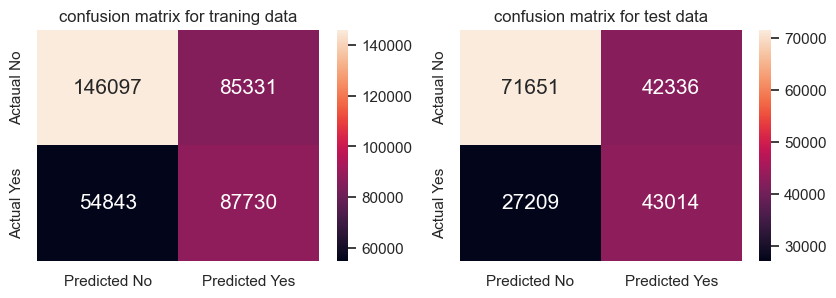

In [ ]:
model_f1_score, model_AUC_score = model_performence_check(RF2,X_train1,X_test1,y_train,y_test)

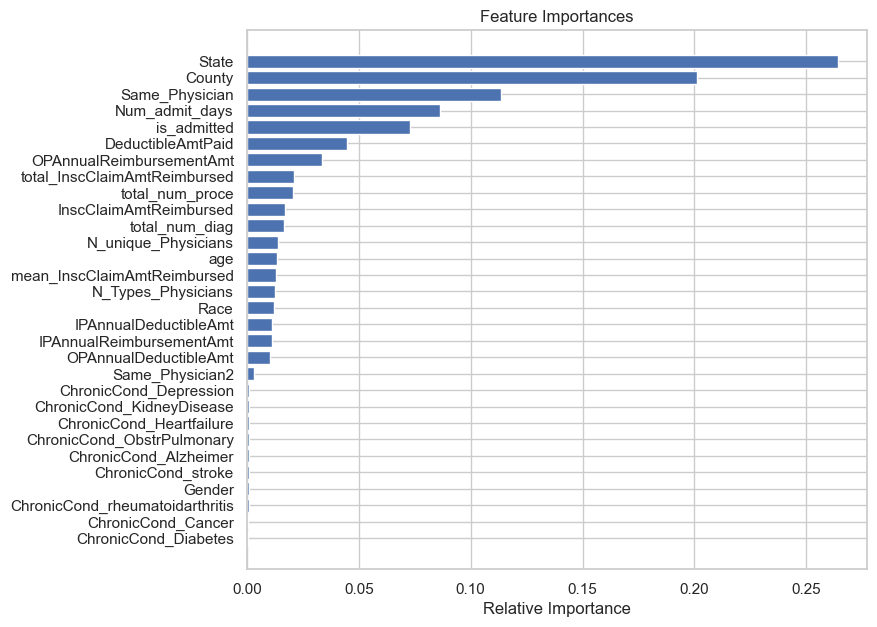

In [ ]:
features = X_train1.columns
importances = RF2.feature_importances_
indices = (np.argsort(importances))[-30:]
plt.figure(figsize=(8,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Model 4: XG_Boost

In [ ]:
import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV

XGB = xgb.XGBClassifier()

parameters = {"eta" : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3] , "n_estimators" : [5,10,50, 75, 100]}

XGB_CV = RandomizedSearchCV(XGB, parameters , cv=5, scoring='roc_auc', n_jobs=-1,return_train_score=True, verbose=10)
XGB_CV.fit(X_train1,y_train)

print("tuned hpyerparameters :(best parameters) ",XGB_CV.best_params_)
print("roc_auc :",XGB_CV.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
tuned hpyerparameters :(best parameters)  {'n_estimators': 50, 'eta': 0.3}
roc_auc : 0.8013622901551722


In [ ]:
XGB2 = xgb.XGBClassifier(eta=0.3,n_estimators=50,n_jobs=-1)

XGB2=XGB2.fit(X_train1,y_train)

print("score",XGB2.score(X_test1,y_test))

score 0.7519190054828728


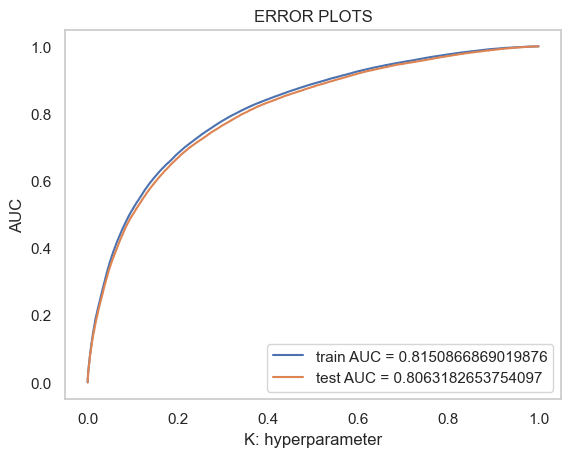

the maximum value of tpr*(1-fpr) 0.5514508022530062 for threshold 0.377
Model test F1 score is :  0.678685764659875
Model test AUC score is :  0.8063182653754097


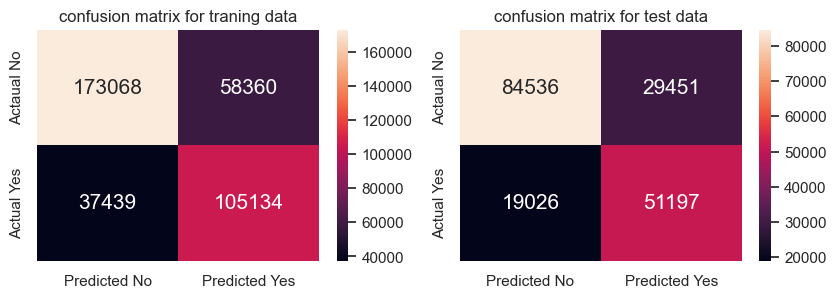

In [ ]:
model_f1_score, model_AUC_score = model_performence_check(XGB2,X_train1,X_test1,y_train,y_test)

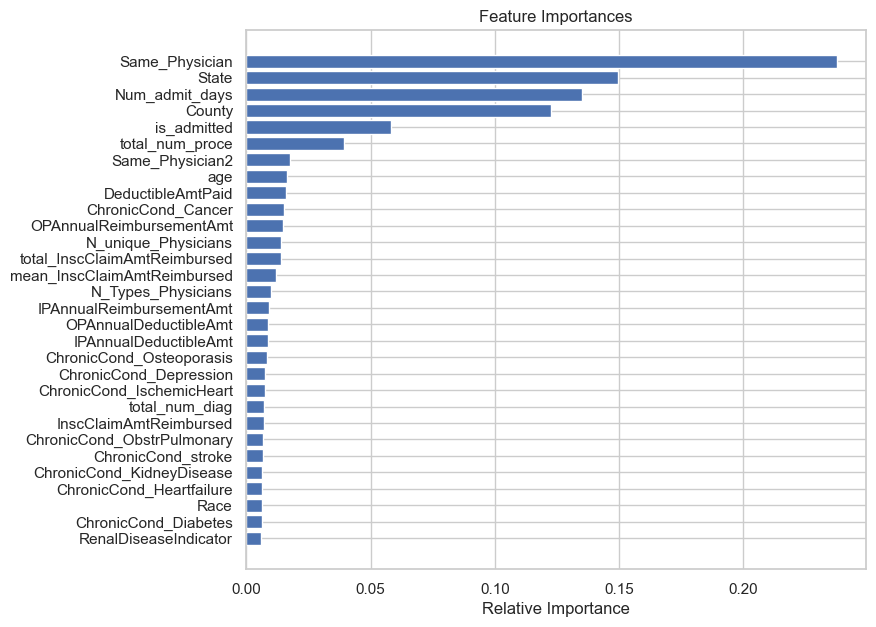

In [ ]:
features = X_train1.columns
importances = XGB2.feature_importances_
indices = (np.argsort(importances))[-30:]
plt.figure(figsize=(8,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### plot model performence summary graph

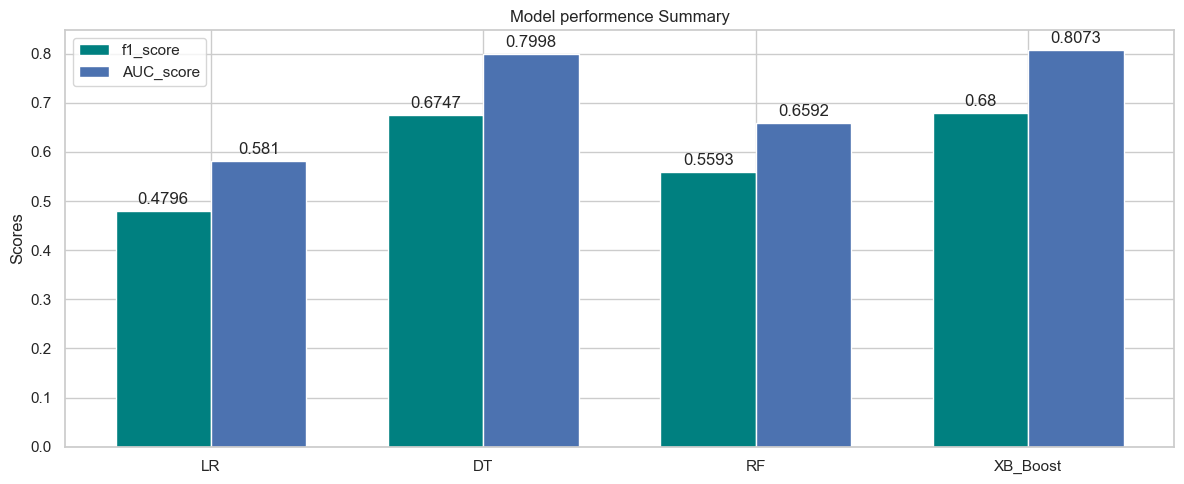

In [ ]:
model_imp_fea = ['LR','DT','RF','XB_Boost']
f1_score_imp_fea = [0.4796,0.6747,0.5593,0.680]
AUC_score_imp_fea = [0.5810,0.7998,0.6592,0.8073]
model_comp(model,f1_score_imp_fea,AUC_score_imp_fea,'Scores','Model performence Summary','f1_score','AUC_score')

# Comparison using all features VS Imp features

In [ ]:
model = ['LR','DT','RF','XB_Boost']
f1_score = [0.4787,0.672166,0.5589,0.6874]
AUC_score = [0.5848,0.79814,0.6536,0.8158]

model_imp_fea = ['LR','DT','RF','XB_Boost']
f1_score_imp_fea = [0.4796,0.6747,0.5593,0.680]
AUC_score_imp_fea = [0.5810,0.7998,0.6592,0.8073]

model_performence_df = pd.DataFrame()

model_performence_df['Model'] = model
model_performence_df['f1_score'] = f1_score
model_performence_df['f1_score_imp_fea'] =f1_score_imp_fea
model_performence_df['AUC_score'] = AUC_score
model_performence_df['AUC_score_imp_fea'] = AUC_score_imp_fea

model_performence_df

Model  f1_score  f1_score_imp_fea  AUC_score  AUC_score_imp_fea
0        LR  0.478700            0.4796    0.58480             0.5810
1        DT  0.672166            0.6747    0.79814             0.7998
2        RF  0.558900            0.5593    0.65360             0.6592
3  XB_Boost  0.687400            0.6800    0.81580             0.8073

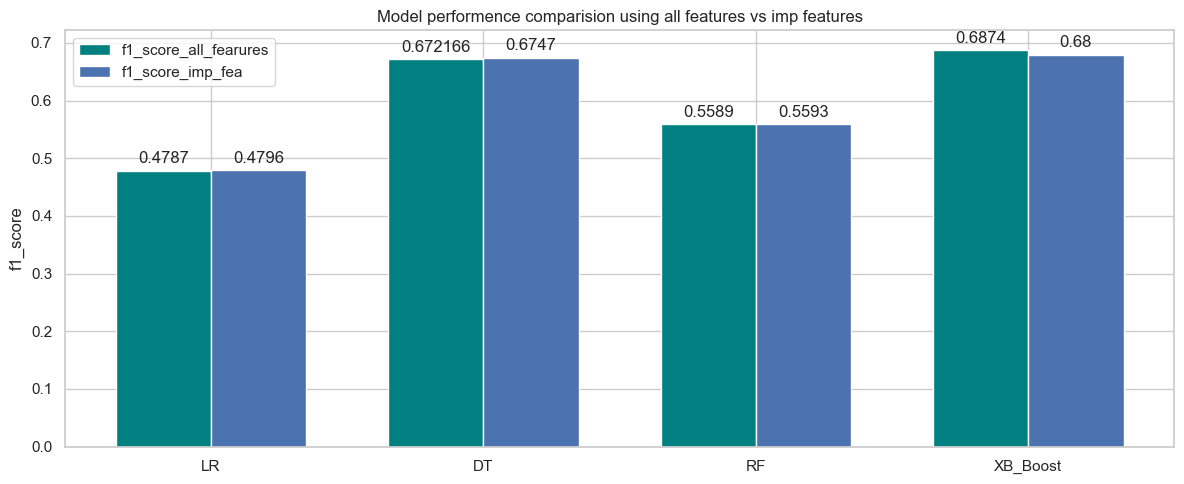

In [ ]:
model_comp(model,f1_score,f1_score_imp_fea,'f1_score',
           'Model performence comparision using all features vs imp features',
          'f1_score_all_fearures','f1_score_imp_fea')

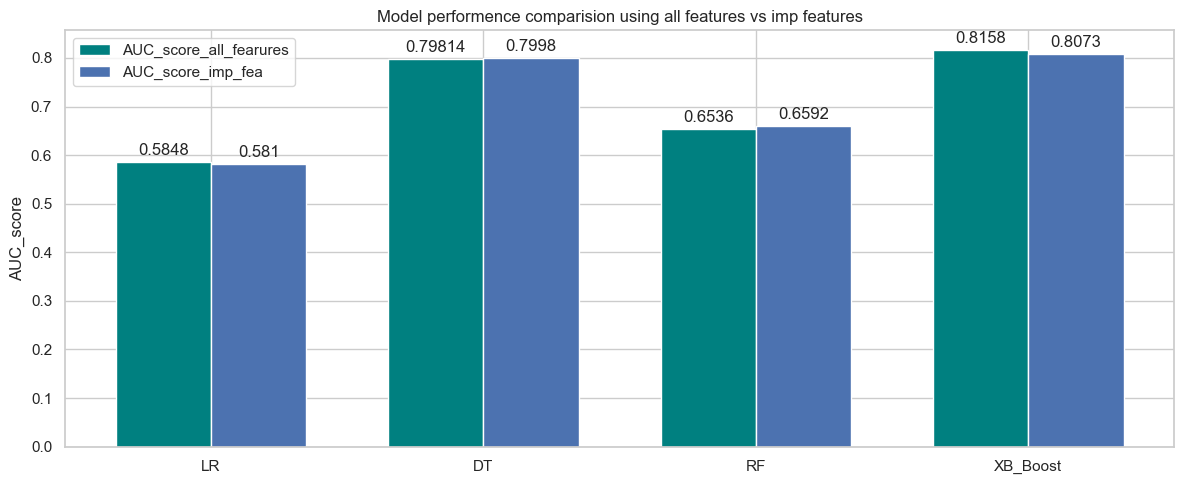

In [ ]:
model_comp(model,AUC_score,AUC_score_imp_fea,'AUC_score','Model performence comparision using all features vs imp features',
          'AUC_score_all_fearures','AUC_score_imp_fea')

<h2>Conclusion</h2>
<ol>
<li>Not much diifernce in model performece using all fratures and selected Feaures</li>
<li>we observe a little better performence in some model if we use all features </li>
